In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import hstack
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ankitkumar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ankitkumar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
class TokenizerUtility:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.stemmer = PorterStemmer()

    def tokenize_and_stem(self, text):
        tokens = word_tokenize(text)
        tokens = [self.stemmer.stem(token) for token in tokens if token.isalnum()]
        tokens = [token for token in tokens if token not in self.stop_words]
        return tokens


In [3]:
url_dataset_path = 'URL.csv'
url_df = pd.read_csv(url_dataset_path)
html_dataset_path = 'html.csv'
html_df = pd.read_csv(html_dataset_path)

In [4]:
url_X = url_df['Data'].astype(str)
from sklearn.preprocessing import LabelEncoder

y = url_df['Category']

In [5]:
html_X = html_df['Data'].astype(str)
y = html_df['Category']

In [6]:
url_X_train, url_X_test, y_train, y_test = train_test_split(
    url_X, y, test_size=0.2, random_state=42
)

In [7]:
tokenizer_utility = TokenizerUtility()

# Use TF-IDF vectorization with custom tokenizer for URL
url_tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenizer_utility.tokenize_and_stem, max_features=5000)
url_X_train_tfidf = url_tfidf_vectorizer.fit_transform(url_X_train)
url_X_test_tfidf = url_tfidf_vectorizer.transform(url_X_test)
print(url_X_test_tfidf.todense())

/opt/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
html_X_train, html_X_test, y_train, y_test = train_test_split(
    html_X, y, test_size=0.2, random_state=42
)

In [9]:
tokenizer_utility = TokenizerUtility()
html_tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenizer_utility.tokenize_and_stem, max_features=5000)
html_X_train_tfidf = html_tfidf_vectorizer.fit_transform(html_X_train)
html_X_test_tfidf = html_tfidf_vectorizer.transform(html_X_test)
print(html_X_test_tfidf.todense())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.0283887  0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.02123022 0.         0.         ... 0.         0.         0.        ]
 [0.05939501 0.         0.         ... 0.         0.         0.05426388]
 [0.01058128 0.         0.         ... 0.         0.         0.        ]]


In [10]:
X_train_tfidf = hstack([url_X_train_tfidf, html_X_train_tfidf])
X_test_tfidf = hstack([url_X_test_tfidf, html_X_test_tfidf])

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from time import time

# Assuming X_train_tfidf is your TF-IDF vectorized training data and y_train are class labels

# Start recording time
start_time = time()

# Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# End recording time
end_time = time()

# Calculate training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")
test_start=time()
# Make predictions on the test set (assuming you have X_test_tfidf)
y_pred = rf_classifier.predict(X_test_tfidf)
test_end=time()
test=test_end-test_start
print(f"testing time: {test:.2f}")
# Calculate overall precision, recall, F1-score, and false positive rate
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
fpr = 1 - recall

# Print overall evaluation metrics
print("\nOverall Evaluation:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")


Training Time: 25.70 seconds
testing time: 0.24

Overall Evaluation:
Precision (Micro): 0.9586
Recall (Micro): 0.9586
F1-Score (Micro): 0.9586
False Positive Rate (FPR): 0.0414


In [18]:

y_pred = rf_classifier.predict(X_test_tfidf)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of random classifier: {accuracy:.2f}")

Accuracy of random classifier: 0.96


In [12]:
start_time = time()
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_tfidf, y_train)
end_time = time()

# Calculate training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")
# Make predictions on the test set using Decision Tree
test_start=time()
y_pred_dt = dt_classifier.predict(X_test_tfidf)
test_end=time()
test=test_end-test_start
print(f"testing time: {test:.2f}")
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_dt, average='micro')
fpr = 1 - recall

# Print overall evaluation metrics
print("\nOverall Evaluation:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")


Training Time: 45.83 seconds
testing time: 0.02

Overall Evaluation:
Precision (Micro): 0.9340
Recall (Micro): 0.9340
F1-Score (Micro): 0.9340
False Positive Rate (FPR): 0.0660


In [13]:
start_time = time()
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)
end_time = time()
# Make predictions on the test set using SVM
test_start=time()
y_pred_svm = svm_classifier.predict(X_test_tfidf)
test_end=time()
test=test_end-test_start
print(f"testing time: {test:.2f}")


# Calculate training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_svm, average='micro')
fpr = 1 - recall

# Print overall evaluation metrics
print("\nOverall Evaluation:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")


testing time: 57.69
Training Time: 730.96 seconds

Overall Evaluation:
Precision (Micro): 0.9460
Recall (Micro): 0.9460
F1-Score (Micro): 0.9460
False Positive Rate (FPR): 0.0540


In [14]:
start_time = time()
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
end_time = time()
test_start=time()
y_pred_nb = nb_classifier.predict(X_test_tfidf)
test_end=time()
test=test_end-test_start
print(f"testing time: {test:.2f}")

training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_nb, average='micro')
fpr = 1 - recall

# Print overall evaluation metrics
print("\nOverall Evaluation:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")

testing time: 0.01
Training Time: 0.07 seconds

Overall Evaluation:
Precision (Micro): 0.8786
Recall (Micro): 0.8786
F1-Score (Micro): 0.8786
False Positive Rate (FPR): 0.1214


In [24]:
import time
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd

# Load your dataset

# Define the classifiers
classifiers = {
    
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    print(f"\n{name}")

    # Training
    train_start_time = time.time()
    clf.fit(X_train_tfidf, y_train)
    train_end_time = time.time()
    training_time = train_end_time - train_start_time
    print(f"Training Time: {training_time:.2f} seconds")

    # Testing
    test_start_time = time.time()
    y_pred = clf.predict(X_test_tfidf)
    test_end_time = time.time()
    testing_time = test_end_time - test_start_time
    print(f"Testing Time: {testing_time:.2f} seconds")

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Precision, Recall, F1-Score, False Positive Rate
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
    fpr = 1 - recall

    print(f"Precision (Micro): {precision:.4f}")
    print(f"Recall (Micro): {recall:.4f}")
    print(f"F1-Score (Micro): {f1_score:.4f}")
    print(f"False Positive Rate (FPR): {fpr:.4f}")



Logistic Regression
Training Time: 1.32 seconds
Testing Time: 0.05 seconds
Accuracy: 0.9354
Precision (Micro): 0.9354
Recall (Micro): 0.9354
F1-Score (Micro): 0.9354
False Positive Rate (FPR): 0.0646

K-Nearest Neighbors
Training Time: 0.01 seconds
Testing Time: 796.84 seconds
Accuracy: 0.8715
Precision (Micro): 0.8715
Recall (Micro): 0.8715
F1-Score (Micro): 0.8715
False Positive Rate (FPR): 0.1285

Gradient Boosting
Training Time: 131.14 seconds
Testing Time: 0.02 seconds
Accuracy: 0.9243
Precision (Micro): 0.9243
Recall (Micro): 0.9243
F1-Score (Micro): 0.9243
False Positive Rate (FPR): 0.0757

AdaBoost
Training Time: 50.85 seconds
Testing Time: 0.22 seconds
Accuracy: 0.9290
Precision (Micro): 0.9290
Recall (Micro): 0.9290
F1-Score (Micro): 0.9290
False Positive Rate (FPR): 0.0710


In [19]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(html_X_train_tfidf, y_train)

# Make predictions on the test set using Decision Tree
y_pred_dt = dt_classifier.predict(html_X_test_tfidf)

# Train a Support Vector Machine classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(html_X_train_tfidf, y_train)

# Make predictions on the test set using SVM
y_pred_svm = svm_classifier.predict(html_X_test_tfidf)
nb_classifier = MultinomialNB()
nb_classifier.fit(html_X_train_tfidf, y_train)

# Make predictions on the test set using Naive Bayes
y_pred_nb = nb_classifier.predict(html_X_test_tfidf)

# Train a k-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(html_X_train_tfidf, y_train)



accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")

Decision Tree Accuracy: 0.94
SVM Accuracy: 0.95
Naive Bayes Accuracy: 0.88


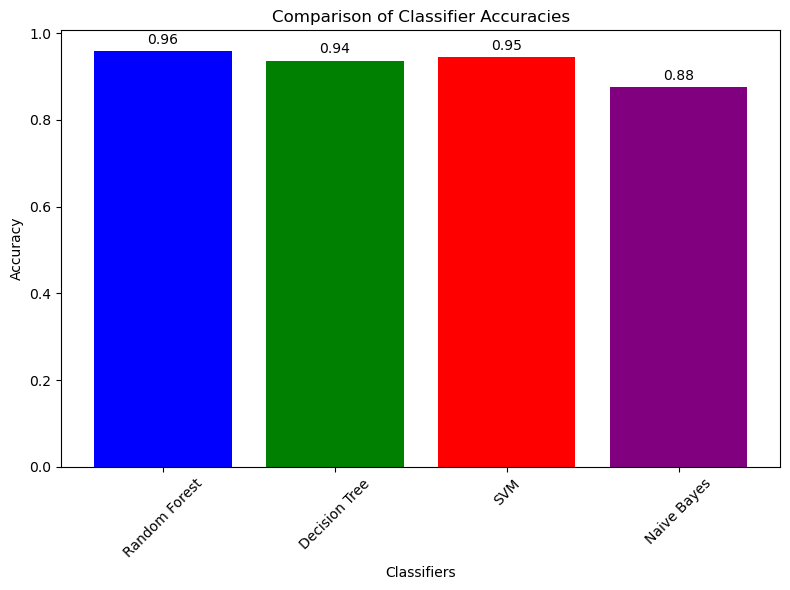

In [21]:
import matplotlib.pyplot as plt

# Collect accuracies in a dictionary
accuracies = {
    "Random Forest": accuracy_score(y_test, rf_classifier.predict(X_test_tfidf)),
    "Decision Tree": accuracy_dt,
    "SVM": accuracy_svm,
    "Naive Bayes": accuracy_nb,
    
}

# Extract classifier names and accuracies as separate lists
classifier_names = list(accuracies.keys())
classifier_accuracies = list(accuracies.values())

# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as desired
plt.bar(classifier_names, classifier_accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Comparison of Classifier Accuracies")

# Add data labels above bars (optional)
for i, v in enumerate(classifier_accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()


In [15]:
combined_text = url_df['Data'].tolist() + html_df['Data'].tolist()

y = url_df['Category']
len(combined_text)
len(y)

45373

In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.initializers import Constant
from tensorflow.keras import layers 
from tensorflow.keras.layers import concatenate 
from sklearn.preprocessing import LabelEncoder

# Assuming url_df is your DataFrame containing 'Data', 'html', and 'Category' columns

# Feature Extraction (replace with your implementation for TF-IDF or similar)
data_text = url_df['Data'].tolist()
html_text = html_df['Data'].tolist()
max_len = 100 
embedding_dim = 128 

y = url_df['Category']

# Label encoding for target variable (assuming categories)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Separate preprocessing for data and html (example using Tokenizer)
data_tokenizer = Tokenizer(num_words=5000)  # Adjust num_words as needed
data_tokenizer.fit_on_texts(data_text)
data_sequences = data_tokenizer.texts_to_sequences(data_text)

html_tokenizer = Tokenizer(num_words=5000)  # Consider using the same vocabulary
html_tokenizer.fit_on_texts(html_text)
html_sequences = html_tokenizer.texts_to_sequences(html_text)

data_padded = pad_sequences(data_sequences, maxlen=max_len, padding='post')
html_padded = pad_sequences(html_sequences, maxlen=max_len, padding='post')

# Define Separate Embedding Layers and CNN Branches
data_in = Input(shape=(max_len,))
data_embedding = Embedding(len(data_tokenizer.word_index) + 1, embedding_dim)(data_in)
data_conv = Conv1D(32, kernel_size=3, activation='relu')(data_embedding)
data_pool = MaxPooling1D(pool_size=2)(data_conv)
data_flat = Flatten()(data_pool)

html_in = Input(shape=(max_len,))
html_embedding = Embedding(len(html_tokenizer.word_index) + 1, embedding_dim)(html_in)
html_conv = Conv1D(32, kernel_size=3, activation='relu')(html_embedding)
html_pool = MaxPooling1D(pool_size=2)(html_conv)
html_flat = Flatten()(html_pool)

# Concatenate Features
merged = concatenate([data_flat, html_flat])

# Dense Layers for Classification
dense1 = Dense(128, activation='relu')(merged)  # First hidden layer
dense2 = Dense(64, activation='relu')(dense1)   # Second hidden layer (adjust as needed)

# Output layer with number of classes
final_output = Dense(len(encoder.classes_), activation='softmax')(dense2)

model = Model(inputs=[data_in, html_in], outputs=final_output)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the Model
model.fit([data_padded, html_padded], y_encoded, epochs=10, batch_size=32, validation_split=0.2)



Epoch 1/10


2024-05-08 12:06:59.308052: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1135/1135 [==============================] - 4774s 4s/step - loss: 0.0672 - accuracy: 0.9747 - val_loss: 0.0317 - val_accuracy: 0.9882
Epoch 2/10
1135/1135 [==============================] - 3350s 3s/step - loss: 0.0144 - accuracy: 0.9955 - val_loss: 0.0279 - val_accuracy: 0.9913
Epoch 3/10
1135/1135 [==============================] - 3650s 3s/step - loss: 0.0061 - accuracy: 0.9980 - val_loss: 0.0421 - val_accuracy: 0.9899
Epoch 4/10
1135/1135 [==============================] - 5970s 5s/step - loss: 0.0041 - accuracy: 0.9990 - val_loss: 0.0379 - val_accuracy: 0.9893
Epoch 5/10
1135/1135 [==============================] - 4069s 4s/step - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.0433 - val_accuracy: 0.9896
Epoch 6/10
1135/1135 [==============================] - 3927s 3s/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.0475 - val_accuracy: 0.9904
Epoch 7/10
1135/1135 [==============================] - 3792s 3s/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.1689 - val_accura

In [15]:
loss, accuracy = model.evaluate([data_padded,html_padded], y_encoded, verbose=0)
print('Loss:', loss)
print('Accuracy:', accuracy)


Loss: 0.010634862817823887
Accuracy: 0.9977299571037292


In [29]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming url_df is your DataFrame containing 'Data', 'html', and 'Category' columns

# Feature Extraction (replace with your implementation for TF-IDF or similar)
data_text = url_df['Data'].tolist()
html_text = html_df['Data'].tolist()
max_len = 100
embedding_dim = 128

y = url_df['Category']

# Label encoding for target variable (assuming categories)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Separate preprocessing for data and html (example using Tokenizer)
data_tokenizer = Tokenizer(num_words=5000)  # Adjust num_words as needed
data_tokenizer.fit_on_texts(data_text)
data_sequences = data_tokenizer.texts_to_sequences(data_text)

html_tokenizer = Tokenizer(num_words=5000)  # Consider using the same vocabulary
html_tokenizer.fit_on_texts(html_text)
html_sequences = html_tokenizer.texts_to_sequences(html_text)

data_padded = pad_sequences(data_sequences, maxlen=max_len, padding='post')
html_padded = pad_sequences(html_sequences, maxlen=max_len, padding='post')

# Define Separate Embedding Layers and CNN Branches
data_in = Input(shape=(max_len,))
data_embedding = Embedding(len(data_tokenizer.word_index) + 1, embedding_dim)(data_in)
data_conv = Conv1D(32, kernel_size=3, activation='relu')(data_embedding)
data_pool = MaxPooling1D(pool_size=2)(data_conv)
data_flat = Flatten()(data_pool)

html_in = Input(shape=(max_len,))
html_embedding = Embedding(len(html_tokenizer.word_index) + 1, embedding_dim)(html_in)
html_conv = Conv1D(32, kernel_size=3, activation='relu')(html_embedding)
html_pool = MaxPooling1D(pool_size=2)(html_conv)
html_flat = Flatten()(html_pool)

# Concatenate Features
merged = concatenate([data_flat, html_flat])

# Dense Layers for Classification
dense1 = Dense(128, activation='relu')(merged)  # First hidden layer
dense2 = Dense(64, activation='relu')(dense1)  # Second hidden layer (adjust as needed)

# Output layer with number of classes
final_output = Dense(len(encoder.classes_), activation='softmax')(dense2)

model = Model(inputs=[data_in, html_in], outputs=final_output)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the Model with modified parameters
model.fit([data_padded, html_padded], y_encoded, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5


2024-05-13 22:15:28.121621: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


284/284 [==============================] - 1080s 4s/step - loss: 0.0886 - accuracy: 0.9671 - val_loss: 0.0270 - val_accuracy: 0.9898
Epoch 2/5
284/284 [==============================] - 1038s 4s/step - loss: 0.0138 - accuracy: 0.9952 - val_loss: 0.0341 - val_accuracy: 0.9884
Epoch 3/5
284/284 [==============================] - 1013s 4s/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.0350 - val_accuracy: 0.9899
Epoch 4/5
284/284 [==============================] - 1014s 4s/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0343 - val_accuracy: 0.9911
Epoch 5/5
284/284 [==============================] - 1009s 4s/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0376 - val_accuracy: 0.9898


In [30]:
loss, accuracy = model.evaluate([data_padded,html_padded], y_encoded, verbose=0)
print('Loss:', loss)
print('Accuracy:', accuracy)

Loss: 0.008057265542447567
Accuracy: 0.997884213924408


In [ ]:
#training time 86 mins

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import time

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Start recording time
start_time = time.time()

# Assuming url_df is your DataFrame containing 'Data', 'html', and 'Category' columns

# Feature Extraction (replace with your implementation for TF-IDF or similar)
data_text = url_df['Data'].tolist()
html_text = html_df['Data'].tolist()
max_len = 100
embedding_dim = 128

y = url_df['Category']

# Label encoding for target variable (assuming categories)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Separate preprocessing for data and html (example using Tokenizer)
data_tokenizer = Tokenizer(num_words=5000)  # Adjust num_words as needed
data_tokenizer.fit_on_texts(data_text)
data_sequences = data_tokenizer.texts_to_sequences(data_text)

html_tokenizer = Tokenizer(num_words=5000)  # Consider using the same vocabulary
html_tokenizer.fit_on_texts(html_text)
html_sequences = html_tokenizer.texts_to_sequences(html_text)

data_padded = pad_sequences(data_sequences, maxlen=max_len, padding='post')
html_padded = pad_sequences(html_sequences, maxlen=max_len, padding='post')
data_padded_train, data_padded_test, y_train, y_test = train_test_split(data_padded, y_encoded, test_size=0.2, random_state=42)
html_padded_train, html_padded_test, _, _ = train_test_split(html_padded, y_encoded, test_size=0.2, random_state=42)

# Define Separate Embedding Layers and CNN Branches
data_in = Input(shape=(max_len,))
data_embedding = Embedding(len(data_tokenizer.word_index) + 1, embedding_dim)(data_in)
data_conv = Conv1D(32, kernel_size=3, activation='relu')(data_embedding)
data_pool = MaxPooling1D(pool_size=2)(data_conv)
data_flat = Flatten()(data_pool)

html_in = Input(shape=(max_len,))
html_embedding = Embedding(len(html_tokenizer.word_index) + 1, embedding_dim)(html_in)
html_conv = Conv1D(32, kernel_size=3, activation='relu')(html_embedding)
html_pool = MaxPooling1D(pool_size=2)(data_conv)
html_flat = Flatten()(html_pool)

# Concatenate Features
merged = tf.keras.layers.concatenate([data_flat, html_flat])

# Dense Layers for Classification
dense1 = Dense(128, activation='relu')(merged)  # First hidden layer
dense2 = Dense(64, activation='relu')(dense1)  # Second hidden layer (adjust as needed)

# Output layer with number of classes
final_output = Dense(len(encoder.classes_), activation='softmax')(dense2)

model = Model(inputs=[data_in, html_in], outputs=final_output)

# Compile the model with Adam optimizer with momentum and learning decay
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the Model with GPU, early stopping, and Adam optimizer
with tf.device('/GPU:0'):
  history = model.fit([data_padded_train, html_padded_train], y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# End recording time
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

Num GPUs Available:  0


Epoch 1/20
227/227 [==============================] - 13s 53ms/step - loss: 0.1885 - accuracy: 0.9207 - val_loss: 0.0986 - val_accuracy: 0.9647
Epoch 2/20
227/227 [==============================] - 13s 59ms/step - loss: 0.0707 - accuracy: 0.9750 - val_loss: 0.0911 - val_accuracy: 0.9667
Epoch 3/20
227/227 [==============================] - 13s 55ms/step - loss: 0.0566 - accuracy: 0.9796 - val_loss: 0.1109 - val_accuracy: 0.9614
Epoch 4/20
227/227 [==============================] - 13s 57ms/step - loss: 0.0483 - accuracy: 0.9831 - val_loss: 0.1031 - val_accuracy: 0.9667
Epoch 5/20
227/227 [==============================] - 13s 57ms/step - loss: 0.0450 - accuracy: 0.9839 - val_loss: 0.1012 - val_accuracy: 0.9635
Epoch 6/20
227/227 [==============================] - 14s 59ms/step - loss: 0.0424 - accuracy: 0.9847 - val_loss: 0.1064 - val_accuracy: 0.9675
Epoch 7/20
227/227 [==============================] - 13s 57ms/step - loss: 0.0397 - accuracy: 0.9853 - val_loss: 0.1153 - val_accuracy:

1418/1418 [==============================] - 2s 1ms/step


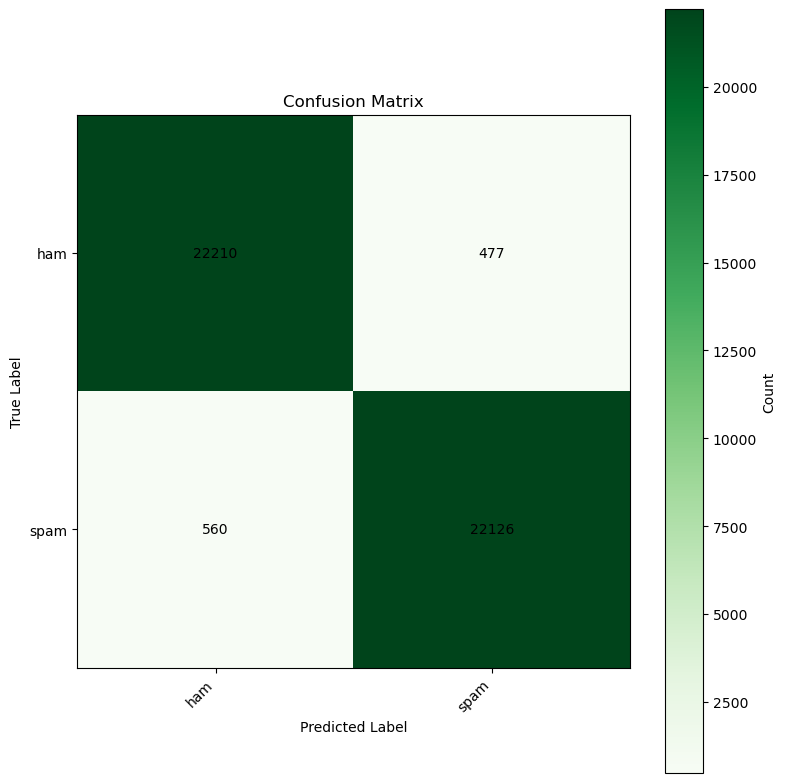

In [37]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
y_pred = np.argmax(model.predict([data_padded, html_padded]), axis=-1)  # Predict class labels

# Calculate confusion matrix
cm = tf.math.confusion_matrix(y_encoded, y_pred)

# Normalize confusion matrix (optional, consider for imbalanced classes)
# cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.colorbar(label='Count')
classes = encoder.classes_  # Get the class labels
fmt = 'd'  # Format specifier for integer values in squares
plt.xticks(np.arange(len(classes)), classes, rotation=45, ha='right')
plt.yticks(np.arange(len(classes)), classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Display values in squares on the heatmap
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, format(cm[i, j], fmt), ha="center", va="center", fontsize=10)

plt.grid(False)
plt.tight_layout()
plt.show()

In [21]:
test_start=time.time()
test_loss, test_accuracy = model.evaluate([data_padded_test, html_padded_test], y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
test_end=time.time()
test=test_end-test_start
print(f"Testing time: {test:.2f}")
y_pred = np.argmax(y_pred, axis=1)  # Convert one-hot predictions to class labels

# Calculate precision, recall, F1-score, and FPR for all classes
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
fpr = 1 - recall

# Print class-wise metrics (optional)
class_names = encoder.inverse_transform(range(len(encoder.classes_)))  # Get class names

# Print overall metrics
print(f"\nOverall Precision (Micro): {precision:.4f}")
print(f"Overall Recall (Micro): {recall:.4f}")
print(f"Overall F1-Score (Micro): {f1_score:.4f}")
print(f"Overall False Positive Rate (FPR): {fpr:.4f}")

284/284 [==============================] - 1s 3ms/step - loss: 0.0877 - accuracy: 0.9673
Test Loss: 0.0877
Test Accuracy: 0.9673
Testing time: 0.90


AxisError: axis 1 is out of bounds for array of dimension 1

In [7]:
loss, accuracy = model.evaluate([data_padded,html_padded], y_encoded, verbose=0)
print('Loss:', loss)
print('Accuracy:', accuracy)

Loss: 0.05815254524350166
Accuracy: 0.9792166948318481


1418/1418 [==============================] - 1s 952us/step
Confusion Matrix:
[[22271   416]
 [  527 22159]]


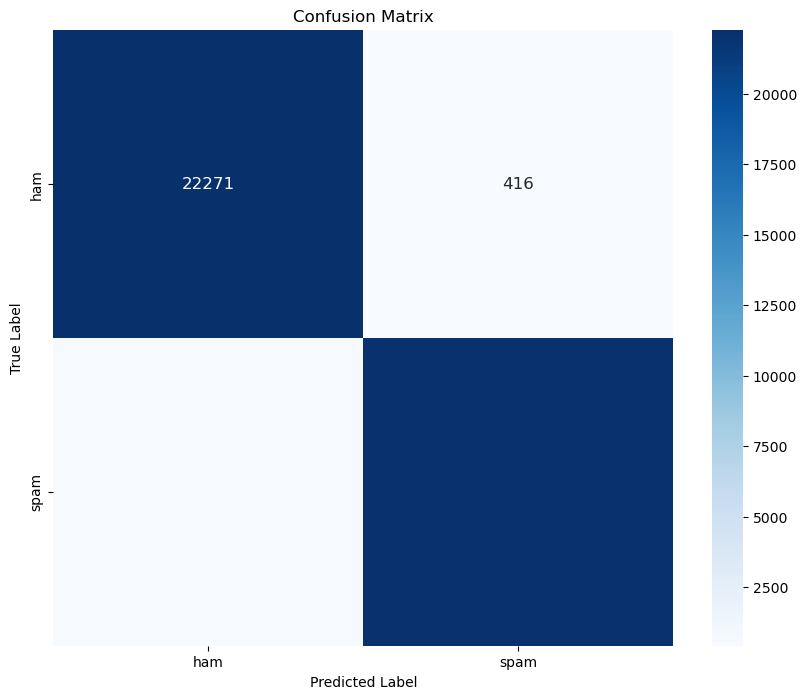

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Get the predictions for validation data
predictions = model.predict([data_padded, html_padded])  # Assuming data_padded and html_padded are your validation data

# Convert predictions from probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(y_encoded, predicted_labels)  # Use encoded true labels

# Plot confusion matrix as a heatmap
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_, annot_kws={"size": 12})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get predictions for validation data
predictions = model.predict([data_padded, html_padded])
predicted_labels = np.argmax(predictions, axis=1)

# Calculate precision, recall, and F1-score
precision = precision_score(y_encoded, predicted_labels, average='weighted')
recall = recall_score(y_encoded, predicted_labels, average='weighted')
f1 = f1_score(y_encoded, predicted_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

1418/1418 [==============================] - 1s 940us/step
Precision: 0.9792281849220287
Recall: 0.9792167147863267
F1-score: 0.9792165892807987


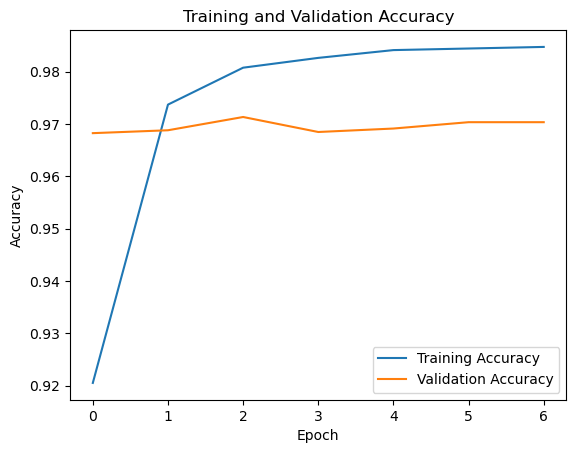

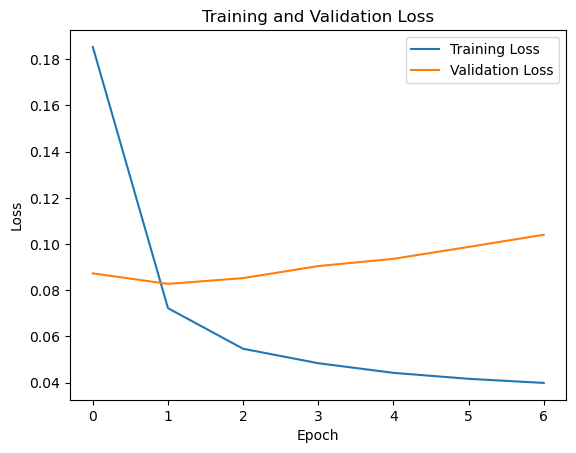

In [11]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import time

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Start recording time
start_time = time.time()

# Assuming url_df is your DataFrame containing 'Data', 'html', and 'Category' columns

# Feature Extraction (replace with your implementation for TF-IDF or similar)
data_text = url_df['Data'].tolist()
html_text = html_df['Data'].tolist()
max_len = 100
embedding_dim = 128

y = url_df['Category']

# Label encoding for target variable (assuming categories)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Separate preprocessing for data and html (example using Tokenizer)
data_tokenizer = Tokenizer(num_words=5000)  # Adjust num_words as needed
data_tokenizer.fit_on_texts(data_text)
data_sequences = data_tokenizer.texts_to_sequences(data_text)

html_tokenizer = Tokenizer(num_words=5000)  # Consider using the same vocabulary
html_tokenizer.fit_on_texts(html_text)
html_sequences = html_tokenizer.texts_to_sequences(html_text)

data_padded = pad_sequences(data_sequences, maxlen=max_len, padding='post')
html_padded = pad_sequences(html_sequences, maxlen=max_len, padding='post')

# Define Separate Embedding Layers and CNN Branches
data_in = Input(shape=(max_len,))
data_embedding = Embedding(len(data_tokenizer.word_index) + 1, embedding_dim)(data_in)
data_conv = Conv1D(32, kernel_size=3, activation='relu')(data_embedding)
data_pool = MaxPooling1D(pool_size=2)(data_conv)
data_flat = Flatten()(data_pool)

html_in = Input(shape=(max_len,))
html_embedding = Embedding(len(html_tokenizer.word_index) + 1, embedding_dim)(html_in)
html_conv = Conv1D(32, kernel_size=3, activation='relu')(html_embedding)
html_pool = MaxPooling1D(pool_size=2)(html_conv)
html_flat = Flatten()(html_pool)

# Concatenate Features
merged = tf.keras.layers.concatenate([data_flat, html_flat])

# Dense Layers for Classification
dense1 = Dense(128, activation='relu')(merged)  # First hidden layer
dense2 = Dense(64, activation='relu')(dense1)  # Second hidden layer (adjust as needed)

# Output layer with number of classes
final_output = Dense(len(encoder.classes_), activation='softmax')(dense2)

model = Model(inputs=[data_in, html_in], outputs=final_output)

# Compile the model with SGD optimizer and momentum
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the Model with GPU, early stopping, and SGD optimizer
with tf.device('/GPU:0'):
    history = model.fit([data_padded, html_padded], y_encoded, epochs=20, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# End recording time
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import time

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Start recording time
start_time = time.time()

# Assuming url_df is your DataFrame containing 'Data', 'html', and 'Category' columns
url_df = pd.read_csv('url.csv')
html_df = pd.read_csv('html.csv')

# Feature Extraction (replace with your implementation for TF-IDF or similar)
data_text = url_df['Data'].tolist()
html_text = html_df['Data'].tolist()
max_len = 100
embedding_dim = 128

y = url_df['Category']

# Label encoding for target variable (assuming categories)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Separate preprocessing for data and html (example using Tokenizer)
data_tokenizer = Tokenizer(num_words=5000)  # Adjust num_words as needed
data_tokenizer.fit_on_texts(data_text)
data_sequences = data_tokenizer.texts_to_sequences(data_text)

html_tokenizer = Tokenizer(num_words=5000)  # Consider using the same vocabulary
html_tokenizer.fit_on_texts(html_text)
html_sequences = html_tokenizer.texts_to_sequences(html_text)

data_padded = pad_sequences(data_sequences, maxlen=max_len, padding='post')
html_padded = pad_sequences(html_sequences, maxlen=max_len, padding='post')

# Split data into train and test sets
data_padded_train, data_padded_test, y_train, y_test = train_test_split(data_padded, y_encoded, test_size=0.2, random_state=42)
html_padded_train, html_padded_test, _, _ = train_test_split(html_padded, y_encoded, test_size=0.2, random_state=42)

# Define Separate Embedding Layers and CNN Branches
data_in = Input(shape=(max_len,))
data_embedding = Embedding(len(data_tokenizer.word_index) + 1, embedding_dim)(data_in)
data_conv = Conv1D(32, kernel_size=3, activation='relu')(data_embedding)
data_pool = MaxPooling1D(pool_size=2)(data_conv)
data_flat = Flatten()(data_pool)

html_in = Input(shape=(max_len,))
html_embedding = Embedding(len(html_tokenizer.word_index) + 1, embedding_dim)(html_in)
html_conv = Conv1D(32, kernel_size=3, activation='relu')(html_embedding)
html_pool = MaxPooling1D(pool_size=2)(html_conv)
html_flat = Flatten()(html_pool)

# Concatenate Features
merged = tf.keras.layers.concatenate([data_flat, html_flat])

# Dense Layers for Classification
dense1 = Dense(128, activation='relu')(merged)  # First hidden layer
dense2 = Dense(64, activation='relu')(dense1)  # Second hidden layer (adjust as needed)

# Output layer with number of classes
final_output = Dense(len(encoder.classes_), activation='softmax')(dense2)

model = Model(inputs=[data_in, html_in], outputs=final_output)

# Compile the model with SGD optimizer and momentum
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the Model with GPU, early stopping, and SGD optimizer
with tf.device('/GPU:0'):
    history = model.fit([data_padded_train, html_padded_train], y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# End recording time
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate([data_padded_test, html_padded_test], y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Accessing the training history to get validation accuracy
validation_accuracy = history.history['val_accuracy']
print(f"Validation Accuracy: {validation_accuracy[-1]:.4f}")


Num GPUs Available:  0


Epoch 1/20
227/227 [==============================] - 7s 27ms/step - loss: 0.3837 - accuracy: 0.8278 - val_loss: 0.2386 - val_accuracy: 0.9091
Epoch 2/20
227/227 [==============================] - 5s 21ms/step - loss: 0.1728 - accuracy: 0.9308 - val_loss: 0.1792 - val_accuracy: 0.9264
Epoch 3/20
227/227 [==============================] - 5s 21ms/step - loss: 0.1198 - accuracy: 0.9520 - val_loss: 0.1142 - val_accuracy: 0.9567
Epoch 4/20
227/227 [==============================] - 5s 20ms/step - loss: 0.0790 - accuracy: 0.9705 - val_loss: 0.0838 - val_accuracy: 0.9687
Epoch 5/20
227/227 [==============================] - 5s 20ms/step - loss: 0.0568 - accuracy: 0.9794 - val_loss: 0.0625 - val_accuracy: 0.9766
Epoch 6/20
227/227 [==============================] - 5s 20ms/step - loss: 0.0398 - accuracy: 0.9868 - val_loss: 0.0528 - val_accuracy: 0.9807
Epoch 7/20
227/227 [==============================] - 4s 17ms/step - loss: 0.0257 - accuracy: 0.9923 - val_loss: 0.0556 - val_accuracy: 0.9811

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Embedding, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import time

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Start recording time
start_time = time.time()

# Assuming url_df is your DataFrame containing 'Data', 'html', and 'Category' columns
url_df = pd.read_csv('url.csv')
html_df = pd.read_csv('html.csv')

# Feature Extraction (replace with your implementation for TF-IDF or similar)
data_text = url_df['Data'].tolist()
html_text = html_df['Data'].tolist()
max_len = 100
embedding_dim = 128

y = url_df['Category']

# Label encoding for target variable (assuming categories)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Separate preprocessing for data and html (example using Tokenizer)
data_tokenizer = Tokenizer(num_words=5000)  # Adjust num_words as needed
data_tokenizer.fit_on_texts(data_text)
data_sequences = data_tokenizer.texts_to_sequences(data_text)

html_tokenizer = Tokenizer(num_words=5000)  # Consider using the same vocabulary
html_tokenizer.fit_on_texts(html_text)
html_sequences = html_tokenizer.texts_to_sequences(html_text)

data_padded = pad_sequences(data_sequences, maxlen=max_len, padding='post')
html_padded = pad_sequences(html_sequences, maxlen=max_len, padding='post')

# Split data into train and test sets
data_padded_train, data_padded_test, y_train, y_test = train_test_split(data_padded, y_encoded, test_size=0.2, random_state=42)
html_padded_train, html_padded_test, _, _ = train_test_split(html_padded, y_encoded, test_size=0.2, random_state=42)

# Define Separate Embedding Layers and CNN Branches with Batch Normalization
data_in = Input(shape=(max_len,))
data_embedding = Embedding(len(data_tokenizer.word_index) + 1, embedding_dim)(data_in)
data_bn = BatchNormalization(axis=1)(data_embedding)  # Add BatchNormalization after Embedding
data_conv = Conv1D(32, kernel_size=3, activation='relu')(data_bn)
data_pool = MaxPooling1D(pool_size=2)(data_conv)
data_flat = Flatten()(data_pool)

html_in = Input(shape=(max_len,))
html_embedding = Embedding(len(html_tokenizer.word_index) + 1, embedding_dim)(html_in)
html_bn = BatchNormalization(axis=1)(html_embedding)  # Add BatchNormalization after Embedding
html_conv = Conv1D(32, kernel_size=3, activation='relu')(html_bn)
html_pool = MaxPooling1D(pool_size=2)(html_conv)
html_flat = Flatten()(html_pool)

# Concatenate Features
merged = tf.keras.layers.concatenate([data_flat, html_flat])

# Dense Layers for Classification
dense1 = Dense(128, activation='relu')(merged)  # First hidden layer
dense2 = Dense(64, activation='relu')(dense1)  # Second hidden layer (adjust as needed)

# Output layer with number of classes
final_output = Dense(len(encoder.classes_), activation='softmax')(dense2)

model = Model(inputs=[data_in, html_in], outputs=final_output)

# Compile the model with SGD optimizer and momentum
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the Model with GPU, early stopping, and SGD optimizer
with tf.device('/GPU:0'):
    history = model.fit([data_padded_train, html_padded_train], y_train, epochs=20, batch_size=128, validation_split=0.2)

# End recording time
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate([data_padded_test, html_padded_test], y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Accessing the training history to get validation accuracy
validation_accuracy = history.history['val_accuracy']
print(f"Validation Accuracy: {validation_accuracy[-1]:.4f}")


Num GPUs Available:  0


Epoch 1/20
227/227 [==============================] - 6s 25ms/step - loss: 0.1709 - accuracy: 0.9275 - val_loss: 0.3712 - val_accuracy: 0.9606
Epoch 2/20
227/227 [==============================] - 6s 24ms/step - loss: 0.0513 - accuracy: 0.9822 - val_loss: 0.1092 - val_accuracy: 0.9741
Epoch 3/20
227/227 [==============================] - 5s 24ms/step - loss: 0.0177 - accuracy: 0.9942 - val_loss: 0.0600 - val_accuracy: 0.9752
Epoch 4/20
227/227 [==============================] - 6s 24ms/step - loss: 0.0062 - accuracy: 0.9984 - val_loss: 0.0875 - val_accuracy: 0.9760
Epoch 5/20
227/227 [==============================] - 6s 24ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0693 - val_accuracy: 0.9789
Epoch 6/20
227/227 [==============================] - 6s 25ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0709 - val_accuracy: 0.9791
Epoch 7/20
227/227 [==============================] - 6s 25ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0690 - val_accuracy: 0.9798

In [19]:
loss, accuracy = model.evaluate([data_padded,html_padded], y_encoded, verbose=0)
print('Loss:', loss)
print('Accuracy:', accuracy)

Loss: 0.025544460862874985
Accuracy: 0.9920216798782349


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Embedding, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import time

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Start recording time
start_time = time.time()

# Assuming url_df is your DataFrame containing 'Data', 'html', and 'Category' columns
url_df = pd.read_csv('url.csv')
html_df = pd.read_csv('html.csv')

# Feature Extraction (replace with your implementation for TF-IDF or similar)
data_text = url_df['Data'].tolist()
html_text = html_df['Data'].tolist()
max_len = 100
embedding_dim = 128

y = url_df['Category']

# Label encoding for target variable (assuming categories)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Separate preprocessing for data and html (example using Tokenizer)
data_tokenizer = Tokenizer(num_words=5000)  # Adjust num_words as needed
data_tokenizer.fit_on_texts(data_text)
data_sequences = data_tokenizer.texts_to_sequences(data_text)

html_tokenizer = Tokenizer(num_words=5000)  # Consider using the same vocabulary
html_tokenizer.fit_on_texts(html_text)
html_sequences = html_tokenizer.texts_to_sequences(html_text)

data_padded = pad_sequences(data_sequences, maxlen=max_len, padding='post')
html_padded = pad_sequences(html_sequences, maxlen=max_len, padding='post')

# Split data into train and test sets
data_padded_train, data_padded_test, y_train, y_test = train_test_split(data_padded, y_encoded, test_size=0.2, random_state=42)
html_padded_train, html_padded_test, _, _ = train_test_split(html_padded, y_encoded, test_size=0.2, random_state=42)

# Define Separate Embedding Layers and CNN Branches with Batch Normalization and Dropout
data_in = Input(shape=(max_len,))
data_embedding = Embedding(len(data_tokenizer.word_index) + 1, embedding_dim)(data_in)
data_bn = BatchNormalization()(data_embedding)  # Add BatchNormalization after Embedding
data_conv = Conv1D(32, kernel_size=3, activation='relu')(data_bn)
data_pool = MaxPooling1D(pool_size=2)(data_conv)
data_flat = Flatten()(data_pool)
data_drop = Dropout(0.5)(data_flat)  # Add Dropout

html_in = Input(shape=(max_len,))
html_embedding = Embedding(len(html_tokenizer.word_index) + 1, embedding_dim)(html_in)
html_bn = BatchNormalization()(html_embedding)  # Add BatchNormalization after Embedding
html_conv = Conv1D(32, kernel_size=3, activation='relu')(html_bn)
html_pool = MaxPooling1D(pool_size=2)(html_conv)
html_flat = Flatten()(html_pool)
html_drop = Dropout(0.5)(html_flat)  # Add Dropout

# Concatenate Features
merged = tf.keras.layers.concatenate([data_drop, html_drop])

# Dense Layers for Classification
dense1 = Dense(128, activation='relu')(merged)  # First hidden layer
dense2 = Dense(64, activation='relu')(dense1)  # Second hidden layer (adjust as needed)

# Output layer with number of classes
final_output = Dense(len(encoder.classes_), activation='softmax')(dense2)

model = Model(inputs=[data_in, html_in], outputs=final_output)

# Compile the model with Adam optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the Model with GPU, early stopping, and Adam optimizer
with tf.device('/GPU:0'):
    history = model.fit([data_padded_train, html_padded_train], y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# End recording time
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate([data_padded_test, html_padded_test], y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Accessing the training history to get validation accuracy
validation_accuracy = history.history['val_accuracy']
print(f"Validation Accuracy: {validation_accuracy[-1]:.4f}")


Num GPUs Available:  0


Epoch 1/20


2024-05-17 23:27:02.114800: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


227/227 [==============================] - 10s 42ms/step - loss: 0.2364 - accuracy: 0.8961 - val_loss: 0.4779 - val_accuracy: 0.9163
Epoch 2/20
227/227 [==============================] - 8s 33ms/step - loss: 0.1098 - accuracy: 0.9572 - val_loss: 0.2034 - val_accuracy: 0.9413
Epoch 3/20
227/227 [==============================] - 8s 33ms/step - loss: 0.0746 - accuracy: 0.9714 - val_loss: 0.0730 - val_accuracy: 0.9748
Epoch 4/20
227/227 [==============================] - 7s 33ms/step - loss: 0.0551 - accuracy: 0.9804 - val_loss: 0.0551 - val_accuracy: 0.9800
Epoch 5/20
227/227 [==============================] - 7s 29ms/step - loss: 0.0412 - accuracy: 0.9849 - val_loss: 0.0942 - val_accuracy: 0.9647
Epoch 6/20
227/227 [==============================] - 6s 28ms/step - loss: 0.0324 - accuracy: 0.9880 - val_loss: 0.6324 - val_accuracy: 0.8271
Epoch 7/20
227/227 [==============================] - 8s 36ms/step - loss: 0.0262 - accuracy: 0.9905 - val_loss: 0.0525 - val_accuracy: 0.9820
Epoch 8/2

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Embedding, Flatten, Dense, BatchNormalization, Dropout, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import time

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Start recording time
start_time = time.time()

# Assuming url_df is your DataFrame containing 'Data', 'html', and 'Category' columns
url_df = pd.read_csv('url.csv')
html_df = pd.read_csv('html.csv')

# Feature Extraction (replace with your implementation for TF-IDF or similar)
data_text = url_df['Data'].tolist()
html_text = html_df['Data'].tolist()
max_len = 100
embedding_dim = 128

y = url_df['Category']

# Label encoding for target variable (assuming categories)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Separate preprocessing for data and html (example using Tokenizer)
data_tokenizer = Tokenizer(num_words=10000)  # Increased num_words for richer vocabulary
data_tokenizer.fit_on_texts(data_text)
data_sequences = data_tokenizer.texts_to_sequences(data_text)

html_tokenizer = Tokenizer(num_words=10000)  # Consider using the same vocabulary
html_tokenizer.fit_on_texts(html_text)
html_sequences = html_tokenizer.texts_to_sequences(html_text)

data_padded = pad_sequences(data_sequences, maxlen=max_len, padding='post')
html_padded = pad_sequences(html_sequences, maxlen=max_len, padding='post')

# Split data into train and test sets
data_padded_train, data_padded_test, y_train, y_test = train_test_split(data_padded, y_encoded, test_size=0.2, random_state=42)
html_padded_train, html_padded_test, _, _ = train_test_split(html_padded, y_encoded, test_size=0.2, random_state=42)

# Learning rate scheduler function
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Define Separate Embedding Layers and CNN Branches with Batch Normalization and Dropout
data_in = Input(shape=(max_len,))
data_embedding = Embedding(len(data_tokenizer.word_index) + 1, embedding_dim)(data_in)
data_bn = BatchNormalization()(data_embedding)  # Add BatchNormalization after Embedding
data_conv1 = Conv1D(64, kernel_size=3, activation='relu')(data_bn)
data_pool1 = MaxPooling1D(pool_size=2)(data_conv1)
data_conv2 = Conv1D(128, kernel_size=3, activation='relu')(data_pool1)
data_pool2 = GlobalMaxPooling1D()(data_conv2)
data_flat = Flatten()(data_pool2)
data_drop = Dropout(0.5)(data_flat)  # Add Dropout

html_in = Input(shape=(max_len,))
html_embedding = Embedding(len(html_tokenizer.word_index) + 1, embedding_dim)(html_in)
html_bn = BatchNormalization()(html_embedding)  # Add BatchNormalization after Embedding
html_conv1 = Conv1D(64, kernel_size=3, activation='relu')(html_bn)
html_pool1 = MaxPooling1D(pool_size=2)(html_conv1)
html_conv2 = Conv1D(128, kernel_size=3, activation='relu')(html_pool1)
html_pool2 = GlobalMaxPooling1D()(html_conv2)
html_flat = Flatten()(html_pool2)
html_drop = Dropout(0.5)(html_flat)  # Add Dropout

# Concatenate Features
merged = tf.keras.layers.concatenate([data_drop, html_drop])

# Dense Layers for Classification
dense1 = Dense(256, activation='relu')(merged)  # Increased units in first hidden layer
drop1 = Dropout(0.5)(dense1)  # Add Dropout
dense2 = Dense(128, activation='relu')(drop1)  # Second hidden layer (adjust as needed)
drop2 = Dropout(0.5)(dense2)  # Add Dropout

# Output layer with number of classes
final_output = Dense(len(encoder.classes_), activation='softmax')(drop2)

model = Model(inputs=[data_in, html_in], outputs=final_output)

# Compile the model with Adam optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# Define early stopping callback and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)

# Train the Model with GPU, early stopping, and Adam optimizer
with tf.device('/GPU:0'):
    history = model.fit([data_padded_train, html_padded_train], y_train, epochs=30, batch_size=128, validation_split=0.2, callbacks=[early_stopping, lr_scheduler])

# End recording time
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))
test_start=time.time()
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate([data_padded_test, html_padded_test], y_test)
test_end=time.time()
test=test_end-test_start
print(f"Testing time: {test:.2f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Accessing the training history to get validation accuracy
validation_accuracy = history.history['val_accuracy']
print(f"Validation Accuracy: {validation_accuracy[-1]:.4f}")


Num GPUs Available:  0


Epoch 1/30
227/227 [==============================] - 15s 65ms/step - loss: 0.3272 - accuracy: 0.8514 - val_loss: 0.4961 - val_accuracy: 0.9157 - lr: 0.0100
Epoch 2/30
227/227 [==============================] - 12s 51ms/step - loss: 0.1306 - accuracy: 0.9512 - val_loss: 0.1628 - val_accuracy: 0.9731 - lr: 0.0100
Epoch 3/30
227/227 [==============================] - 12s 53ms/step - loss: 0.0817 - accuracy: 0.9708 - val_loss: 0.0686 - val_accuracy: 0.9762 - lr: 0.0100
Epoch 4/30
227/227 [==============================] - 13s 58ms/step - loss: 0.0579 - accuracy: 0.9803 - val_loss: 0.0570 - val_accuracy: 0.9796 - lr: 0.0100
Epoch 5/30
227/227 [==============================] - 16s 71ms/step - loss: 0.0457 - accuracy: 0.9838 - val_loss: 0.0498 - val_accuracy: 0.9822 - lr: 0.0100
Epoch 6/30
227/227 [==============================] - 25s 112ms/step - loss: 0.0324 - accuracy: 0.9888 - val_loss: 0.0467 - val_accuracy: 0.9843 - lr: 0.0100
Epoch 7/30
227/227 [==============================] - 23s

284/284 [==============================] - 1s 3ms/step


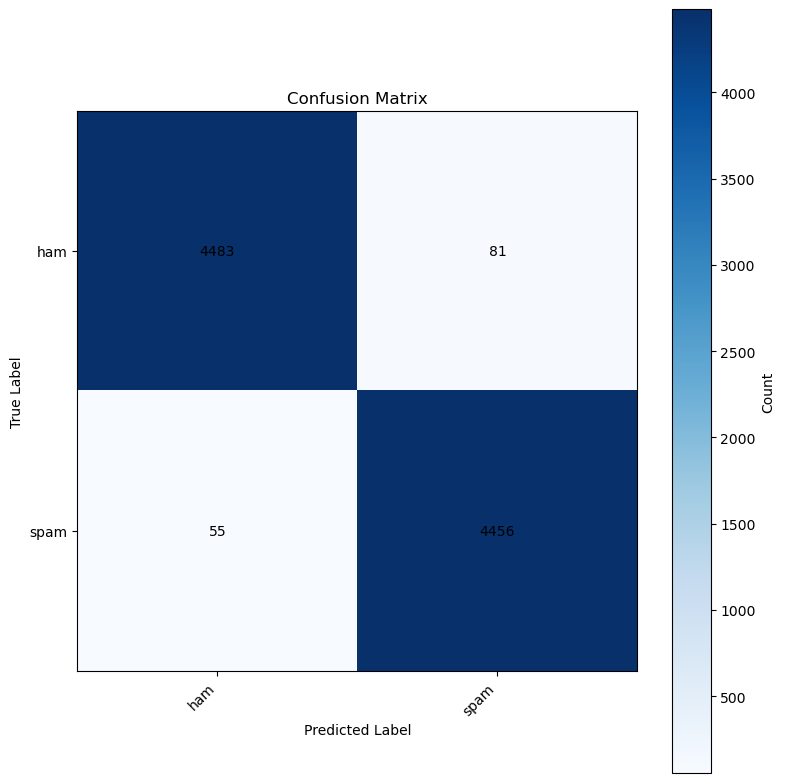

In [33]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
y_pred = np.argmax(model.predict([data_padded_test, html_padded_test]), axis=-1)  # Predict class labels

# Calculate confusion matrix
cm = tf.math.confusion_matrix(y_test, y_pred)

# Normalize confusion matrix (optional, consider for imbalanced classes)
# cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar(label='Count')
classes = encoder.classes_  # Get the class labels
fmt = 'd'  # Format specifier for integer values in squares
plt.xticks(np.arange(len(classes)), classes, rotation=45, ha='right')
plt.yticks(np.arange(len(classes)), classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Display values in squares on the heatmap
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, format(cm[i, j], fmt), ha="center", va="center", fontsize=10)

plt.grid(False)
plt.tight_layout()
plt.show()

1418/1418 [==============================] - 5s 3ms/step


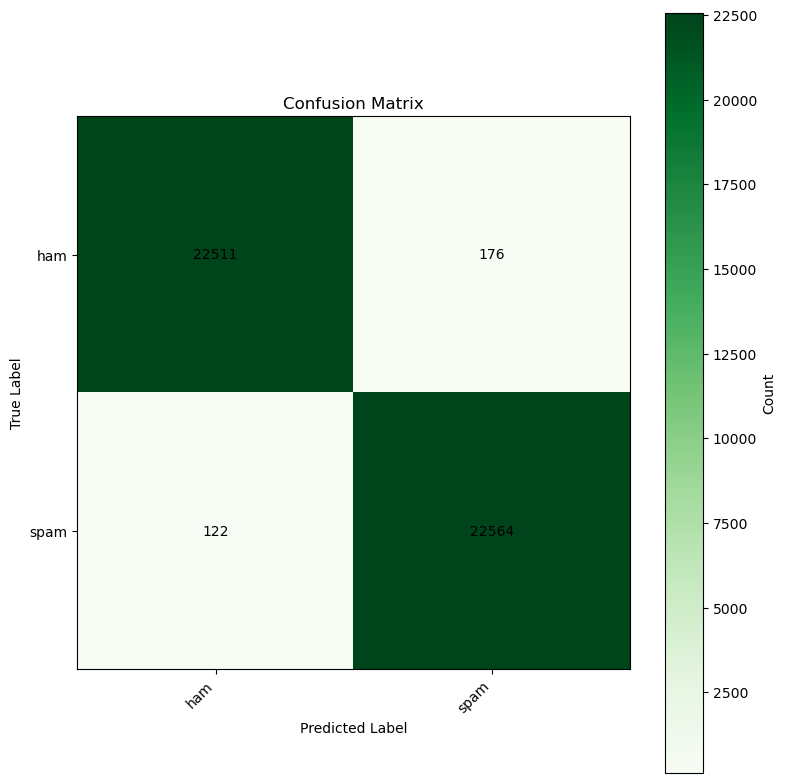

In [35]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
y_pred = np.argmax(model.predict([data_padded, html_padded]), axis=-1)  # Predict class labels

# Calculate confusion matrix
cm = tf.math.confusion_matrix(y_encoded, y_pred)

# Normalize confusion matrix (optional, consider for imbalanced classes)
# cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.colorbar(label='Count')
classes = encoder.classes_  # Get the class labels
fmt = 'd'  # Format specifier for integer values in squares
plt.xticks(np.arange(len(classes)), classes, rotation=45, ha='right')
plt.yticks(np.arange(len(classes)), classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Display values in squares on the heatmap
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, format(cm[i, j], fmt), ha="center", va="center", fontsize=10)

plt.grid(False)
plt.tight_layout()
plt.show()

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Embedding, Flatten, Dense, BatchNormalization, Dropout, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
y_pred = model.predict([data_padded_test, html_padded_test])
y_pred = np.argmax(y_pred, axis=1)  # Convert one-hot predictions to class labels

# Calculate precision, recall, F1-score, and FPR for all classes
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
fpr = 1 - recall

# Print class-wise metrics (optional)
class_names = encoder.inverse_transform(range(len(encoder.classes_)))  # Get class names
print("\nClass-wise Evaluation:")
# for i, class_name in enumerate(class_names):
#   print(f"Class: {class_name}")
#   print(f"  Precision: {precision[i]:.4f}")
#   print(f"  Recall: {recall[i]:.4f}")
#   print(f"  F1-Score: {f1_score[i]:.4f}")
#   print(f"  False Positive Rate (FPR): {fpr[i]:.4f}\n")

# Print overall metrics
print(f"\nOverall Precision (Micro): {precision:.4f}")
print(f"Overall Recall (Micro): {recall:.4f}")
print(f"Overall F1-Score (Micro): {f1_score:.4f}")
print(f"Overall False Positive Rate (FPR): {fpr:.4f}")

284/284 [==============================] - 1s 3ms/step

Class-wise Evaluation:

Overall Precision (Micro): 0.9851
Overall Recall (Micro): 0.9851
Overall F1-Score (Micro): 0.9851
Overall False Positive Rate (FPR): 0.0149


In [2]:
loss, accuracy = model.evaluate([data_padded,html_padded], y_encoded, verbose=0)
print('Loss:', loss)
print('Accuracy:', accuracy)

Loss: 0.017045579850673676
Accuracy: 0.9950190782546997


In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get predictions for test data
test_predictions = model.predict([data_padded_test, html_padded_test])
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, test_predicted_labels, average='weighted')
recall = recall_score(y_test, test_predicted_labels, average='weighted')
f1 = f1_score(y_test, test_predicted_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


284/284 [==============================] - 0s 2ms/step
Precision: 0.9930580399716027
Recall: 0.9930578512396694
F1-score: 0.993057837077608


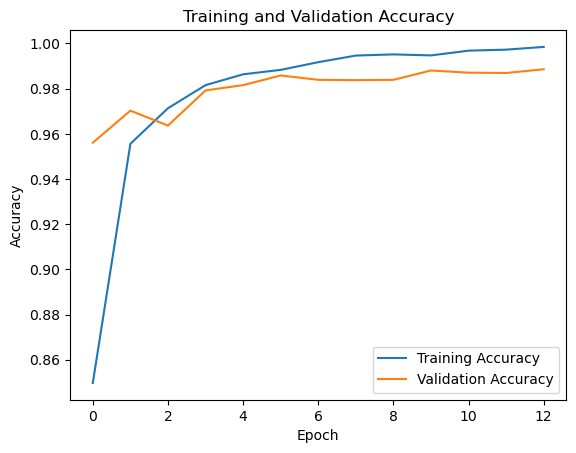

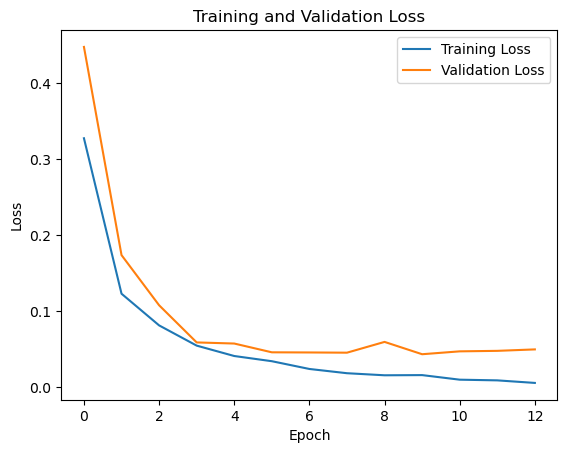

In [5]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

1418/1418 [==============================] - 13s 9ms/step
[[22587   100]
 [  126 22560]]


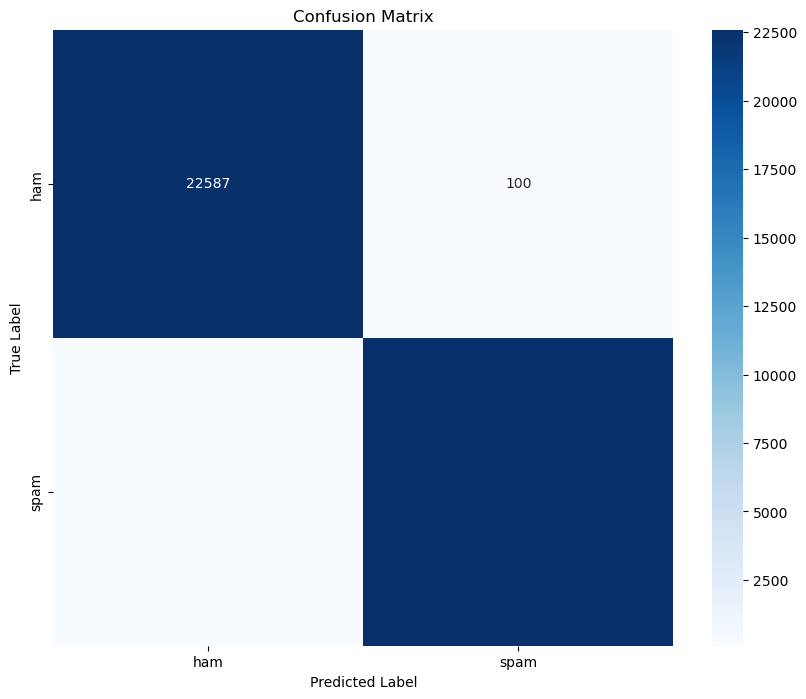

In [4]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions for test data
predictions = model.predict([data_padded, html_padded])
predicted_labels = np.argmax(predictions, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_encoded, predicted_labels)
print(conf_matrix)
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [32]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
cm = tf.math.confusion_matrix([data_padded_test, html_padded_test], y_test)

# Normalize confusion matrix (optional, consider for imbalanced classes)
# cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar(label='Count')
classes = encoder.classes_  # Get the class labels
fmt = 'd'  # Format specifier for integer values in squares
plt.xticks(np.arange(len(classes)), classes, rotation=45, ha='right')
plt.yticks(np.arange(len(classes)), classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Display values in squares on the heatmap
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, format(cm[i, j], fmt), ha="center", va="center", fontsize=10)

plt.grid(False)
plt.tight_layout()
plt.show()


InvalidArgumentError: {{function_node __wrapped__Pack_N_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Shapes of all inputs must match: values[0].shape = [2,9075,100] != values[1].shape = [9075] [Op:Pack] name: stack

284/284 [==============================] - 1s 3ms/step


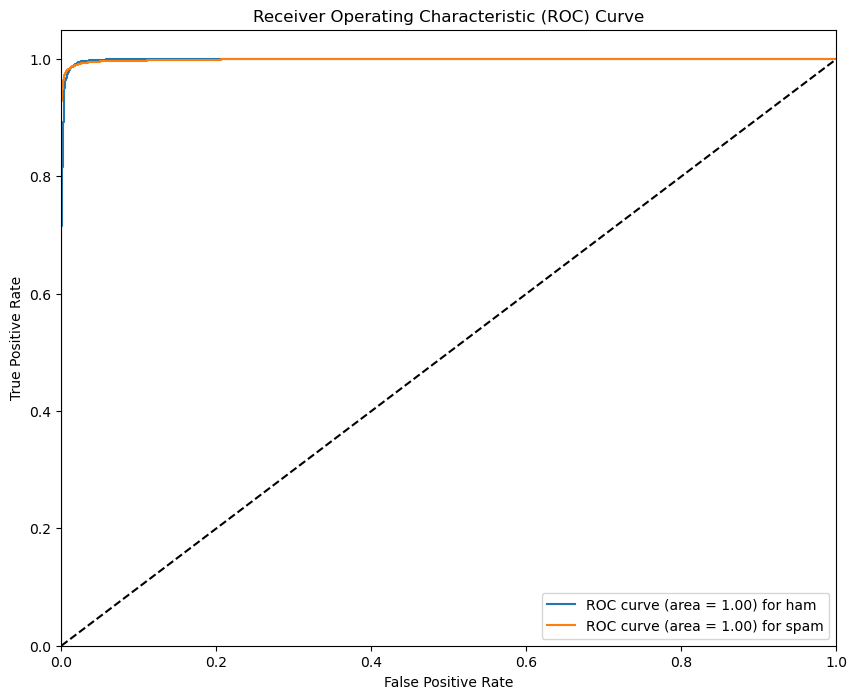

In [6]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for each class on test data
y_prob_test = model.predict([data_padded_test, html_padded_test])

# Convert true labels to one-hot encoding for test data
y_one_hot_test = tf.keras.utils.to_categorical(y_test, num_classes=len(encoder.classes_))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_one_hot_test[:, i], y_prob_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for {encoder.classes_[i]}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



Num GPUs Available:  0
Training fold 1...


Epoch 1/30
284/284 [==============================] - 15s 50ms/step - loss: 0.2815 - accuracy: 0.8762 - val_loss: 0.3940 - val_accuracy: 0.9532 - lr: 0.0100
Epoch 2/30
284/284 [==============================] - 12s 43ms/step - loss: 0.1038 - accuracy: 0.9610 - val_loss: 0.1003 - val_accuracy: 0.9673 - lr: 0.0100
Epoch 3/30
284/284 [==============================] - 12s 41ms/step - loss: 0.0655 - accuracy: 0.9770 - val_loss: 0.1048 - val_accuracy: 0.9571 - lr: 0.0100
Epoch 4/30
284/284 [==============================] - 12s 44ms/step - loss: 0.0564 - accuracy: 0.9799 - val_loss: 0.0952 - val_accuracy: 0.9612 - lr: 0.0100
Epoch 5/30
284/284 [==============================] - 13s 44ms/step - loss: 0.0392 - accuracy: 0.9868 - val_loss: 0.0665 - val_accuracy: 0.9731 - lr: 0.0100
Epoch 6/30
284/284 [==============================] - 12s 42ms/step - loss: 0.0285 - accuracy: 0.9910 - val_loss: 0.1386 - val_accuracy: 0.9409 - lr: 0.0100
Epoch 7/30
284/284 [==============================] - 14s 

Epoch 1/30
284/284 [==============================] - 24s 83ms/step - loss: 0.2970 - accuracy: 0.8640 - val_loss: 0.3670 - val_accuracy: 0.9564 - lr: 0.0100
Epoch 2/30
284/284 [==============================] - 22s 78ms/step - loss: 0.1092 - accuracy: 0.9604 - val_loss: 0.1010 - val_accuracy: 0.9732 - lr: 0.0100
Epoch 3/30
284/284 [==============================] - 21s 75ms/step - loss: 0.0758 - accuracy: 0.9723 - val_loss: 0.0598 - val_accuracy: 0.9777 - lr: 0.0100
Epoch 4/30
284/284 [==============================] - 21s 73ms/step - loss: 0.0578 - accuracy: 0.9802 - val_loss: 0.0498 - val_accuracy: 0.9803 - lr: 0.0100
Epoch 5/30
284/284 [==============================] - 21s 76ms/step - loss: 0.0401 - accuracy: 0.9861 - val_loss: 0.0484 - val_accuracy: 0.9828 - lr: 0.0100
Epoch 6/30
284/284 [==============================] - 20s 69ms/step - loss: 0.0270 - accuracy: 0.9906 - val_loss: 0.0896 - val_accuracy: 0.9678 - lr: 0.0100
Epoch 7/30
284/284 [==============================] - 21s 

Epoch 1/30
284/284 [==============================] - 23s 80ms/step - loss: 0.2988 - accuracy: 0.8611 - val_loss: 0.3564 - val_accuracy: 0.9593 - lr: 0.0100
Epoch 2/30
284/284 [==============================] - 22s 76ms/step - loss: 0.1099 - accuracy: 0.9580 - val_loss: 0.1017 - val_accuracy: 0.9752 - lr: 0.0100
Epoch 3/30
284/284 [==============================] - 21s 75ms/step - loss: 0.0750 - accuracy: 0.9738 - val_loss: 0.0532 - val_accuracy: 0.9803 - lr: 0.0100
Epoch 4/30
284/284 [==============================] - 22s 76ms/step - loss: 0.0503 - accuracy: 0.9827 - val_loss: 0.0529 - val_accuracy: 0.9802 - lr: 0.0100
Epoch 5/30
284/284 [==============================] - 20s 70ms/step - loss: 0.0374 - accuracy: 0.9875 - val_loss: 0.0599 - val_accuracy: 0.9794 - lr: 0.0100
Epoch 6/30
284/284 [==============================] - 22s 79ms/step - loss: 0.0253 - accuracy: 0.9921 - val_loss: 0.0438 - val_accuracy: 0.9841 - lr: 0.0100
Epoch 7/30
284/284 [==============================] - 20s 

Epoch 1/30
284/284 [==============================] - 22s 76ms/step - loss: 0.2834 - accuracy: 0.8747 - val_loss: 0.3836 - val_accuracy: 0.9553 - lr: 0.0100
Epoch 2/30
284/284 [==============================] - 20s 72ms/step - loss: 0.1069 - accuracy: 0.9616 - val_loss: 0.1005 - val_accuracy: 0.9756 - lr: 0.0100
Epoch 3/30
284/284 [==============================] - 21s 72ms/step - loss: 0.0719 - accuracy: 0.9742 - val_loss: 0.0518 - val_accuracy: 0.9814 - lr: 0.0100
Epoch 4/30
284/284 [==============================] - 21s 75ms/step - loss: 0.0516 - accuracy: 0.9818 - val_loss: 0.0478 - val_accuracy: 0.9819 - lr: 0.0100
Epoch 5/30
284/284 [==============================] - 20s 69ms/step - loss: 0.0384 - accuracy: 0.9869 - val_loss: 0.0515 - val_accuracy: 0.9826 - lr: 0.0100
Epoch 6/30
284/284 [==============================] - 21s 74ms/step - loss: 0.0295 - accuracy: 0.9901 - val_loss: 0.0392 - val_accuracy: 0.9859 - lr: 0.0100
Epoch 7/30
284/284 [==============================] - 19s 

Epoch 1/30
284/284 [==============================] - 22s 77ms/step - loss: 0.2976 - accuracy: 0.8647 - val_loss: 0.3858 - val_accuracy: 0.9590 - lr: 0.0100
Epoch 2/30
284/284 [==============================] - 21s 75ms/step - loss: 0.1078 - accuracy: 0.9613 - val_loss: 0.0959 - val_accuracy: 0.9745 - lr: 0.0100
Epoch 3/30
284/284 [==============================] - 21s 74ms/step - loss: 0.0732 - accuracy: 0.9738 - val_loss: 0.0534 - val_accuracy: 0.9812 - lr: 0.0100
Epoch 4/30
284/284 [==============================] - 19s 68ms/step - loss: 0.0540 - accuracy: 0.9822 - val_loss: 0.0558 - val_accuracy: 0.9792 - lr: 0.0100
Epoch 5/30
284/284 [==============================] - 22s 76ms/step - loss: 0.0372 - accuracy: 0.9872 - val_loss: 0.0418 - val_accuracy: 0.9848 - lr: 0.0100
Epoch 6/30
284/284 [==============================] - 19s 68ms/step - loss: 0.0264 - accuracy: 0.9915 - val_loss: 0.0438 - val_accuracy: 0.9849 - lr: 0.0100
Epoch 7/30
284/284 [==============================] - 22s 

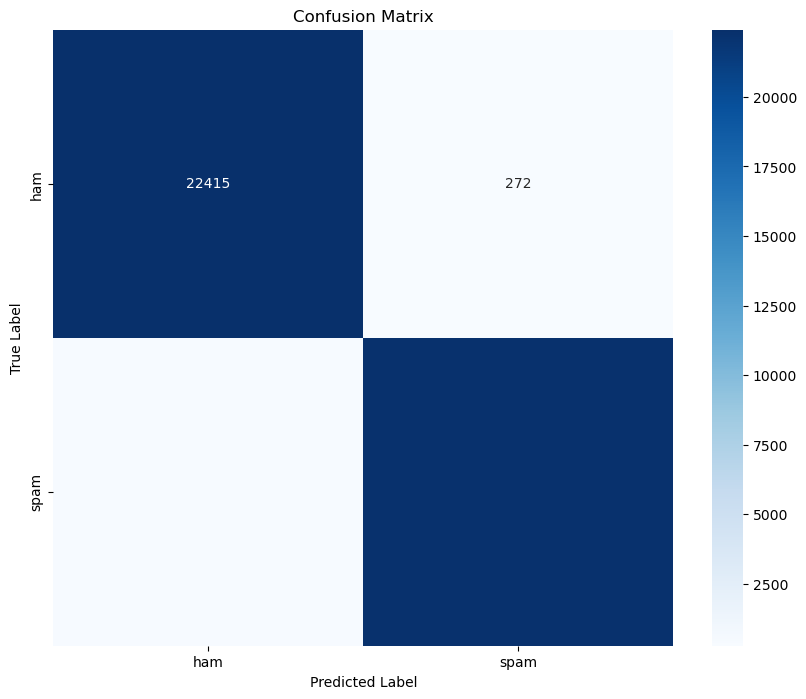

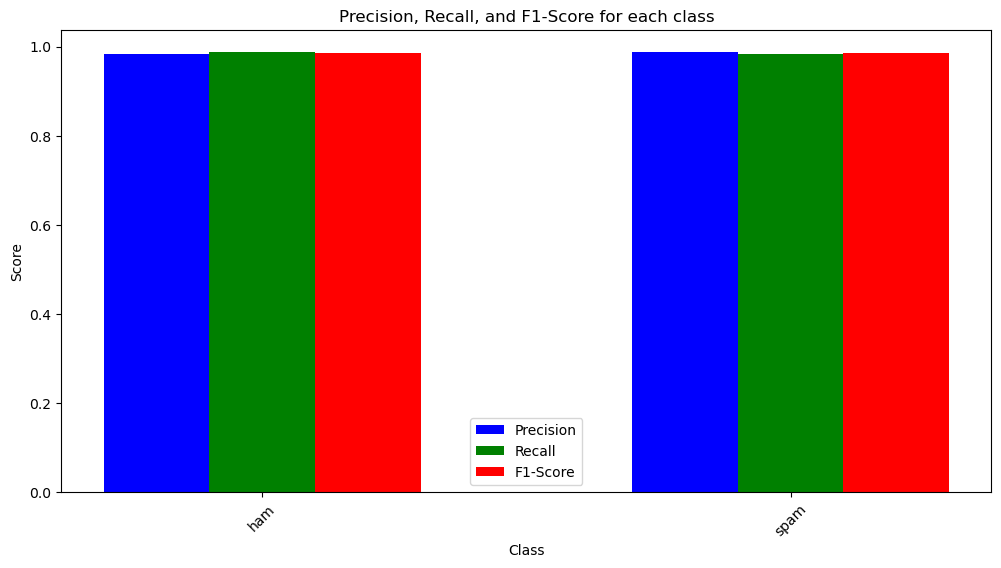

Total training time: 1080.64 seconds


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Embedding, Flatten, Dense, BatchNormalization, Dropout, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Start recording time
start_time = time.time()

# Assuming url_df is your DataFrame containing 'Data', 'html', and 'Category' columns
url_df = pd.read_csv('url.csv')
html_df = pd.read_csv('html.csv')

# Feature Extraction (replace with your implementation for TF-IDF or similar)
data_text = url_df['Data'].tolist()
html_text = html_df['Data'].tolist()
max_len = 100
embedding_dim = 128

y = url_df['Category']

# Label encoding for target variable (assuming categories)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Separate preprocessing for data and html (example using Tokenizer)
data_tokenizer = Tokenizer(num_words=10000)  # Increased num_words for richer vocabulary
data_tokenizer.fit_on_texts(data_text)
data_sequences = data_tokenizer.texts_to_sequences(data_text)

html_tokenizer = Tokenizer(num_words=10000)  # Consider using the same vocabulary
html_tokenizer.fit_on_texts(html_text)
html_sequences = html_tokenizer.texts_to_sequences(html_text)

data_padded = pad_sequences(data_sequences, maxlen=max_len, padding='post')
html_padded = pad_sequences(html_sequences, maxlen=max_len, padding='post')

# Learning rate scheduler function
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Define Separate Embedding Layers and CNN Branches with Batch Normalization and Dropout
def create_model(data_tokenizer, html_tokenizer, embedding_dim, max_len, encoder):
    data_in = Input(shape=(max_len,))
    data_embedding = Embedding(len(data_tokenizer.word_index) + 1, embedding_dim)(data_in)
    data_bn = BatchNormalization()(data_embedding)  # Add BatchNormalization after Embedding
    data_conv1 = Conv1D(64, kernel_size=3, activation='relu')(data_bn)
    data_pool1 = MaxPooling1D(pool_size=2)(data_conv1)
    data_conv2 = Conv1D(128, kernel_size=3, activation='relu')(data_pool1)
    data_pool2 = GlobalMaxPooling1D()(data_conv2)
    data_flat = Flatten()(data_pool2)
    data_drop = Dropout(0.5)(data_flat)  # Add Dropout

    html_in = Input(shape=(max_len,))
    html_embedding = Embedding(len(html_tokenizer.word_index) + 1, embedding_dim)(html_in)
    html_bn = BatchNormalization()(html_embedding)  # Add BatchNormalization after Embedding
    html_conv1 = Conv1D(64, kernel_size=3, activation='relu')(html_bn)
    html_pool1 = MaxPooling1D(pool_size=2)(html_conv1)
    html_conv2 = Conv1D(128, kernel_size=3, activation='relu')(html_pool1)
    html_pool2 = GlobalMaxPooling1D()(html_conv2)
    html_flat = Flatten()(html_pool2)
    html_drop = Dropout(0.5)(html_flat)  # Add Dropout

    # Concatenate Features
    merged = tf.keras.layers.concatenate([data_drop, html_drop])

    # Dense Layers for Classification
    dense1 = Dense(256, activation='relu')(merged)  # Increased units in first hidden layer
    drop1 = Dropout(0.5)(dense1)  # Add Dropout
    dense2 = Dense(128, activation='relu')(drop1)  # Second hidden layer (adjust as needed)
    drop2 = Dropout(0.5)(dense2)  # Add Dropout

    # Output layer with number of classes
    final_output = Dense(len(encoder.classes_), activation='softmax')(drop2)

    model = Model(inputs=[data_in, html_in], outputs=final_output)

    # Compile the model with SGD optimizer
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_no = 1
accuracies = []
all_y_true = []
all_y_pred = []

for train_index, val_index in kf.split(data_padded):
    print(f'Training fold {fold_no}...')
    
    # Split data into training and validation sets
    data_padded_train, data_padded_val = data_padded[train_index], data_padded[val_index]
    html_padded_train, html_padded_val = html_padded[train_index], html_padded[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]
    
    # Create model
    model = create_model(data_tokenizer, html_tokenizer, embedding_dim, max_len, encoder)
    
    # Define early stopping callback and learning rate scheduler
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    lr_scheduler = LearningRateScheduler(scheduler)

    # Train the Model with GPU, early stopping, and learning rate scheduler
    with tf.device('/GPU:0'):
        history = model.fit([data_padded_train, html_padded_train], y_train, epochs=30, batch_size=128, validation_data=([data_padded_val, html_padded_val], y_val), callbacks=[early_stopping, lr_scheduler])
    
    # Evaluate the model on the validation set
    val_loss, val_accuracy = model.evaluate([data_padded_val, html_padded_val], y_val)
    print(f"Fold {fold_no} - Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")
    
    # Predict on the validation set
    y_val_pred = np.argmax(model.predict([data_padded_val, html_padded_val]), axis=1)
    
    all_y_true.extend(y_val)
    all_y_pred.extend(y_val_pred)
    
    accuracies.append(val_accuracy)
    fold_no += 1

# Calculate average accuracy across all folds
average_accuracy = np.mean(accuracies)
print(f"Average Validation Accuracy: {average_accuracy:.4f}")

# Generate classification report
report = classification_report(all_y_true, all_y_pred, target_names=encoder.classes_)
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(all_y_true, all_y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Precision, Recall, F1-Score for each class
precision, recall, f1, _ = precision_recall_fscore_support(all_y_true, all_y_pred, average=None, labels=range(len(encoder.classes_)))

# Plot Precision, Recall, F1-Score
plt.figure(figsize=(12, 6))
x = np.arange(len(encoder.classes_))

plt.bar(x - 0.2, precision, 0.2, label='Precision', color='b')
plt.bar(x, recall, 0.2, label='Recall', color='g')
plt.bar(x + 0.2, f1, 0.2, label='F1-Score', color='r')

plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score for each class')
plt.xticks(x, encoder.classes_, rotation=45)
plt.legend()
plt.show()

# End recording time
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print("Total training time: {:.2f} seconds".format(training_time))


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import pandas as pd
import time

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Start recording time
start_time = time.time()

# Assuming url_df and html_df are your DataFrames containing 'Data' and 'Category' columns
url_df = pd.read_csv('url.csv')
html_df = pd.read_csv('html.csv')

# Preprocessing
data_text = url_df['Data'].tolist()
html_text = html_df['Data'].tolist()
max_len = 100
embedding_dim = 128

y = url_df['Category']
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Tokenization and padding
data_tokenizer = Tokenizer(num_words=10000)
data_tokenizer.fit_on_texts(data_text)
data_sequences = data_tokenizer.texts_to_sequences(data_text)

html_tokenizer = Tokenizer(num_words=10000)
html_tokenizer.fit_on_texts(html_text)
html_sequences = html_tokenizer.texts_to_sequences(html_text)

data_padded = pad_sequences(data_sequences, maxlen=max_len, padding='post')
html_padded = pad_sequences(html_sequences, maxlen=max_len, padding='post')

# Split data
data_padded_train, data_padded_test, y_train, y_test = train_test_split(data_padded, y_encoded, test_size=0.2, random_state=42)
html_padded_train, html_padded_test, _, _ = train_test_split(html_padded, y_encoded, test_size=0.2, random_state=42)

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Define the model with LSTM layers
data_in = Input(shape=(max_len,))
data_embedding = Embedding(len(data_tokenizer.word_index) + 1, embedding_dim)(data_in)
data_bn = BatchNormalization()(data_embedding)
data_lstm = LSTM(64, return_sequences=True)(data_bn)
data_lstm_flat = LSTM(32)(data_lstm)
data_drop = Dropout(0.5)(data_lstm_flat)

html_in = Input(shape=(max_len,))
html_embedding = Embedding(len(html_tokenizer.word_index) + 1, embedding_dim)(html_in)
html_bn = BatchNormalization()(html_embedding)
html_lstm = LSTM(64, return_sequences=True)(html_bn)
html_lstm_flat = LSTM(32)(html_lstm)
html_drop = Dropout(0.5)(html_lstm_flat)

# Concatenate features
merged = tf.keras.layers.concatenate([data_drop, html_drop])

# Dense layers for classification
dense1 = Dense(256, activation='relu')(merged)
drop1 = Dropout(0.5)(dense1)
dense2 = Dense(128, activation='relu')(drop1)
drop2 = Dropout(0.5)(dense2)

# Output layer
final_output = Dense(len(encoder.classes_), activation='softmax')(drop2)

model = Model(inputs=[data_in, html_in], outputs=final_output)

# Compile the model with Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)

# Train the model
with tf.device('/GPU:0'):
    history = model.fit([data_padded_train, html_padded_train], y_train, epochs=30, batch_size=128, validation_split=0.2, callbacks=[early_stopping, lr_scheduler])

# End recording time
end_time = time.time()
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Evaluate the model
test_start = time.time()
test_loss, test_accuracy = model.evaluate([data_padded_test, html_padded_test], y_test)
test_end = time.time()
testing_time = test_end - test_start
print(f"Testing time: {testing_time:.2f} seconds")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
over_test_loss, over_test_accuracy = model.evaluate([data_padded, html_padded], y_encoded)
print(f"overall Test Loss: {over_test_loss:.4f}")
print(f"overall Test Accuracy: {over_test_accuracy:.4f}")

# Predictions
y_pred = model.predict([data_padded_test, html_padded_test])
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, F1-score, and false positive rate
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='micro')
fpr = 1 - recall

print("\nEvaluation Metrics:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")

# Access the training history to get validation accuracy
validation_accuracy = history.history['val_accuracy']
print(f"Validation Accuracy: {validation_accuracy[-1]:.4f}")


Num GPUs Available:  0


KeyboardInterrupt: 

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import pandas as pd
import time
import numpy as np

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Start recording time
start_time = time.time()

# Assuming url_df and html_df are your DataFrames containing 'Data' and 'Category' columns
url_df = pd.read_csv('url.csv')
html_df = pd.read_csv('html.csv')

# Preprocessing
data_text = url_df['Data'].tolist()
html_text = html_df['Data'].tolist()
max_len = 100
embedding_dim = 128

y = url_df['Category']
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Tokenization and padding
data_tokenizer = Tokenizer(num_words=10000)
data_tokenizer.fit_on_texts(data_text)
data_sequences = data_tokenizer.texts_to_sequences(data_text)

html_tokenizer = Tokenizer(num_words=10000)
html_tokenizer.fit_on_texts(html_text)
html_sequences = html_tokenizer.texts_to_sequences(html_text)

data_padded = pad_sequences(data_sequences, maxlen=max_len, padding='post')
html_padded = pad_sequences(html_sequences, maxlen=max_len, padding='post')

# Split data
data_padded_train, data_padded_test, y_train, y_test = train_test_split(data_padded, y_encoded, test_size=0.2, random_state=42)
html_padded_train, html_padded_test, _, _ = train_test_split(html_padded, y_encoded, test_size=0.2, random_state=42)

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Define the model with LSTM layers
data_in = Input(shape=(max_len,))
data_embedding = Embedding(len(data_tokenizer.word_index) + 1, embedding_dim)(data_in)
data_bn = BatchNormalization()(data_embedding)
data_lstm = LSTM(64, return_sequences=True)(data_bn)
data_lstm_flat = LSTM(32)(data_lstm)
data_drop = Dropout(0.5)(data_lstm_flat)

html_in = Input(shape=(max_len,))
html_embedding = Embedding(len(html_tokenizer.word_index) + 1, embedding_dim)(html_in)
html_bn = BatchNormalization()(html_embedding)
html_lstm = LSTM(64, return_sequences=True)(html_bn)
html_lstm_flat = LSTM(32)(html_lstm)
html_drop = Dropout(0.5)(html_lstm_flat)

# Concatenate features
merged = tf.keras.layers.concatenate([data_drop, html_drop])

# Dense layers for classification
dense1 = Dense(256, activation='relu')(merged)
drop1 = Dropout(0.5)(dense1)
dense2 = Dense(128, activation='relu')(drop1)
drop2 = Dropout(0.5)(dense2)

# Output layer
final_output = Dense(len(encoder.classes_), activation='softmax')(drop2)

model = Model(inputs=[data_in, html_in], outputs=final_output)

# Compile the model with SGD optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)

# Train the model
with tf.device('/GPU:0'):
    history = model.fit([data_padded_train, html_padded_train], y_train, epochs=30, batch_size=128, validation_split=0.2, callbacks=[early_stopping, lr_scheduler])

# End recording time
end_time = time.time()
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Evaluate the model
test_start = time.time()
test_loss, test_accuracy = model.evaluate([data_padded_test, html_padded_test], y_test)
test_end = time.time()
testing_time = test_end - test_start
print(f"Testing time: {testing_time:.2f} seconds")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
over_test_loss, over_test_accuracy = model.evaluate([data_padded, html_padded], y_encoded)
print(f"overall Test Loss: {over_test_loss:.4f}")
print(f"overall Test Accuracy: {over_test_accuracy:.4f}")
# Predictions
y_pred = model.predict([data_padded_test, html_padded_test])
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, F1-score, and false positive rate
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='micro')
fpr = 1 - recall

print("\nEvaluation Metrics:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")

# Access the training history to get validation accuracy
validation_accuracy = history.history['val_accuracy']
print(f"Validation Accuracy: {validation_accuracy[-1]:.4f}")


Num GPUs Available:  0


2024-05-23 22:31:49.088355: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 22:31:49.089218: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 22:31:49.090437: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/30


2024-05-23 22:31:52.467575: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 22:31:52.468819: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 22:31:52.469957: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - ETA: 0s - loss: 0.4038 - accuracy: 0.8285

2024-05-23 22:32:29.397561: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 22:32:29.398257: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 22:32:29.399077: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - 46s 191ms/step - loss: 0.4038 - accuracy: 0.8285 - val_loss: 0.5397 - val_accuracy: 0.7685 - lr: 0.0100
Epoch 2/30
227/227 [==============================] - 59s 259ms/step - loss: 0.2778 - accuracy: 0.9025 - val_loss: 0.3627 - val_accuracy: 0.8540 - lr: 0.0100
Epoch 3/30
227/227 [==============================] - 49s 217ms/step - loss: 0.2325 - accuracy: 0.9224 - val_loss: 0.2257 - val_accuracy: 0.9253 - lr: 0.0100
Epoch 4/30
227/227 [==============================] - 78s 344ms/step - loss: 0.2140 - accuracy: 0.9312 - val_loss: 0.2203 - val_accuracy: 0.9259 - lr: 0.0100
Epoch 5/30
227/227 [==============================] - 97s 429ms/step - loss: 0.1977 - accuracy: 0.9381 - val_loss: 0.2116 - val_accuracy: 0.9285 - lr: 0.0100
Epoch 6/30
227/227 [==============================] - 81s 357ms/step - loss: 0.1745 - accuracy: 0.9415 - val_loss: 0.1814 - val_accuracy: 0.9346 - lr: 0.0100
Epoch 7/30
227/227 [==============================] - 74s 325ms

2024-05-23 22:46:34.751027: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 22:46:34.754132: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 22:46:34.755861: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

284/284 [==============================] - 9s 28ms/step

Evaluation Metrics:
Precision (Micro): 0.9376
Recall (Micro): 0.9376
F1-Score (Micro): 0.9376
False Positive Rate (FPR): 0.0624
Validation Accuracy: 0.9472


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SimpleRNN, Embedding, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import pandas as pd
import time
import numpy as np

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Start recording time
start_time = time.time()

# Assuming url_df and html_df are your DataFrames containing 'Data' and 'Category' columns
url_df = pd.read_csv('url.csv')
html_df = pd.read_csv('html.csv')

# Preprocessing
data_text = url_df['Data'].tolist()
html_text = html_df['Data'].tolist()
max_len = 100
embedding_dim = 128

y = url_df['Category']
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Tokenization and padding
data_tokenizer = Tokenizer(num_words=10000)
data_tokenizer.fit_on_texts(data_text)
data_sequences = data_tokenizer.texts_to_sequences(data_text)

html_tokenizer = Tokenizer(num_words=10000)
html_tokenizer.fit_on_texts(html_text)
html_sequences = html_tokenizer.texts_to_sequences(html_text)

data_padded = pad_sequences(data_sequences, maxlen=max_len, padding='post')
html_padded = pad_sequences(html_sequences, maxlen=max_len, padding='post')

# Split data
data_padded_train, data_padded_test, y_train, y_test = train_test_split(data_padded, y_encoded, test_size=0.2, random_state=42)
html_padded_train, html_padded_test, _, _ = train_test_split(html_padded, y_encoded, test_size=0.2, random_state=42)

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Define the model with SimpleRNN layers
data_in = Input(shape=(max_len,))
data_embedding = Embedding(len(data_tokenizer.word_index) + 1, embedding_dim)(data_in)
data_bn = BatchNormalization()(data_embedding)
data_rnn = SimpleRNN(64, return_sequences=True)(data_bn)
data_rnn_flat = SimpleRNN(32)(data_rnn)
data_drop = Dropout(0.5)(data_rnn_flat)

html_in = Input(shape=(max_len,))
html_embedding = Embedding(len(html_tokenizer.word_index) + 1, embedding_dim)(html_in)
html_bn = BatchNormalization()(html_embedding)
html_rnn = SimpleRNN(64, return_sequences=True)(html_bn)
html_rnn_flat = SimpleRNN(32)(html_rnn)
html_drop = Dropout(0.5)(html_rnn_flat)

# Concatenate features
merged = tf.keras.layers.concatenate([data_drop, html_drop])

# Dense layers for classification
dense1 = Dense(256, activation='relu')(merged)
drop1 = Dropout(0.5)(dense1)
dense2 = Dense(128, activation='relu')(drop1)
drop2 = Dropout(0.5)(dense2)

# Output layer
final_output = Dense(len(encoder.classes_), activation='softmax')(drop2)

model = Model(inputs=[data_in, html_in], outputs=final_output)

# Compile the model with SGD optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)

# Train the model
with tf.device('/GPU:0'):
    history = model.fit([data_padded_train, html_padded_train], y_train, epochs=30, batch_size=128, validation_split=0.2, callbacks=[early_stopping, lr_scheduler])

# End recording time
end_time = time.time()
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Evaluate the model
test_start = time.time()
test_loss, test_accuracy = model.evaluate([data_padded_test, html_padded_test], y_test)
test_end = time.time()
testing_time = test_end - test_start
print(f"Testing time: {testing_time:.2f} seconds")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
over_test_loss, over_test_accuracy = model.evaluate([data_padded, html_padded], y_encoded)
print(f"overall Test Loss: {over_test_loss:.4f}")
print(f"overall Test Accuracy: {over_test_accuracy:.4f}")

# Predictions
y_pred = model.predict([data_padded_test, html_padded_test])
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, F1-score, and false positive rate
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='micro')
fpr = 1 - recall

print("\nEvaluation Metrics:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")

# Access the training history to get validation accuracy
validation_accuracy = history.history['val_accuracy']
print(f"Validation Accuracy: {validation_accuracy[-1]:.4f}")


Num GPUs Available:  0


Epoch 1/30
227/227 [==============================] - 20s 82ms/step - loss: 0.3929 - accuracy: 0.8372 - val_loss: 0.4841 - val_accuracy: 0.8072 - lr: 0.0100
Epoch 2/30
227/227 [==============================] - 21s 90ms/step - loss: 0.3020 - accuracy: 0.8938 - val_loss: 0.4143 - val_accuracy: 0.8333 - lr: 0.0100
Epoch 3/30
227/227 [==============================] - 22s 98ms/step - loss: 0.2629 - accuracy: 0.9114 - val_loss: 0.2604 - val_accuracy: 0.8997 - lr: 0.0100
Epoch 4/30
227/227 [==============================] - 22s 98ms/step - loss: 0.2631 - accuracy: 0.9089 - val_loss: 0.2502 - val_accuracy: 0.9113 - lr: 0.0100
Epoch 5/30
227/227 [==============================] - 23s 100ms/step - loss: 0.2189 - accuracy: 0.9315 - val_loss: 0.2415 - val_accuracy: 0.9168 - lr: 0.0100
Epoch 6/30
227/227 [==============================] - 24s 106ms/step - loss: 0.1956 - accuracy: 0.9385 - val_loss: 0.2296 - val_accuracy: 0.9202 - lr: 0.0100
Epoch 7/30
227/227 [==============================] - 22

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Embedding, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import pandas as pd
import time
import numpy as np

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Start recording time
start_time = time.time()

# Assuming url_df and html_df are your DataFrames containing 'Data' and 'Category' columns
url_df = pd.read_csv('url.csv')
html_df = pd.read_csv('html.csv')

# Preprocessing
data_text = url_df['Data'].tolist()
html_text = html_df['Data'].tolist()
max_len = 100
embedding_dim = 128

y = url_df['Category']
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Tokenization and padding
data_tokenizer = Tokenizer(num_words=10000)
data_tokenizer.fit_on_texts(data_text)
data_sequences = data_tokenizer.texts_to_sequences(data_text)

html_tokenizer = Tokenizer(num_words=10000)
html_tokenizer.fit_on_texts(html_text)
html_sequences = html_tokenizer.texts_to_sequences(html_text)

data_padded = pad_sequences(data_sequences, maxlen=max_len, padding='post')
html_padded = pad_sequences(html_sequences, maxlen=max_len, padding='post')

# Split data
data_padded_train, data_padded_test, y_train, y_test = train_test_split(data_padded, y_encoded, test_size=0.2, random_state=42)
html_padded_train, html_padded_test, _, _ = train_test_split(html_padded, y_encoded, test_size=0.2, random_state=42)

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Define the model with GRU layers
data_in = Input(shape=(max_len,))
data_embedding = Embedding(len(data_tokenizer.word_index) + 1, embedding_dim)(data_in)
data_bn = BatchNormalization()(data_embedding)
data_gru = GRU(64, return_sequences=True)(data_bn)
data_gru_flat = GRU(32)(data_gru)
data_drop = Dropout(0.5)(data_gru_flat)

html_in = Input(shape=(max_len,))
html_embedding = Embedding(len(html_tokenizer.word_index) + 1, embedding_dim)(html_in)
html_bn = BatchNormalization()(html_embedding)
html_gru = GRU(64, return_sequences=True)(html_bn)
html_gru_flat = GRU(32)(html_gru)
html_drop = Dropout(0.5)(html_gru_flat)

# Concatenate features
merged = tf.keras.layers.concatenate([data_drop, html_drop])

# Dense layers for classification
dense1 = Dense(256, activation='relu')(merged)
drop1 = Dropout(0.5)(dense1)
dense2 = Dense(128, activation='relu')(drop1)
drop2 = Dropout(0.5)(dense2)

# Output layer
final_output = Dense(len(encoder.classes_), activation='softmax')(drop2)

model = Model(inputs=[data_in, html_in], outputs=final_output)

# Compile the model with SGD optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)

# Train the model
with tf.device('/GPU:0'):
    history = model.fit([data_padded_train, html_padded_train], y_train, epochs=30, batch_size=128, validation_split=0.2, callbacks=[early_stopping, lr_scheduler])

# End recording time
end_time = time.time()
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Evaluate the model
test_start = time.time()
test_loss, test_accuracy = model.evaluate([data_padded_test, html_padded_test], y_test)
test_end = time.time()
testing_time = test_end - test_start
print(f"Testing time: {testing_time:.2f} seconds")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
over_test_loss, over_test_accuracy = model.evaluate([data_padded, html_padded], y_encoded)
print(f"overall Test Loss: {over_test_loss:.4f}")
print(f"overall Test Accuracy: {over_test_accuracy:.4f}")

# Predictions
y_pred = model.predict([data_padded_test, html_padded_test])
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, F1-score, and false positive rate
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='micro')
fpr = 1 - recall

print("\nEvaluation Metrics:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")

# Access the training history to get validation accuracy
validation_accuracy = history.history['val_accuracy']
print(f"Validation Accuracy: {validation_accuracy[-1]:.4f}")


Num GPUs Available:  0


2024-05-23 22:15:37.324547: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 22:15:37.325533: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 22:15:37.325926: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/30


2024-05-23 22:15:39.918384: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 22:15:39.919065: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 22:15:39.919498: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - ETA: 0s - loss: 0.3839 - accuracy: 0.8454

2024-05-23 22:16:20.003855: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 22:16:20.004511: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 22:16:20.005096: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - 48s 147ms/step - loss: 0.3839 - accuracy: 0.8454 - val_loss: 0.4188 - val_accuracy: 0.8481 - lr: 0.0100
Epoch 2/30
227/227 [==============================] - 42s 182ms/step - loss: 0.3022 - accuracy: 0.8902 - val_loss: 0.3031 - val_accuracy: 0.8846 - lr: 0.0100
Epoch 3/30
227/227 [==============================] - 41s 179ms/step - loss: 0.2529 - accuracy: 0.9064 - val_loss: 0.2405 - val_accuracy: 0.9083 - lr: 0.0100
Epoch 4/30
227/227 [==============================] - 38s 168ms/step - loss: 0.2226 - accuracy: 0.9179 - val_loss: 0.2269 - val_accuracy: 0.9145 - lr: 0.0100
Epoch 5/30
227/227 [==============================] - 37s 162ms/step - loss: 0.1970 - accuracy: 0.9276 - val_loss: 0.2175 - val_accuracy: 0.9169 - lr: 0.0100
Epoch 6/30
227/227 [==============================] - 36s 160ms/step - loss: 0.1775 - accuracy: 0.9355 - val_loss: 0.2040 - val_accuracy: 0.9215 - lr: 0.0100
Epoch 7/30
227/227 [==============================] - 37s 163ms

2024-05-23 22:23:48.772000: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 22:23:48.773551: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 22:23:48.774368: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

284/284 [==============================] - 5s 14ms/step

Evaluation Metrics:
Precision (Micro): 0.9359
Recall (Micro): 0.9359
F1-Score (Micro): 0.9359
False Positive Rate (FPR): 0.0641
Validation Accuracy: 0.9346


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Embedding, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import time

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Start recording time
start_time = time.time()

# Assuming url_df is your DataFrame containing 'Data', 'html', and 'Category' columns
url_df = pd.read_csv('url.csv')
html_df = pd.read_csv('html.csv')

# Feature Extraction (replace with your implementation for TF-IDF or similar)
data_text = url_df['Data'].tolist()
html_text = html_df['Data'].tolist()
max_len = 100
embedding_dim = 128

y = url_df['Category']

# Label encoding for target variable (assuming categories)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Separate preprocessing for data and html (example using Tokenizer)
data_tokenizer = Tokenizer(num_words=10000)  # Increased num_words for richer vocabulary
data_tokenizer.fit_on_texts(data_text)
data_sequences = data_tokenizer.texts_to_sequences(data_text)

html_tokenizer = Tokenizer(num_words=10000)  # Consider using the same vocabulary
html_tokenizer.fit_on_texts(html_text)
html_sequences = html_tokenizer.texts_to_sequences(html_text)

data_padded = pad_sequences(data_sequences, maxlen=max_len, padding='post')
html_padded = pad_sequences(html_sequences, maxlen=max_len, padding='post')

# Split data into train and test sets
data_padded_train, data_padded_test, y_train, y_test = train_test_split(data_padded, y_encoded, test_size=0.2, random_state=42)
html_padded_train, html_padded_test, _, _ = train_test_split(html_padded, y_encoded, test_size=0.2, random_state=42)

# Learning rate scheduler function
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Define Separate Embedding Layers and Bidirectional LSTM Branches with Batch Normalization and Dropout
data_in = Input(shape=(max_len,))
data_embedding = Embedding(len(data_tokenizer.word_index) + 1, embedding_dim)(data_in)
data_bn = BatchNormalization()(data_embedding)  # Add BatchNormalization after Embedding
data_lstm = Bidirectional(LSTM(64, return_sequences=True))(data_bn)
data_lstm_flat = Bidirectional(LSTM(32))(data_lstm)
data_drop = Dropout(0.5)(data_lstm_flat)  # Add Dropout

html_in = Input(shape=(max_len,))
html_embedding = Embedding(len(html_tokenizer.word_index) + 1, embedding_dim)(html_in)
html_bn = BatchNormalization()(html_embedding)  # Add BatchNormalization after Embedding
html_lstm = Bidirectional(LSTM(64, return_sequences=True))(html_bn)
html_lstm_flat = Bidirectional(LSTM(32))(html_lstm)
html_drop = Dropout(0.5)(html_lstm_flat)  # Add Dropout

# Concatenate Features
merged = tf.keras.layers.concatenate([data_drop, html_drop])

# Dense Layers for Classification
dense1 = Dense(256, activation='relu')(merged)  # Increased units in first hidden layer
drop1 = Dropout(0.5)(dense1)  # Add Dropout
dense2 = Dense(128, activation='relu')(drop1)  # Second hidden layer (adjust as needed)
drop2 = Dropout(0.5)(dense2)  # Add Dropout

# Output layer with number of classes
final_output = Dense(len(encoder.classes_), activation='softmax')(drop2)

model = Model(inputs=[data_in, html_in], outputs=final_output)

# Compile the model with SGD optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)

# Train the Model with GPU, early stopping, and Adam optimizer
with tf.device('/GPU:0'):
    history = model.fit([data_padded_train, html_padded_train], y_train, epochs=30, batch_size=128, validation_split=0.2, callbacks=[early_stopping, lr_scheduler])

# End recording time
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

test_start = time.time()
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate([data_padded_test, html_padded_test], y_test)
test_end = time.time()
testing_time = test_end - test_start
print(f"Testing time: {testing_time:.2f} seconds")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
over_test_loss, over_test_accuracy = model.evaluate([data_padded, html_padded], y_encoded)
print(f"overall Test Loss: {over_test_loss:.4f}")
print(f"overall Test Accuracy: {over_test_accuracy:.4f}")
# Accessing the training history to get validation accuracy
validation_accuracy = history.history['val_accuracy']
print(f"Validation Accuracy: {validation_accuracy[-1]:.4f}")
# Predictions
y_pred = model.predict([data_padded_test, html_padded_test])
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, F1-score, and false positive rate
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='micro')
fpr = 1 - recall

print("\nEvaluation Metrics:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")




Num GPUs Available:  0


2024-05-23 21:59:56.788954: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 21:59:56.789852: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 21:59:56.790924: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-23 21:59:59.228080: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 21:59:59.228767: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 21:59:59.229259: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/30


2024-05-23 21:59:59.682862: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 21:59:59.683826: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 21:59:59.684507: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-23 22:00:00.650114: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis' with dtype int32 and shape [1]
	 [[{{node gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis}}]]
2024-05-23 22:00:00.678769: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 22:00:00.679607: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message):

2024-05-23 22:00:03.080554: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 22:00:03.081755: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 22:00:03.082839: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - ETA: 0s - loss: 0.2864 - accuracy: 0.8722

2024-05-23 22:01:17.121105: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 22:01:17.123079: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 22:01:17.125466: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-23 22:01:17.886368: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 22:01:17.887222: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 22:01:17.887980: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - 89s 338ms/step - loss: 0.2864 - accuracy: 0.8722 - val_loss: 0.2440 - val_accuracy: 0.9346 - lr: 0.0100
Epoch 2/30
227/227 [==============================] - 75s 331ms/step - loss: 0.1156 - accuracy: 0.9580 - val_loss: 0.0940 - val_accuracy: 0.9682 - lr: 0.0100
Epoch 3/30
227/227 [==============================] - 81s 355ms/step - loss: 0.0886 - accuracy: 0.9678 - val_loss: 0.1974 - val_accuracy: 0.9360 - lr: 0.0100
Epoch 4/30
227/227 [==============================] - 77s 340ms/step - loss: 0.0583 - accuracy: 0.9799 - val_loss: 0.0586 - val_accuracy: 0.9780 - lr: 0.0100
Epoch 5/30
227/227 [==============================] - 70s 310ms/step - loss: 0.0424 - accuracy: 0.9854 - val_loss: 0.0621 - val_accuracy: 0.9777 - lr: 0.0100
Epoch 6/30
227/227 [==============================] - 67s 297ms/step - loss: 0.0324 - accuracy: 0.9897 - val_loss: 0.1050 - val_accuracy: 0.9643 - lr: 0.0100
Epoch 7/30
227/227 [==============================] - 70s 307ms

2024-05-23 22:13:16.127121: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 22:13:16.129302: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 22:13:16.130481: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-23 22:13:16.918215: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis' with dtype int32 and shape [1]
	 [[{{node gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis}}]]
2024-05-23 22:13:16.940848: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 22:13:16.941423: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message):

284/284 [==============================] - 11s 34ms/step

Evaluation Metrics:
Precision (Micro): 0.9825
Recall (Micro): 0.9825
F1-Score (Micro): 0.9825
False Positive Rate (FPR): 0.0175


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Bidirectional, GRU, Embedding, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import time

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Start recording time
start_time = time.time()

# Assuming url_df is your DataFrame containing 'Data', 'html', and 'Category' columns
url_df = pd.read_csv('url.csv')
html_df = pd.read_csv('html.csv')

# Feature Extraction (replace with your implementation for TF-IDF or similar)
data_text = url_df['Data'].tolist()
html_text = html_df['Data'].tolist()
max_len = 100
embedding_dim = 128

y = url_df['Category']

# Label encoding for target variable (assuming categories)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Separate preprocessing for data and html (example using Tokenizer)
data_tokenizer = Tokenizer(num_words=10000)  # Increased num_words for richer vocabulary
data_tokenizer.fit_on_texts(data_text)
data_sequences = data_tokenizer.texts_to_sequences(data_text)

html_tokenizer = Tokenizer(num_words=10000)  # Consider using the same vocabulary
html_tokenizer.fit_on_texts(html_text)
html_sequences = html_tokenizer.texts_to_sequences(html_text)

data_padded = pad_sequences(data_sequences, maxlen=max_len, padding='post')
html_padded = pad_sequences(html_sequences, maxlen=max_len, padding='post')

# Split data into train and test sets
data_padded_train, data_padded_test, y_train, y_test = train_test_split(data_padded, y_encoded, test_size=0.2, random_state=42)
html_padded_train, html_padded_test, _, _ = train_test_split(html_padded, y_encoded, test_size=0.2, random_state=42)

# Learning rate scheduler function
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Define Separate Embedding Layers and Bidirectional GRU Branches with Batch Normalization and Dropout
data_in = Input(shape=(max_len,))
data_embedding = Embedding(len(data_tokenizer.word_index) + 1, embedding_dim)(data_in)
data_bn = BatchNormalization()(data_embedding)  # Add BatchNormalization after Embedding
data_gru = Bidirectional(GRU(64, return_sequences=True))(data_bn)
data_gru_flat = Bidirectional(GRU(32))(data_gru)
data_drop = Dropout(0.5)(data_gru_flat)  # Add Dropout

html_in = Input(shape=(max_len,))
html_embedding = Embedding(len(html_tokenizer.word_index) + 1, embedding_dim)(html_in)
html_bn = BatchNormalization()(html_embedding)  # Add BatchNormalization after Embedding
html_gru = Bidirectional(GRU(64, return_sequences=True))(html_bn)
html_gru_flat = Bidirectional(GRU(32))(html_gru)
html_drop = Dropout(0.5)(html_gru_flat)  # Add Dropout

# Concatenate Features
merged = tf.keras.layers.concatenate([data_drop, html_drop])

# Dense Layers for Classification
dense1 = Dense(256, activation='relu')(merged)  # Increased units in first hidden layer
drop1 = Dropout(0.5)(dense1)  # Add Dropout
dense2 = Dense(128, activation='relu')(drop1)  # Second hidden layer (adjust as needed)
drop2 = Dropout(0.5)(dense2)  # Add Dropout

# Output layer with number of classes
final_output = Dense(len(encoder.classes_), activation='softmax')(drop2)

model = Model(inputs=[data_in, html_in], outputs=final_output)

# Compile the model with SGD optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)

# Train the Model with GPU, early stopping, and SGD optimizer
with tf.device('/GPU:0'):
    history = model.fit([data_padded_train, html_padded_train], y_train, epochs=30, batch_size=128, validation_split=0.2, callbacks=[early_stopping, lr_scheduler])

# End recording time
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

test_start = time.time()
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate([data_padded_test, html_padded_test], y_test)
test_end = time.time()
testing_time = test_end - test_start
print(f"Testing time: {testing_time:.2f} seconds")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
over_test_loss, over_test_accuracy = model.evaluate([data_padded, html_padded], y_encoded)
print(f"overall Test Loss: {over_test_loss:.4f}")
print(f"overall Test Accuracy: {over_test_accuracy:.4f}")
# Accessing the training history to get validation accuracy
validation_accuracy = history.history['val_accuracy']
print(f"Validation Accuracy: {validation_accuracy[-1]:.4f}")
# Predictions
y_pred = model.predict([data_padded_test, html_padded_test])
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, F1-score, and false positive rate
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='micro')
fpr = 1 - recall

print("\nEvaluation Metrics:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")

# Access the training history to get validation accuracy


Num GPUs Available:  0


2024-05-23 21:40:23.196345: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 21:40:23.198214: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 21:40:23.199014: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-23 21:40:34.270794: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 21:40:34.271511: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 21:40:34.272216: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/30


2024-05-23 21:40:34.805315: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 21:40:34.806315: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 21:40:34.807056: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-23 21:40:35.359845: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 21:40:35.360742: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 21:40:35.361376: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-23 21:40:37.280029: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 21:40:37.281123: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 21:40:37.282040: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - ETA: 0s - loss: 0.2667 - accuracy: 0.8848

2024-05-23 21:42:47.395021: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 21:42:47.397536: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 21:42:47.399134: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-23 21:42:48.425406: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 21:42:48.426869: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 21:42:48.427878: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - 153s 647ms/step - loss: 0.2667 - accuracy: 0.8848 - val_loss: 0.2898 - val_accuracy: 0.9344 - lr: 0.0100
Epoch 2/30
227/227 [==============================] - 111s 485ms/step - loss: 0.1251 - accuracy: 0.9519 - val_loss: 0.1583 - val_accuracy: 0.9357 - lr: 0.0100
Epoch 3/30
227/227 [==============================] - 104s 460ms/step - loss: 0.0906 - accuracy: 0.9673 - val_loss: 0.0796 - val_accuracy: 0.9713 - lr: 0.0100
Epoch 4/30
227/227 [==============================] - 99s 436ms/step - loss: 0.0643 - accuracy: 0.9779 - val_loss: 0.0751 - val_accuracy: 0.9770 - lr: 0.0100
Epoch 5/30
227/227 [==============================] - 98s 434ms/step - loss: 0.0492 - accuracy: 0.9822 - val_loss: 0.1165 - val_accuracy: 0.9650 - lr: 0.0100
Epoch 6/30
227/227 [==============================] - 98s 432ms/step - loss: 0.0386 - accuracy: 0.9856 - val_loss: 0.0579 - val_accuracy: 0.9825 - lr: 0.0100
Epoch 7/30
227/227 [==============================] - 88s 38

2024-05-23 21:57:13.251606: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 21:57:13.253912: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 21:57:13.254939: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-23 21:57:14.145140: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 21:57:14.146541: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 21:57:14.147561: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

284/284 [==============================] - 23s 35ms/step

Evaluation Metrics:
Precision (Micro): 0.9806
Recall (Micro): 0.9806
F1-Score (Micro): 0.9806
False Positive Rate (FPR): 0.0194


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import time
from sklearn.metrics import precision_recall_fscore_support

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Start recording time
start_time = time.time()

# Assuming url_df is your DataFrame containing 'Data', 'html', and 'Category' columns
url_df = pd.read_csv('url.csv')
html_df = pd.read_csv('html.csv')

# Feature Extraction (replace with your implementation for TF-IDF or similar)
data_text = url_df['Data'].tolist()
html_text = html_df['Data'].tolist()
max_len = 100
embedding_dim = 128

y = url_df['Category']

# Label encoding for target variable (assuming categories)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Separate preprocessing for data and html (example using Tokenizer)
data_tokenizer = Tokenizer(num_words=10000)  # Increased num_words for richer vocabulary
data_tokenizer.fit_on_texts(data_text)
data_sequences = data_tokenizer.texts_to_sequences(data_text)

html_tokenizer = Tokenizer(num_words=10000)  # Consider using the same vocabulary
html_tokenizer.fit_on_texts(html_text)
html_sequences = html_tokenizer.texts_to_sequences(html_text)

data_padded = pad_sequences(data_sequences, maxlen=max_len, padding='post')
html_padded = pad_sequences(html_sequences, maxlen=max_len, padding='post')

# Split data into train and test sets
data_padded_train, data_padded_test, y_train, y_test = train_test_split(data_padded, y_encoded, test_size=0.2, random_state=42)
html_padded_train, html_padded_test, _, _ = train_test_split(html_padded, y_encoded, test_size=0.2, random_state=42)

# Learning rate scheduler function
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Define Separate Embedding Layers and ANN Branches with Batch Normalization and Dropout
data_in = Input(shape=(max_len,))
data_embedding = Embedding(len(data_tokenizer.word_index) + 1, embedding_dim)(data_in)
data_bn = BatchNormalization()(data_embedding)  # Add BatchNormalization after Embedding
data_flat = Flatten()(data_bn)
data_dense1 = Dense(128, activation='relu')(data_flat)
data_drop1 = Dropout(0.5)(data_dense1)  # Add Dropout
data_dense2 = Dense(64, activation='relu')(data_drop1)
data_drop2 = Dropout(0.5)(data_dense2)  # Add Dropout

html_in = Input(shape=(max_len,))
html_embedding = Embedding(len(html_tokenizer.word_index) + 1, embedding_dim)(html_in)
html_bn = BatchNormalization()(html_embedding)  # Add BatchNormalization after Embedding
html_flat = Flatten()(html_bn)
html_dense1 = Dense(128, activation='relu')(html_flat)
html_drop1 = Dropout(0.5)(html_dense1)  # Add Dropout
html_dense2 = Dense(64, activation='relu')(html_drop1)
html_drop2 = Dropout(0.5)(html_dense2)  # Add Dropout

# Concatenate Features
merged = tf.keras.layers.concatenate([data_drop2, html_drop2])

# Dense Layers for Classification
dense1 = Dense(256, activation='relu')(merged)  # Increased units in first hidden layer
drop1 = Dropout(0.5)(dense1)  # Add Dropout
dense2 = Dense(128, activation='relu')(drop1)  # Second hidden layer (adjust as needed)
drop2 = Dropout(0.5)(dense2)  # Add Dropout

# Output layer with number of classes
final_output = Dense(len(encoder.classes_), activation='softmax')(drop2)

model = Model(inputs=[data_in, html_in], outputs=final_output)

# Compile the model with SGD optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)

# Train the Model with GPU, early stopping, and SGD optimizer
with tf.device('/GPU:0'):
    history = model.fit([data_padded_train, html_padded_train], y_train, epochs=30, batch_size=128, validation_split=0.2, callbacks=[early_stopping, lr_scheduler])

# End recording time
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

test_start = time.time()
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate([data_padded_test, html_padded_test], y_test)
test_end = time.time()
testing_time = test_end - test_start
print(f"Testing time: {testing_time:.2f} seconds")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
over_test_loss, over_test_accuracy = model.evaluate([data_padded, html_padded], y_encoded)
print(f"overall Test Loss: {over_test_loss:.4f}")
print(f"overall Test Accuracy: {over_test_accuracy:.4f}")

# Accessing the training history to get validation accuracy
validation_accuracy = history.history['val_accuracy']
print(f"Validation Accuracy: {validation_accuracy[-1]:.4f}")
# Predictions
y_pred = model.predict([data_padded_test, html_padded_test])
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, F1-score, and false positive rate
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='micro')
fpr = 1 - recall

print("\nEvaluation Metrics:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")



Num GPUs Available:  0


Epoch 1/30
227/227 [==============================] - 16s 67ms/step - loss: 0.3071 - accuracy: 0.8602 - val_loss: 0.3968 - val_accuracy: 0.9010 - lr: 0.0100
Epoch 2/30
227/227 [==============================] - 14s 60ms/step - loss: 0.1359 - accuracy: 0.9503 - val_loss: 0.1752 - val_accuracy: 0.9262 - lr: 0.0100
Epoch 3/30
227/227 [==============================] - 16s 71ms/step - loss: 0.0815 - accuracy: 0.9715 - val_loss: 0.0685 - val_accuracy: 0.9742 - lr: 0.0100
Epoch 4/30
227/227 [==============================] - 15s 67ms/step - loss: 0.0562 - accuracy: 0.9809 - val_loss: 0.0570 - val_accuracy: 0.9791 - lr: 0.0100
Epoch 5/30
227/227 [==============================] - 13s 55ms/step - loss: 0.0407 - accuracy: 0.9866 - val_loss: 0.0854 - val_accuracy: 0.9663 - lr: 0.0100
Epoch 6/30
227/227 [==============================] - 13s 56ms/step - loss: 0.0289 - accuracy: 0.9908 - val_loss: 0.1068 - val_accuracy: 0.9683 - lr: 0.0100
Epoch 7/30
227/227 [==============================] - 13s 

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Embedding, Flatten, Dense, BatchNormalization, Dropout, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import time

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Start recording time
start_time = time.time()

# Assuming url_df is your DataFrame containing 'Data', 'html', and 'Category' columns
url_df = pd.read_csv('url.csv')
html_df = pd.read_csv('html.csv')

# Feature Extraction (replace with your implementation for TF-IDF or similar)
data_text = url_df['Data'].tolist()
html_text = html_df['Data'].tolist()
max_len = 100
embedding_dim = 128

y = url_df['Category']

# Label encoding for target variable (assuming categories)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Separate preprocessing for data and html (example using Tokenizer)
data_tokenizer = Tokenizer(num_words=10000)  # Increased num_words for richer vocabulary
data_tokenizer.fit_on_texts(data_text)
data_sequences = data_tokenizer.texts_to_sequences(data_text)

html_tokenizer = Tokenizer(num_words=10000)  # Consider using the same vocabulary
html_tokenizer.fit_on_texts(html_text)
html_sequences = html_tokenizer.texts_to_sequences(html_text)

data_padded = pad_sequences(data_sequences, maxlen=max_len, padding='post')
html_padded = pad_sequences(html_sequences, maxlen=max_len, padding='post')

# Split data into train and test sets
data_padded_train, data_padded_test, y_train, y_test = train_test_split(data_padded, y_encoded, test_size=0.1, random_state=42)
html_padded_train, html_padded_test, _, _ = train_test_split(html_padded, y_encoded, test_size=0.1, random_state=42)

# Learning rate scheduler function
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Define Separate Embedding Layers and CNN Branches with Batch Normalization and Dropout
data_in = Input(shape=(max_len,))
data_embedding = Embedding(len(data_tokenizer.word_index) + 1, embedding_dim)(data_in)
data_bn = BatchNormalization()(data_embedding)  # Add BatchNormalization after Embedding
data_conv1 = Conv1D(128, kernel_size=5, activation='relu')(data_bn)
data_pool1 = MaxPooling1D(pool_size=3)(data_conv1)
data_conv2 = Conv1D(128, kernel_size=5, activation='relu')(data_pool1)
data_pool2 = GlobalMaxPooling1D()(data_conv2)
data_flat = Flatten()(data_pool2)
data_drop = Dropout(0.5)(data_flat)  # Add Dropout

html_in = Input(shape=(max_len,))
html_embedding = Embedding(len(html_tokenizer.word_index) + 1, embedding_dim)(html_in)
html_bn = BatchNormalization()(html_embedding)  # Add BatchNormalization after Embedding
html_conv1 = Conv1D(128, kernel_size=5, activation='relu')(html_bn)
html_pool1 = MaxPooling1D(pool_size=3)(html_conv1)
html_conv2 = Conv1D(128, kernel_size=5, activation='relu')(html_pool1)
html_pool2 = GlobalMaxPooling1D()(html_conv2)
html_flat = Flatten()(html_pool2)
html_drop = Dropout(0.5)(html_flat)  # Add Dropout

# Concatenate Features
merged = tf.keras.layers.concatenate([data_drop, html_drop])

# Dense Layers for Classification
dense1 = Dense(256, activation='relu')(merged)  # Increased units in first hidden layer
drop1 = Dropout(0.5)(dense1)  # Add Dropout
dense2 = Dense(128, activation='relu')(drop1)  # Second hidden layer (adjust as needed)
drop2 = Dropout(0.5)(dense2)  # Add Dropout

# Output layer with number of classes
final_output = Dense(len(encoder.classes_), activation='softmax')(drop2)

model = Model(inputs=[data_in, html_in], outputs=final_output)

# Compile the model with Adam optimizer
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.015, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# Define early stopping callback and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)

# Train the Model with GPU, early stopping, and Adam optimizer
with tf.device('/GPU:0'):
    history = model.fit([data_padded_train, html_padded_train], y_train, epochs=30, batch_size=256, validation_split=0.2, callbacks=[early_stopping, lr_scheduler])

# End recording time
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))
test_start=time.time()
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate([data_padded_test, html_padded_test], y_test)
test_end=time.time()
test=test_end-test_start
print(f"Testing time: {test:.2f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Accessing the training history to get validation accuracy
validation_accuracy = history.history['val_accuracy']
print(f"Validation Accuracy: {validation_accuracy[-1]:.4f}")


Num GPUs Available:  0
Epoch 1/30
128/128 [==============================] - 23s 171ms/step - loss: 0.3612 - accuracy: 0.8396 - val_loss: 0.5241 - val_accuracy: 0.9412 - lr: 0.0150
Epoch 2/30
128/128 [==============================] - 20s 152ms/step - loss: 0.1268 - accuracy: 0.9522 - val_loss: 0.3420 - val_accuracy: 0.9611 - lr: 0.0150
Epoch 3/30
128/128 [==============================] - 20s 158ms/step - loss: 0.0811 - accuracy: 0.9703 - val_loss: 0.1951 - val_accuracy: 0.9766 - lr: 0.0150
Epoch 4/30
128/128 [==============================] - 21s 163ms/step - loss: 0.0509 - accuracy: 0.9825 - val_loss: 0.0757 - val_accuracy: 0.9811 - lr: 0.0150
Epoch 5/30
128/128 [==============================] - 24s 192ms/step - loss: 0.0386 - accuracy: 0.9870 - val_loss: 0.0438 - val_accuracy: 0.9856 - lr: 0.0150
Epoch 6/30
128/128 [==============================] - 40s 310ms/step - loss: 0.0356 - accuracy: 0.9884 - val_loss: 0.0731 - val_accuracy: 0.9704 - lr: 0.0150
Epoch 7/30
128/128 [=========

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Embedding, Flatten, Dense, BatchNormalization, Dropout, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import time

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Start recording time
start_time = time.time()

# Load Data
url_df = pd.read_csv('url.csv')
html_df = pd.read_csv('html.csv')

# Text Preprocessing
data_text = url_df['Data'].tolist()
html_text = html_df['Data'].tolist()
max_len = 100
embedding_dim = 128

y = url_df['Category']

# Label encoding for target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Separate preprocessing for data and html
data_tokenizer = Tokenizer(num_words=10000)
data_tokenizer.fit_on_texts(data_text)
data_sequences = data_tokenizer.texts_to_sequences(data_text)

html_tokenizer = Tokenizer(num_words=10000)
html_tokenizer.fit_on_texts(html_text)
html_sequences = html_tokenizer.texts_to_sequences(html_text)

data_padded = pad_sequences(data_sequences, maxlen=max_len, padding='post')
html_padded = pad_sequences(html_sequences, maxlen=max_len, padding='post')

# Split data into train and test sets
data_padded_train, data_padded_test, y_train, y_test = train_test_split(data_padded, y_encoded, test_size=0.1, random_state=42)
html_padded_train, html_padded_test, _, _ = train_test_split(html_padded, y_encoded, test_size=0.1, random_state=42)

# Define Separate Embedding Layers and CNN Branches with Batch Normalization and Dropout
data_in = Input(shape=(max_len,))
data_embedding = Embedding(len(data_tokenizer.word_index) + 1, embedding_dim)(data_in)
data_bn = BatchNormalization()(data_embedding)
data_conv1 = Conv1D(128, kernel_size=3, activation='relu')(data_bn)
data_pool1 = MaxPooling1D(pool_size=2)(data_conv1)
data_conv2 = Conv1D(128, kernel_size=3, activation='relu')(data_pool1)
data_pool2 = GlobalMaxPooling1D()(data_conv2)
data_drop = Dropout(0.5)(data_pool2)

html_in = Input(shape=(max_len,))
html_embedding = Embedding(len(html_tokenizer.word_index) + 1, embedding_dim)(html_in)
html_bn = BatchNormalization()(html_embedding)
html_conv1 = Conv1D(128, kernel_size=3, activation='relu')(html_bn)
html_pool1 = MaxPooling1D(pool_size=2)(html_conv1)
html_conv2 = Conv1D(128, kernel_size=3, activation='relu')(html_pool1)
html_pool2 = GlobalMaxPooling1D()(html_conv2)
html_drop = Dropout(0.5)(html_pool2)

# Concatenate Features
merged = tf.keras.layers.concatenate([data_drop, html_drop])

# Dense Layers for Classification
dense1 = Dense(256, activation='relu')(merged)
drop1 = Dropout(0.5)(dense1)
dense2 = Dense(128, activation='relu')(drop1)
drop2 = Dropout(0.5)(dense2)

# Output layer with number of classes
final_output = Dense(len(encoder.classes_), activation='softmax')(drop2)

model = Model(inputs=[data_in, html_in], outputs=final_output)

# Compile the model with SGD optimizer
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.015, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-6)

# Train the Model with GPU, early stopping, and learning rate scheduler
with tf.device('/GPU:0'):
    history = model.fit([data_padded_train, html_padded_train], y_train, epochs=30, batch_size=256, validation_split=0.2, callbacks=[early_stopping, lr_scheduler])

# End recording time
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Evaluate the model on the test set
test_start = time.time()
test_loss, test_accuracy = model.evaluate([data_padded_test, html_padded_test], y_test)
test_end = time.time()
test_time = test_end - test_start
print(f"Testing time: {test_time:.2f} seconds")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Accessing the training history to get validation accuracy
validation_accuracy = history.history['val_accuracy']
print(f"Validation Accuracy: {validation_accuracy[-1]:.4f}")


Num GPUs Available:  0
Epoch 1/30
128/128 [==============================] - 18s 136ms/step - loss: 0.3736 - accuracy: 0.8252 - val_loss: 0.5454 - val_accuracy: 0.8940 - lr: 0.0150
Epoch 2/30
128/128 [==============================] - 16s 127ms/step - loss: 0.1350 - accuracy: 0.9499 - val_loss: 0.3621 - val_accuracy: 0.9671 - lr: 0.0150
Epoch 3/30
128/128 [==============================] - 17s 130ms/step - loss: 0.0825 - accuracy: 0.9705 - val_loss: 0.1735 - val_accuracy: 0.9737 - lr: 0.0150
Epoch 4/30
128/128 [==============================] - 18s 141ms/step - loss: 0.0627 - accuracy: 0.9781 - val_loss: 0.0774 - val_accuracy: 0.9809 - lr: 0.0150
Epoch 5/30
128/128 [==============================] - 28s 217ms/step - loss: 0.0462 - accuracy: 0.9832 - val_loss: 0.0698 - val_accuracy: 0.9732 - lr: 0.0150
Epoch 6/30
128/128 [==============================] - 32s 250ms/step - loss: 0.0372 - accuracy: 0.9876 - val_loss: 0.0402 - val_accuracy: 0.9859 - lr: 0.0150
Epoch 7/30
128/128 [=========

Training cnn-adam model...
Epoch 1/30


2024-05-23 16:32:16.815766: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


227/227 [==============================] - 7s 29ms/step - loss: 0.2035 - accuracy: 0.9209 - val_loss: 0.0927 - val_accuracy: 0.9665
Epoch 2/30
227/227 [==============================] - 6s 28ms/step - loss: 0.0605 - accuracy: 0.9792 - val_loss: 0.0879 - val_accuracy: 0.9686
Epoch 3/30
227/227 [==============================] - 6s 28ms/step - loss: 0.0434 - accuracy: 0.9847 - val_loss: 0.0916 - val_accuracy: 0.9709
Epoch 4/30
227/227 [==============================] - 6s 28ms/step - loss: 0.0362 - accuracy: 0.9875 - val_loss: 0.0947 - val_accuracy: 0.9686
Epoch 5/30
227/227 [==============================] - 8s 33ms/step - loss: 0.0336 - accuracy: 0.9878 - val_loss: 0.0960 - val_accuracy: 0.9712
Epoch 6/30
227/227 [==============================] - 8s 34ms/step - loss: 0.0302 - accuracy: 0.9889 - val_loss: 0.1023 - val_accuracy: 0.9696
Epoch 7/30
227/227 [==============================] - 7s 29ms/step - loss: 0.0285 - accuracy: 0.9896 - val_loss: 0.1065 - val_accuracy: 0.9709


Training cnn-sgd model...
Epoch 1/30
227/227 [==============================] - 3s 15ms/step - loss: 0.5609 - accuracy: 0.7378 - val_loss: 0.3919 - val_accuracy: 0.8207
Epoch 2/30
227/227 [==============================] - 3s 13ms/step - loss: 0.3186 - accuracy: 0.8715 - val_loss: 0.2329 - val_accuracy: 0.9094
Epoch 3/30
227/227 [==============================] - 3s 13ms/step - loss: 0.2125 - accuracy: 0.9184 - val_loss: 0.1709 - val_accuracy: 0.9424
Epoch 4/30
227/227 [==============================] - 3s 14ms/step - loss: 0.1628 - accuracy: 0.9412 - val_loss: 0.1430 - val_accuracy: 0.9506
Epoch 5/30
227/227 [==============================] - 3s 13ms/step - loss: 0.1315 - accuracy: 0.9527 - val_loss: 0.1383 - val_accuracy: 0.9525
Epoch 6/30
227/227 [==============================] - 3s 13ms/step - loss: 0.1137 - accuracy: 0.9600 - val_loss: 0.1130 - val_accuracy: 0.9595
Epoch 7/30
227/227 [==============================] - 3s 13ms/step - loss: 0.0960 - accuracy: 0.9670 - val_loss: 0.1

2024-05-23 16:34:00.164532: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 16:34:00.165202: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 16:34:00.165669: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Training lstm-nn model...
Epoch 1/30


2024-05-23 16:34:00.298658: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 16:34:00.299441: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 16:34:00.299949: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - ETA: 0s - loss: 0.6935 - accuracy: 0.5014

2024-05-23 16:34:25.880966: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 16:34:25.881505: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 16:34:25.882109: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - 28s 119ms/step - loss: 0.6935 - accuracy: 0.5014 - val_loss: 0.6938 - val_accuracy: 0.4906
Epoch 2/30
227/227 [==============================] - 27s 120ms/step - loss: 0.6934 - accuracy: 0.4996 - val_loss: 0.6933 - val_accuracy: 0.4906
Epoch 3/30
227/227 [==============================] - 25s 110ms/step - loss: 0.6934 - accuracy: 0.4972 - val_loss: 0.6933 - val_accuracy: 0.4906
Epoch 4/30
227/227 [==============================] - 26s 114ms/step - loss: 0.6933 - accuracy: 0.4998 - val_loss: 0.6936 - val_accuracy: 0.4906
Epoch 5/30
227/227 [==============================] - 31s 137ms/step - loss: 0.6932 - accuracy: 0.5024 - val_loss: 0.6931 - val_accuracy: 0.5094
Epoch 6/30
227/227 [==============================] - 34s 149ms/step - loss: 0.6933 - accuracy: 0.4988 - val_loss: 0.6934 - val_accuracy: 0.4906
Epoch 7/30
227/227 [==============================] - 35s 156ms/step - loss: 0.6933 - accuracy: 0.5010 - val_loss: 0.6935 - val_accuracy: 0.4

Training rnn model...
Epoch 1/30
227/227 [==============================] - 10s 44ms/step - loss: 0.6375 - accuracy: 0.6649 - val_loss: 0.5722 - val_accuracy: 0.7358
Epoch 2/30
227/227 [==============================] - 10s 44ms/step - loss: 0.5678 - accuracy: 0.7408 - val_loss: 0.5716 - val_accuracy: 0.7360
Epoch 3/30
227/227 [==============================] - 10s 45ms/step - loss: 0.5660 - accuracy: 0.7408 - val_loss: 0.5691 - val_accuracy: 0.7361
Epoch 4/30
227/227 [==============================] - 10s 44ms/step - loss: 0.5657 - accuracy: 0.7408 - val_loss: 0.5720 - val_accuracy: 0.7360
Epoch 5/30
227/227 [==============================] - 10s 44ms/step - loss: 0.5666 - accuracy: 0.7408 - val_loss: 0.5694 - val_accuracy: 0.7361
Epoch 6/30
227/227 [==============================] - 10s 44ms/step - loss: 0.5653 - accuracy: 0.7408 - val_loss: 0.5700 - val_accuracy: 0.7361
Epoch 7/30
227/227 [==============================] - 10s 44ms/step - loss: 0.5660 - accuracy: 0.7408 - val_loss: 

2024-05-23 16:40:20.189344: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 16:40:20.189881: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 16:40:20.190475: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Training gru model...
Epoch 1/30


2024-05-23 16:40:20.306504: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 16:40:20.307207: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 16:40:20.307737: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - ETA: 0s - loss: 0.6936 - accuracy: 0.4959

2024-05-23 16:40:44.738246: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 16:40:44.738890: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 16:40:44.739609: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - 26s 113ms/step - loss: 0.6936 - accuracy: 0.4959 - val_loss: 0.6932 - val_accuracy: 0.4906
Epoch 2/30
227/227 [==============================] - 26s 116ms/step - loss: 0.6933 - accuracy: 0.5013 - val_loss: 0.6931 - val_accuracy: 0.5094
Epoch 3/30
227/227 [==============================] - 26s 114ms/step - loss: 0.6932 - accuracy: 0.5064 - val_loss: 0.6940 - val_accuracy: 0.4906
Epoch 4/30
227/227 [==============================] - 26s 113ms/step - loss: 0.6934 - accuracy: 0.4974 - val_loss: 0.6931 - val_accuracy: 0.5094
Epoch 5/30
227/227 [==============================] - 26s 115ms/step - loss: 0.6934 - accuracy: 0.4972 - val_loss: 0.6933 - val_accuracy: 0.4906
Epoch 6/30
227/227 [==============================] - 26s 114ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5094
Epoch 7/30
227/227 [==============================] - 27s 117ms/step - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.5

2024-05-23 16:45:13.594392: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 16:45:13.594946: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 16:45:13.595712: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/30


2024-05-23 16:45:13.857163: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 16:45:13.858068: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 16:45:13.858851: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - ETA: 0s - loss: 0.6678 - accuracy: 0.6573

2024-05-23 16:46:00.925814: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 16:46:00.926624: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 16:46:00.927539: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - 51s 217ms/step - loss: 0.6678 - accuracy: 0.6573 - val_loss: 0.5880 - val_accuracy: 0.8022
Epoch 2/30
227/227 [==============================] - 49s 214ms/step - loss: 0.4484 - accuracy: 0.8202 - val_loss: 0.3361 - val_accuracy: 0.8543
Epoch 3/30
227/227 [==============================] - 53s 233ms/step - loss: 0.2971 - accuracy: 0.8819 - val_loss: 0.2208 - val_accuracy: 0.9142
Epoch 4/30
227/227 [==============================] - 50s 219ms/step - loss: 0.2126 - accuracy: 0.9188 - val_loss: 0.1719 - val_accuracy: 0.9335
Epoch 5/30
227/227 [==============================] - 51s 225ms/step - loss: 0.1800 - accuracy: 0.9331 - val_loss: 0.1510 - val_accuracy: 0.9415
Epoch 6/30
227/227 [==============================] - 57s 251ms/step - loss: 0.1536 - accuracy: 0.9424 - val_loss: 0.1379 - val_accuracy: 0.9500
Epoch 7/30
227/227 [==============================] - 60s 265ms/step - loss: 0.1370 - accuracy: 0.9499 - val_loss: 0.1232 - val_accuracy: 0.9

2024-05-23 17:11:43.411167: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 17:11:43.412377: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 17:11:43.413257: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/30


2024-05-23 17:11:43.737273: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 17:11:43.738470: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 17:11:43.739382: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - ETA: 0s - loss: 0.5735 - accuracy: 0.7510

2024-05-23 17:12:36.092834: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 17:12:36.094397: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 17:12:36.095480: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - 57s 243ms/step - loss: 0.5735 - accuracy: 0.7510 - val_loss: 0.4619 - val_accuracy: 0.8019
Epoch 2/30
227/227 [==============================] - 55s 243ms/step - loss: 0.4009 - accuracy: 0.8385 - val_loss: 0.3139 - val_accuracy: 0.8763
Epoch 3/30
227/227 [==============================] - 54s 239ms/step - loss: 0.2646 - accuracy: 0.8984 - val_loss: 0.1973 - val_accuracy: 0.9237
Epoch 4/30
227/227 [==============================] - 55s 243ms/step - loss: 0.1975 - accuracy: 0.9266 - val_loss: 0.1675 - val_accuracy: 0.9366
Epoch 5/30
227/227 [==============================] - 54s 238ms/step - loss: 0.1744 - accuracy: 0.9356 - val_loss: 0.1545 - val_accuracy: 0.9444
Epoch 6/30
227/227 [==============================] - 55s 243ms/step - loss: 0.1467 - accuracy: 0.9475 - val_loss: 0.1349 - val_accuracy: 0.9514
Epoch 7/30
227/227 [==============================] - 55s 242ms/step - loss: 0.1337 - accuracy: 0.9524 - val_loss: 0.1354 - val_accuracy: 0.9

Training ann model...
Epoch 1/30
227/227 [==============================] - 5s 20ms/step - loss: 0.6069 - accuracy: 0.6828 - val_loss: 0.4599 - val_accuracy: 0.8080
Epoch 2/30
227/227 [==============================] - 5s 20ms/step - loss: 0.3966 - accuracy: 0.8435 - val_loss: 0.2839 - val_accuracy: 0.8888
Epoch 3/30
227/227 [==============================] - 5s 21ms/step - loss: 0.2568 - accuracy: 0.9040 - val_loss: 0.1865 - val_accuracy: 0.9302
Epoch 4/30
227/227 [==============================] - 5s 22ms/step - loss: 0.1918 - accuracy: 0.9314 - val_loss: 0.1551 - val_accuracy: 0.9437
Epoch 5/30
227/227 [==============================] - 5s 22ms/step - loss: 0.1547 - accuracy: 0.9457 - val_loss: 0.1381 - val_accuracy: 0.9493
Epoch 6/30
227/227 [==============================] - 5s 22ms/step - loss: 0.1312 - accuracy: 0.9542 - val_loss: 0.1275 - val_accuracy: 0.9526
Epoch 7/30
227/227 [==============================] - 5s 22ms/step - loss: 0.1139 - accuracy: 0.9611 - val_loss: 0.1202 

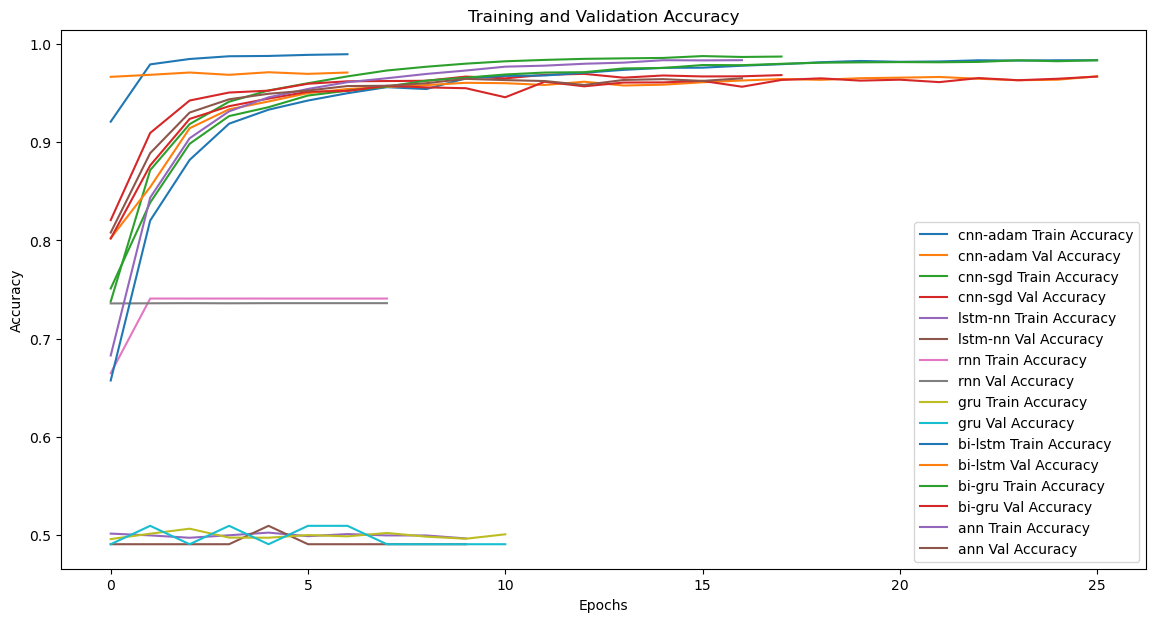

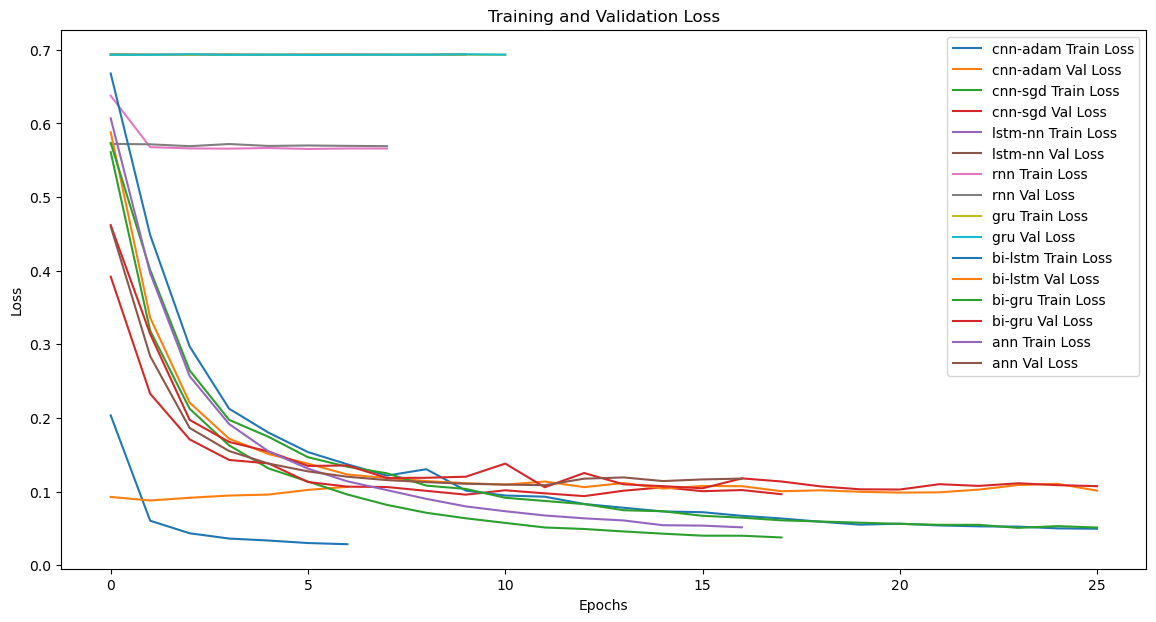

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, SimpleRNN, GRU, Bidirectional, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data (assuming url_df and html_df are provided as pandas DataFrames)
url_df = pd.read_csv('url.csv')
html_df = pd.read_csv('html.csv')

# Preprocess data
data_text = url_df['Data'].tolist()
y = url_df['Category']
max_len = 100
embedding_dim = 128

# Label encoding for target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Tokenizer
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(data_text)
data_sequences = tokenizer.texts_to_sequences(data_text)
data_padded = pad_sequences(data_sequences, maxlen=max_len, padding='post')

# Split data into train and test sets
data_padded_train, data_padded_test, y_train, y_test = train_test_split(data_padded, y_encoded, test_size=0.2, random_state=42)

# Function to build models
def build_model(model_type):
    model = Sequential()
    model.add(Embedding(len(tokenizer.word_index) + 1, embedding_dim, input_length=max_len))
    
    if model_type == 'cnn-adam':
        model.add(tf.keras.layers.Conv1D(64, 3, activation='relu'))
        model.add(tf.keras.layers.GlobalMaxPooling1D())
    elif model_type == 'cnn-sgd':
        model.add(tf.keras.layers.Conv1D(64, 3, activation='relu'))
        model.add(tf.keras.layers.GlobalMaxPooling1D())
    elif model_type == 'lstm-nn':
        model.add(LSTM(128))
    elif model_type == 'rnn':
        model.add(SimpleRNN(128))
    elif model_type == 'gru':
        model.add(GRU(128))
    elif model_type == 'bi-lstm':
        model.add(Bidirectional(LSTM(128)))
    elif model_type == 'bi-gru':
        model.add(Bidirectional(GRU(128)))
    elif model_type == 'ann':
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.5))
    
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(len(encoder.classes_), activation='softmax'))
    
    return model

# Function to compile models with appropriate optimizer
def compile_model(model, model_type):
    if model_type == 'cnn-adam':
        optimizer = Adam()
    else:
        optimizer = SGD(learning_rate=0.01, momentum=0.9)
        
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train and store histories for each model
models = ['cnn-adam', 'cnn-sgd', 'lstm-nn', 'rnn', 'gru', 'bi-lstm', 'bi-gru', 'ann']
histories = {}

for model_type in models:
    print(f'Training {model_type} model...')
    model = build_model(model_type)
    compile_model(model, model_type)
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(data_padded_train, y_train, epochs=30, batch_size=128, validation_split=0.2, callbacks=[early_stopping])
    histories[model_type] = history

# Plot training and validation accuracy for each model
plt.figure(figsize=(14, 7))
for model_type, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'{model_type} Train Accuracy')
    plt.plot(history.history['val_accuracy'], label=f'{model_type} Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss for each model
plt.figure(figsize=(14, 7))
for model_type, history in histories.items():
    plt.plot(history.history['loss'], label=f'{model_type} Train Loss')
    plt.plot(history.history['val_loss'], label=f'{model_type} Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Embedding, Flatten, Dense, BatchNormalization, Dropout, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Load data
url_df = pd.read_csv('url.csv')
html_df = pd.read_csv('html.csv')

# Feature Extraction
data_text = url_df['Data'].tolist()
html_text = html_df['Data'].tolist()
max_len = 100
embedding_dim = 128

y = url_df['Category']

# Label encoding for target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Separate preprocessing for data and html
data_tokenizer = Tokenizer(num_words=10000)
data_tokenizer.fit_on_texts(data_text)
data_sequences = data_tokenizer.texts_to_sequences(data_text)

html_tokenizer = Tokenizer(num_words=10000)
html_tokenizer.fit_on_texts(html_text)
html_sequences = html_tokenizer.texts_to_sequences(html_text)

data_padded = pad_sequences(data_sequences, maxlen=max_len, padding='post')
html_padded = pad_sequences(html_sequences, maxlen=max_len, padding='post')

# Split data into train and test sets
data_padded_train, data_padded_test, y_train, y_test = train_test_split(data_padded, y_encoded, test_size=0.2, random_state=42)
html_padded_train, html_padded_test, _, _ = train_test_split(html_padded, y_encoded, test_size=0.2, random_state=42)

# Learning rate scheduler function
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Define first model
def build_model_1():
    data_in = Input(shape=(max_len,))
    data_embedding = Embedding(len(data_tokenizer.word_index) + 1, embedding_dim)(data_in)
    data_bn = BatchNormalization()(data_embedding)
    data_conv1 = Conv1D(64, kernel_size=3, activation='relu')(data_bn)
    data_pool1 = MaxPooling1D(pool_size=2)(data_conv1)
    data_conv2 = Conv1D(128, kernel_size=3, activation='relu')(data_pool1)
    data_pool2 = GlobalMaxPooling1D()(data_conv2)
    data_flat = Flatten()(data_pool2)
    data_drop = Dropout(0.5)(data_flat)

    html_in = Input(shape=(max_len,))
    html_embedding = Embedding(len(html_tokenizer.word_index) + 1, embedding_dim)(html_in)
    html_bn = BatchNormalization()(html_embedding)
    html_conv1 = Conv1D(64, kernel_size=3, activation='relu')(html_bn)
    html_pool1 = MaxPooling1D(pool_size=2)(html_conv1)
    html_conv2 = Conv1D(128, kernel_size=3, activation='relu')(html_pool1)
    html_pool2 = GlobalMaxPooling1D()(html_conv2)
    html_flat = Flatten()(html_pool2)
    html_drop = Dropout(0.5)(html_flat)

    merged = tf.keras.layers.concatenate([data_drop, html_drop])

    dense1 = Dense(256, activation='relu')(merged)
    drop1 = Dropout(0.5)(dense1)
    dense2 = Dense(128, activation='relu')(drop1)
    drop2 = Dropout(0.5)(dense2)

    final_output = Dense(len(encoder.classes_), activation='softmax')(drop2)

    model = Model(inputs=[data_in, html_in], outputs=final_output)
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define second model
def build_model_2():
    data_in = Input(shape=(max_len,))
    data_embedding = Embedding(len(data_tokenizer.word_index) + 1, embedding_dim)(data_in)
    data_conv = Conv1D(32, kernel_size=3, activation='relu')(data_embedding)
    data_pool = MaxPooling1D(pool_size=2)(data_conv)
    data_flat = Flatten()(data_pool)

    html_in = Input(shape=(max_len,))
    html_embedding = Embedding(len(html_tokenizer.word_index) + 1, embedding_dim)(html_in)
    html_conv = Conv1D(32, kernel_size=3, activation='relu')(html_embedding)
    html_pool = MaxPooling1D(pool_size=2)(data_conv)
    html_flat = Flatten()(html_pool)

    merged = tf.keras.layers.concatenate([data_flat, html_flat])

    dense1 = Dense(128, activation='relu')(merged)
    dense2 = Dense(64, activation='relu')(dense1)

    final_output = Dense(len(encoder.classes_), activation='softmax')(dense2)

    model = Model(inputs=[data_in, html_in], outputs=final_output)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Train and evaluate model 1
model1 = build_model_1()
early_stopping1 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler1 = LearningRateScheduler(scheduler)
history1 = model1.fit([data_padded_train, html_padded_train], y_train, epochs=30, batch_size=128, validation_split=0.2, callbacks=[early_stopping1, lr_scheduler1])

# Train and evaluate model 2
model2 = build_model_2()
early_stopping2 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history2 = model2.fit([data_padded_train, html_padded_train], y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[early_stopping2])

# Evaluate both models on the entire dataset
train_start1 = time.time()
train_loss1, train_accuracy1 = model1.evaluate([data_padded, html_padded], y_encoded)
train_end1 = time.time()
train_time1 = train_end1 - train_start1

train_start2 = time.time()
train_loss2, train_accuracy2 = model2.evaluate([data_padded, html_padded], y_encoded)
train_end2 = time.time()
train_time2 = train_end2 - train_start2

print(f"Model 1 Training Time: {train_time1:.2f} seconds")
print(f"Model 1 Accuracy on Entire Data: {train_accuracy1:.4f}")

print(f"Model 2 Training Time: {train_time2:.2f} seconds")
print(f"Model 2 Accuracy on Entire Data: {train_accuracy2:.4f}")


Num GPUs Available:  0


Epoch 1/30
227/227 [==============================] - 19s 61ms/step - loss: 0.3424 - accuracy: 0.8403 - val_loss: 0.4680 - val_accuracy: 0.9019 - lr: 0.0100
Epoch 2/30
227/227 [==============================] - 11s 46ms/step - loss: 0.1280 - accuracy: 0.9520 - val_loss: 0.1656 - val_accuracy: 0.9624 - lr: 0.0100
Epoch 3/30
227/227 [==============================] - 12s 51ms/step - loss: 0.0810 - accuracy: 0.9707 - val_loss: 0.0632 - val_accuracy: 0.9793 - lr: 0.0100
Epoch 4/30
227/227 [==============================] - 13s 58ms/step - loss: 0.0572 - accuracy: 0.9791 - val_loss: 0.0490 - val_accuracy: 0.9826 - lr: 0.0100
Epoch 5/30
227/227 [==============================] - 13s 58ms/step - loss: 0.0448 - accuracy: 0.9847 - val_loss: 0.0849 - val_accuracy: 0.9671 - lr: 0.0100
Epoch 6/30
227/227 [==============================] - 14s 60ms/step - loss: 0.0323 - accuracy: 0.9895 - val_loss: 0.0610 - val_accuracy: 0.9802 - lr: 0.0100
Epoch 7/30
227/227 [==============================] - 16s 

Epoch 1/20
227/227 [==============================] - 9s 38ms/step - loss: 0.1814 - accuracy: 0.9257 - val_loss: 0.0885 - val_accuracy: 0.9683
Epoch 2/20
227/227 [==============================] - 9s 40ms/step - loss: 0.0550 - accuracy: 0.9804 - val_loss: 0.0902 - val_accuracy: 0.9696
Epoch 3/20
227/227 [==============================] - 9s 40ms/step - loss: 0.0394 - accuracy: 0.9861 - val_loss: 0.0918 - val_accuracy: 0.9716
Epoch 4/20
227/227 [==============================] - 9s 40ms/step - loss: 0.0339 - accuracy: 0.9883 - val_loss: 0.0971 - val_accuracy: 0.9697
Epoch 5/20
227/227 [==============================] - 9s 40ms/step - loss: 0.0308 - accuracy: 0.9890 - val_loss: 0.1003 - val_accuracy: 0.9702
Epoch 6/20
1418/1418 [==============================] - 3s 2ms/step - loss: 0.0651 - accuracy: 0.9763
Model 1 Training Time: 9.43 seconds
Model 1 Accuracy on Entire Data: 0.9955
Model 2 Training Time: 3.52 seconds
Model 2 Accuracy on Entire Data: 0.9763


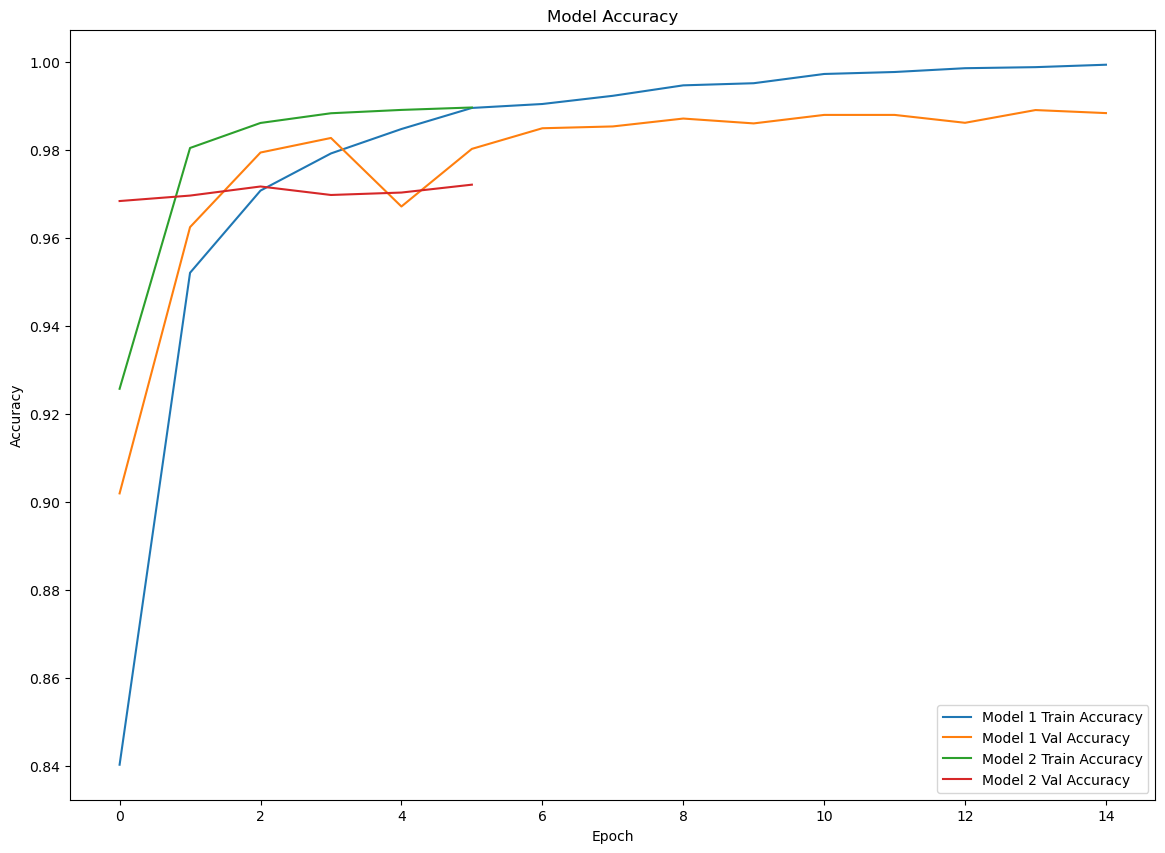

1418/1418 [==============================] - 3s 2ms/step


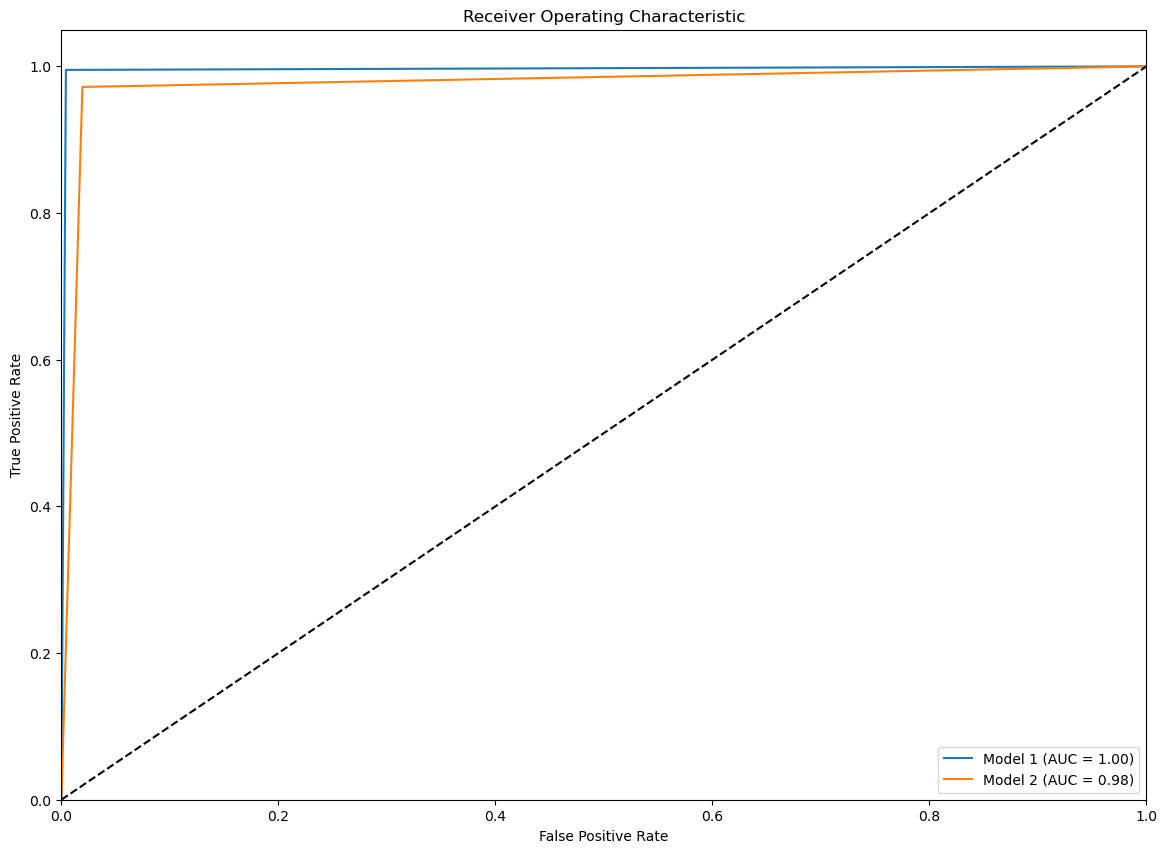

In [4]:
# Function to plot training and validation accuracy curves
def plot_training_history(histories, model_names):
    plt.figure(figsize=(14, 10))

    for history, model_name in zip(histories, model_names):
        plt.plot(history.history['accuracy'], label=f'{model_name} Train Accuracy')
        plt.plot(history.history['val_accuracy'], label=f'{model_name} Val Accuracy')

    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(models, model_names, data, labels):
    plt.figure(figsize=(14, 10))
    for model, model_name in zip(models, model_names):
        y_pred = model.predict(data)
        fpr, tpr, _ = roc_curve(labels, y_pred.argmax(axis=1))
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

# Plot training and validation accuracy curves
plot_training_history([history1, history2], ['Model 1', 'Model 2'])

# Plot ROC curves for both models
plot_roc_curve([model1, model2], ['Model 1', 'Model 2'], [data_padded, html_padded], y_encoded)


Num GPUs Available:  0


Epoch 1/30
227/227 [==============================] - 14s 60ms/step - loss: 0.3252 - accuracy: 0.8526 - val_loss: 0.4510 - val_accuracy: 0.9135 - lr: 0.0100
Epoch 2/30
227/227 [==============================] - 11s 47ms/step - loss: 0.1246 - accuracy: 0.9545 - val_loss: 0.1860 - val_accuracy: 0.9716 - lr: 0.0100
Epoch 3/30
227/227 [==============================] - 11s 47ms/step - loss: 0.0848 - accuracy: 0.9701 - val_loss: 0.0653 - val_accuracy: 0.9760 - lr: 0.0100
Epoch 4/30
227/227 [==============================] - 10s 43ms/step - loss: 0.0559 - accuracy: 0.9807 - val_loss: 0.1117 - val_accuracy: 0.9514 - lr: 0.0100
Epoch 5/30
227/227 [==============================] - 11s 47ms/step - loss: 0.0439 - accuracy: 0.9851 - val_loss: 0.0646 - val_accuracy: 0.9748 - lr: 0.0100
Epoch 6/30
227/227 [==============================] - 11s 48ms/step - loss: 0.0326 - accuracy: 0.9894 - val_loss: 0.0443 - val_accuracy: 0.9850 - lr: 0.0100
Epoch 7/30
227/227 [==============================] - 11s 

Epoch 1/30
227/227 [==============================] - 7s 30ms/step - loss: 0.1885 - accuracy: 0.9209 - val_loss: 0.0847 - val_accuracy: 0.9696 - lr: 0.0010
Epoch 2/30
227/227 [==============================] - 9s 40ms/step - loss: 0.0550 - accuracy: 0.9802 - val_loss: 0.0876 - val_accuracy: 0.9686 - lr: 0.0010
Epoch 3/30
227/227 [==============================] - 22s 98ms/step - loss: 0.0391 - accuracy: 0.9859 - val_loss: 0.0942 - val_accuracy: 0.9676 - lr: 0.0010
Epoch 4/30
1418/1418 [==============================] - 4s 3ms/step - loss: 0.0635 - accuracy: 0.9777
Adam Training Time: 59.66 seconds
Adam Test Loss: 0.0805
Adam Test Accuracy: 0.9710
Adam Overall Test Loss: 0.0635
Adam Overall Test Accuracy: 0.9777
284/284 [==============================] - 1s 2ms/step

Adam Evaluation Metrics:
Precision (Micro): 0.9710
Recall (Micro): 0.9710
F1-Score (Micro): 0.9710
False Positive Rate (FPR): 0.0290


Epoch 1/30
227/227 [==============================] - 20s 87ms/step - loss: 0.3082 - accuracy: 0.8607 - val_loss: 0.4338 - val_accuracy: 0.9021 - lr: 0.0100
Epoch 2/30
227/227 [==============================] - 19s 85ms/step - loss: 0.1359 - accuracy: 0.9489 - val_loss: 0.1624 - val_accuracy: 0.9488 - lr: 0.0100
Epoch 3/30
227/227 [==============================] - 21s 91ms/step - loss: 0.0798 - accuracy: 0.9736 - val_loss: 0.0771 - val_accuracy: 0.9711 - lr: 0.0100
Epoch 4/30
227/227 [==============================] - 18s 80ms/step - loss: 0.0524 - accuracy: 0.9821 - val_loss: 0.0597 - val_accuracy: 0.9798 - lr: 0.0100
Epoch 5/30
227/227 [==============================] - 14s 61ms/step - loss: 0.0404 - accuracy: 0.9871 - val_loss: 0.1701 - val_accuracy: 0.9595 - lr: 0.0100
Epoch 6/30
227/227 [==============================] - 14s 64ms/step - loss: 0.0303 - accuracy: 0.9905 - val_loss: 0.0861 - val_accuracy: 0.9749 - lr: 0.0100
Epoch 7/30
1418/1418 [==============================] - 6s

2024-05-26 13:13:41.377508: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-26 13:13:41.380349: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-26 13:13:41.381021: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-26 13:13:44.182818: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-26 13:13:44.183373: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-26 13:13:44.183773: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/30


2024-05-26 13:13:44.504507: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-26 13:13:44.505455: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-26 13:13:44.506152: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-26 13:13:45.196637: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis' with dtype int32 and shape [1]
	 [[{{node gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis}}]]
2024-05-26 13:13:45.218694: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-26 13:13:45.219406: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message):

2024-05-26 13:13:46.927283: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis' with dtype int32 and shape [1]
	 [[{{node gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis}}]]
2024-05-26 13:13:46.949982: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-26 13:13:46.950569: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message):

227/227 [==============================] - ETA: 0s - loss: 0.2611 - accuracy: 0.8888

2024-05-26 13:15:03.933411: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-26 13:15:03.935214: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-26 13:15:03.936265: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-26 13:15:04.702216: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-26 13:15:04.703618: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-26 13:15:04.704400: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - 88s 369ms/step - loss: 0.2611 - accuracy: 0.8888 - val_loss: 0.2997 - val_accuracy: 0.9325 - lr: 0.0100
Epoch 2/30
227/227 [==============================] - 70s 309ms/step - loss: 0.1281 - accuracy: 0.9519 - val_loss: 0.1108 - val_accuracy: 0.9621 - lr: 0.0100
Epoch 3/30
227/227 [==============================] - 65s 288ms/step - loss: 0.0878 - accuracy: 0.9690 - val_loss: 0.0987 - val_accuracy: 0.9594 - lr: 0.0100
Epoch 4/30
227/227 [==============================] - 66s 289ms/step - loss: 0.0645 - accuracy: 0.9776 - val_loss: 0.0561 - val_accuracy: 0.9798 - lr: 0.0100
Epoch 5/30
227/227 [==============================] - 64s 280ms/step - loss: 0.0486 - accuracy: 0.9832 - val_loss: 0.1486 - val_accuracy: 0.9566 - lr: 0.0100
Epoch 6/30
227/227 [==============================] - 66s 291ms/step - loss: 0.0392 - accuracy: 0.9864 - val_loss: 0.0553 - val_accuracy: 0.9820 - lr: 0.0100
Epoch 7/30
227/227 [==============================] - 65s 288ms

2024-05-26 13:24:43.241019: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-26 13:24:43.242497: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-26 13:24:43.243707: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-26 13:24:44.022888: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis' with dtype int32 and shape [1]
	 [[{{node gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis}}]]
2024-05-26 13:24:44.043421: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-26 13:24:44.044054: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message):

284/284 [==============================] - 9s 27ms/step

BI-GRU Evaluation Metrics:
Precision (Micro): 0.9810
Recall (Micro): 0.9810
F1-Score (Micro): 0.9810
False Positive Rate (FPR): 0.0190


2024-05-26 13:24:52.556851: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-26 13:24:52.558174: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-26 13:24:52.558954: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/30


2024-05-26 13:25:09.043105: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-26 13:25:09.043990: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-26 13:25:09.044792: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-26 13:25:09.532860: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-26 13:25:09.533634: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-26 13:25:09.534207: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-26 13:25:10.873677: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis' with dtype int32 and shape [1]
	 [[{{node gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis}}]]
2024-05-26 13:25:10.896579: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-26 13:25:10.897312: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message):

227/227 [==============================] - ETA: 0s - loss: 0.2928 - accuracy: 0.8740

2024-05-26 13:26:28.995219: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-26 13:26:28.996844: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-26 13:26:28.998014: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-26 13:26:29.700251: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_1_grad/concat/split_1/split_dim' with dtype int32
	 [[{{node gradients/split_1_grad/concat/split_1/split_dim}}]]
2024-05-26 13:26:29.770595: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis' with dtype int32 and shape [1]
	 [[{{node gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis}}]]
2024-05-26 13:26:29.796079: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message):

227/227 [==============================] - 91s 379ms/step - loss: 0.2928 - accuracy: 0.8740 - val_loss: 0.2931 - val_accuracy: 0.9040 - lr: 0.0100
Epoch 2/30
227/227 [==============================] - 80s 350ms/step - loss: 0.1275 - accuracy: 0.9522 - val_loss: 0.1246 - val_accuracy: 0.9530 - lr: 0.0100
Epoch 3/30
227/227 [==============================] - 71s 313ms/step - loss: 0.0815 - accuracy: 0.9710 - val_loss: 0.1410 - val_accuracy: 0.9397 - lr: 0.0100
Epoch 4/30
227/227 [==============================] - 72s 317ms/step - loss: 0.0639 - accuracy: 0.9777 - val_loss: 0.0517 - val_accuracy: 0.9803 - lr: 0.0100
Epoch 5/30
227/227 [==============================] - 69s 305ms/step - loss: 0.0446 - accuracy: 0.9844 - val_loss: 0.0536 - val_accuracy: 0.9810 - lr: 0.0100
Epoch 6/30
227/227 [==============================] - 72s 317ms/step - loss: 0.0339 - accuracy: 0.9886 - val_loss: 0.1466 - val_accuracy: 0.9595 - lr: 0.0100
Epoch 7/30
1418/1418 [==============================] - 52s 37m

2024-05-26 13:34:59.598685: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-26 13:34:59.600316: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-26 13:34:59.601256: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-26 13:35:00.429520: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-26 13:35:00.430381: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-26 13:35:00.431053: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

284/284 [==============================] - 13s 40ms/step

BI-LSTM Evaluation Metrics:
Precision (Micro): 0.9790
Recall (Micro): 0.9790
F1-Score (Micro): 0.9790
False Positive Rate (FPR): 0.0210


2024-05-26 13:35:12.882781: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-26 13:35:12.883650: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-26 13:35:12.884500: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/30


2024-05-26 13:35:15.635195: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-26 13:35:15.636247: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-26 13:35:15.637137: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - ETA: 0s - loss: 0.3818 - accuracy: 0.8443

2024-05-26 13:35:56.766032: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-26 13:35:56.767280: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-26 13:35:56.768317: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - 47s 191ms/step - loss: 0.3818 - accuracy: 0.8443 - val_loss: 0.4327 - val_accuracy: 0.8340 - lr: 0.0100
Epoch 2/30
227/227 [==============================] - 40s 173ms/step - loss: 0.3058 - accuracy: 0.8882 - val_loss: 0.3045 - val_accuracy: 0.8831 - lr: 0.0100
Epoch 3/30
227/227 [==============================] - 39s 171ms/step - loss: 0.2603 - accuracy: 0.9033 - val_loss: 0.2517 - val_accuracy: 0.9025 - lr: 0.0100
Epoch 4/30
227/227 [==============================] - 40s 175ms/step - loss: 0.2255 - accuracy: 0.9142 - val_loss: 0.2425 - val_accuracy: 0.9092 - lr: 0.0100
Epoch 5/30
227/227 [==============================] - 38s 169ms/step - loss: 0.2026 - accuracy: 0.9239 - val_loss: 0.2168 - val_accuracy: 0.9187 - lr: 0.0100
Epoch 6/30
227/227 [==============================] - 37s 162ms/step - loss: 0.1830 - accuracy: 0.9331 - val_loss: 0.2127 - val_accuracy: 0.9211 - lr: 0.0100
Epoch 7/30
227/227 [==============================] - 38s 167ms

2024-05-26 13:42:56.094365: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-26 13:42:56.097888: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-26 13:42:56.098975: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

284/284 [==============================] - 5s 16ms/step

GRU Evaluation Metrics:
Precision (Micro): 0.9289
Recall (Micro): 0.9289
F1-Score (Micro): 0.9289
False Positive Rate (FPR): 0.0711


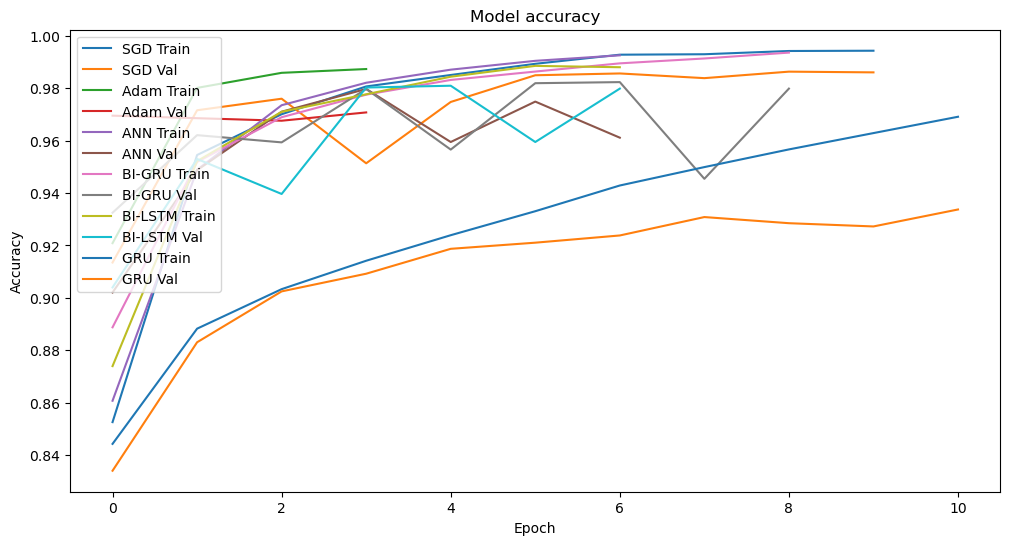

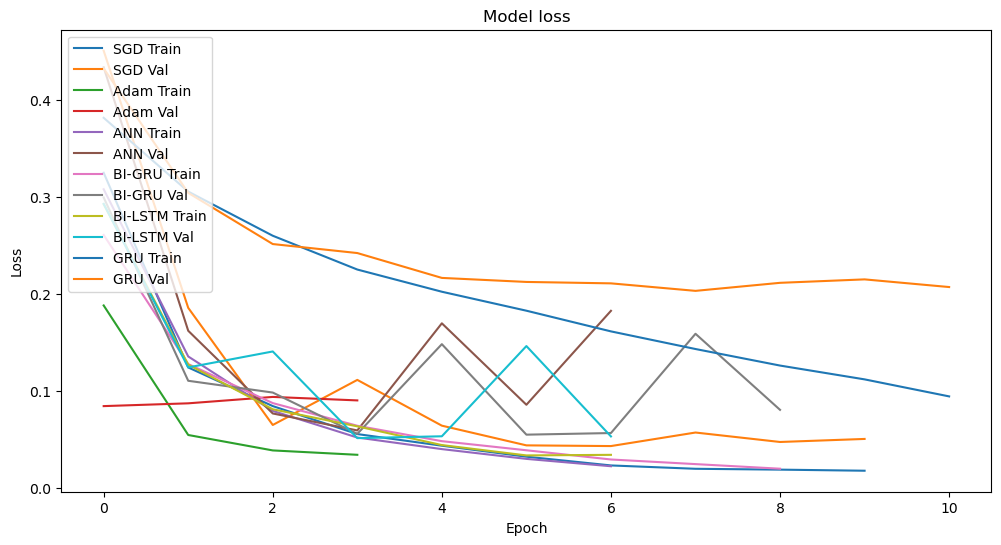

284/284 [==============================] - 4s 16ms/step


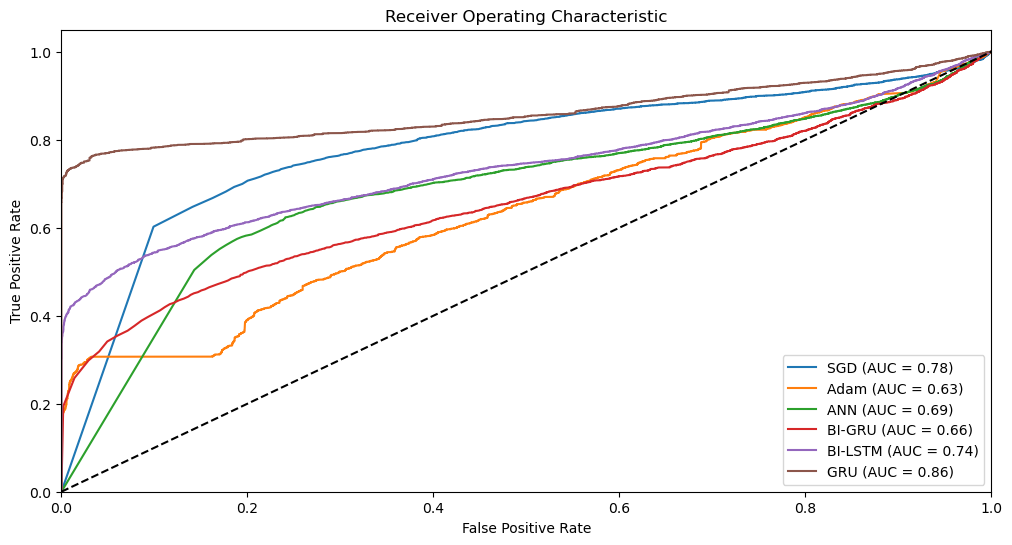

284/284 [==============================] - 5s 19ms/step


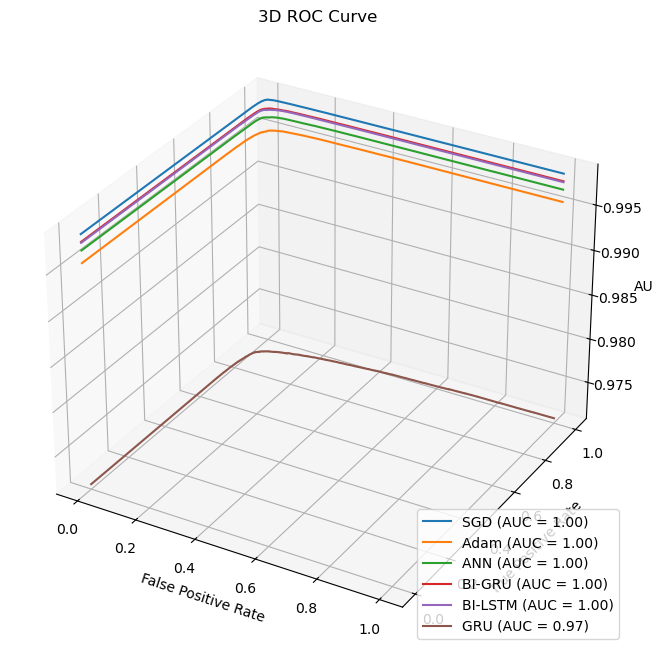

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Embedding, Flatten, Dense, BatchNormalization, Dropout, GlobalMaxPooling1D, Bidirectional, GRU, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Load data
url_df = pd.read_csv('url.csv')
html_df = pd.read_csv('html.csv')

# Feature Extraction
data_text = url_df['Data'].tolist()
html_text = html_df['Data'].tolist()
max_len = 100
embedding_dim = 128

y = url_df['Category']

# Label encoding for target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Separate preprocessing for data and html
data_tokenizer = Tokenizer(num_words=10000)
data_tokenizer.fit_on_texts(data_text)
data_sequences = data_tokenizer.texts_to_sequences(data_text)

html_tokenizer = Tokenizer(num_words=10000)
html_tokenizer.fit_on_texts(html_text)
html_sequences = html_tokenizer.texts_to_sequences(html_text)

data_padded = pad_sequences(data_sequences, maxlen=max_len, padding='post')
html_padded = pad_sequences(html_sequences, maxlen=max_len, padding='post')

# Split data into train and test sets
data_padded_train, data_padded_test, y_train, y_test = train_test_split(data_padded, y_encoded, test_size=0.2, random_state=42)
html_padded_train, html_padded_test, _, _ = train_test_split(html_padded, y_encoded, test_size=0.2, random_state=42)

# Learning rate scheduler function
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Define first model
def build_model_1():
    data_in = Input(shape=(max_len,))
    data_embedding = Embedding(len(data_tokenizer.word_index) + 1, embedding_dim)(data_in)
    data_bn = BatchNormalization()(data_embedding)
    data_conv1 = Conv1D(64, kernel_size=3, activation='relu')(data_bn)
    data_pool1 = MaxPooling1D(pool_size=2)(data_conv1)
    data_conv2 = Conv1D(128, kernel_size=3, activation='relu')(data_pool1)
    data_pool2 = GlobalMaxPooling1D()(data_conv2)
    data_flat = Flatten()(data_pool2)
    data_drop = Dropout(0.5)(data_flat)

    html_in = Input(shape=(max_len,))
    html_embedding = Embedding(len(html_tokenizer.word_index) + 1, embedding_dim)(html_in)
    html_bn = BatchNormalization()(html_embedding)
    html_conv1 = Conv1D(64, kernel_size=3, activation='relu')(html_bn)
    html_pool1 = MaxPooling1D(pool_size=2)(html_conv1)
    html_conv2 = Conv1D(128, kernel_size=3, activation='relu')(html_pool1)
    html_pool2 = GlobalMaxPooling1D()(html_conv2)
    html_flat = Flatten()(html_pool2)
    html_drop = Dropout(0.5)(html_flat)

    merged = tf.keras.layers.concatenate([data_drop, html_drop])

    dense1 = Dense(256, activation='relu')(merged)
    drop1 = Dropout(0.5)(dense1)
    dense2 = Dense(128, activation='relu')(drop1)
    drop2 = Dropout(0.5)(dense2)

    final_output = Dense(len(encoder.classes_), activation='softmax')(drop2)

    model = Model(inputs=[data_in, html_in], outputs=final_output)
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define second model
def build_model_2():
    data_in = Input(shape=(max_len,))
    data_embedding = Embedding(len(data_tokenizer.word_index) + 1, embedding_dim)(data_in)
    data_conv = Conv1D(32, kernel_size=3, activation='relu')(data_embedding)
    data_pool = MaxPooling1D(pool_size=2)(data_conv)
    data_flat = Flatten()(data_pool)

    html_in = Input(shape=(max_len,))
    html_embedding = Embedding(len(html_tokenizer.word_index) + 1, embedding_dim)(html_in)
    html_conv = Conv1D(32, kernel_size=3, activation='relu')(html_embedding)
    html_pool = MaxPooling1D(pool_size=2)(data_conv)
    html_flat = Flatten()(html_pool)

    merged = tf.keras.layers.concatenate([data_flat, html_flat])

    dense1 = Dense(128, activation='relu')(merged)
    dense2 = Dense(64, activation='relu')(dense1)

    final_output = Dense(len(encoder.classes_), activation='softmax')(dense2)

    model = Model(inputs=[data_in, html_in], outputs=final_output)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define third model
def build_model_3():
    data_in = Input(shape=(max_len,))
    data_embedding = Embedding(len(data_tokenizer.word_index) + 1, embedding_dim)(data_in)
    data_bn = BatchNormalization()(data_embedding)
    data_flat = Flatten()(data_bn)
    data_dense1 = Dense(128, activation='relu')(data_flat)
    data_drop1 = Dropout(0.5)(data_dense1)
    data_dense2 = Dense(64, activation='relu')(data_drop1)
    data_drop2 = Dropout(0.5)(data_dense2)

    html_in = Input(shape=(max_len,))
    html_embedding = Embedding(len(html_tokenizer.word_index) + 1, embedding_dim)(html_in)
    html_bn = BatchNormalization()(html_embedding)
    html_flat = Flatten()(html_bn)
    html_dense1 = Dense(128, activation='relu')(html_flat)
    html_drop1 = Dropout(0.5)(html_dense1)
    html_dense2 = Dense(64, activation='relu')(html_drop1)
    html_drop2 = Dropout(0.5)(html_dense2)

    merged = tf.keras.layers.concatenate([data_drop2, html_drop2])

    dense1 = Dense(256, activation='relu')(merged)
    drop1 = Dropout(0.5)(dense1)
    dense2 = Dense(128, activation='relu')(drop1)
    drop2 = Dropout(0.5)(dense2)

    final_output = Dense(len(encoder.classes_), activation='softmax')(drop2)

    model = Model(inputs=[data_in, html_in], outputs=final_output)
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define fourth model with Bidirectional GRU
def build_model_4():
    data_in = Input(shape=(max_len,))
    data_embedding = Embedding(len(data_tokenizer.word_index) + 1, embedding_dim)(data_in)
    data_bn = BatchNormalization()(data_embedding)
    data_gru = Bidirectional(GRU(64, return_sequences=True))(data_bn)
    data_gru_flat = Bidirectional(GRU(32))(data_gru)
    data_drop = Dropout(0.5)(data_gru_flat)

    html_in = Input(shape=(max_len,))
    html_embedding = Embedding(len(html_tokenizer.word_index) + 1, embedding_dim)(html_in)
    html_bn = BatchNormalization()(html_embedding)
    html_gru = Bidirectional(GRU(64, return_sequences=True))(html_bn)
    html_gru_flat = Bidirectional(GRU(32))(html_gru)
    html_drop = Dropout(0.5)(html_gru_flat)

    merged = tf.keras.layers.concatenate([data_drop, html_drop])

    dense1 = Dense(256, activation='relu')(merged)
    drop1 = Dropout(0.5)(dense1)
    dense2 = Dense(128, activation='relu')(drop1)
    drop2 = Dropout(0.5)(dense2)

    final_output = Dense(len(encoder.classes_), activation='softmax')(drop2)

    model = Model(inputs=[data_in, html_in], outputs=final_output)
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define fifth model with Bidirectional LSTM
def build_model_5():
    data_in = Input(shape=(max_len,))
    data_embedding = Embedding(len(data_tokenizer.word_index) + 1, embedding_dim)(data_in)
    data_bn = BatchNormalization()(data_embedding)
    data_lstm = Bidirectional(LSTM(64, return_sequences=True))(data_bn)
    data_lstm_flat = Bidirectional(LSTM(32))(data_lstm)
    data_drop = Dropout(0.5)(data_lstm_flat)

    html_in = Input(shape=(max_len,))
    html_embedding = Embedding(len(html_tokenizer.word_index) + 1, embedding_dim)(html_in)
    html_bn = BatchNormalization()(html_embedding)
    html_lstm = Bidirectional(LSTM(64, return_sequences=True))(html_bn)
    html_lstm_flat = Bidirectional(LSTM(32))(html_lstm)
    html_drop = Dropout(0.5)(html_lstm_flat)

    merged = tf.keras.layers.concatenate([data_drop, html_drop])

    dense1 = Dense(256, activation='relu')(merged)
    drop1 = Dropout(0.5)(dense1)
    dense2 = Dense(128, activation='relu')(drop1)
    drop2 = Dropout(0.5)(dense2)

    final_output = Dense(len(encoder.classes_), activation='softmax')(drop2)

    model = Model(inputs=[data_in, html_in], outputs=final_output)
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define sixth model with GRU
def build_model_6():
    data_in = Input(shape=(max_len,))
    data_embedding = Embedding(len(data_tokenizer.word_index) + 1, embedding_dim)(data_in)
    data_bn = BatchNormalization()(data_embedding)
    data_gru = GRU(64, return_sequences=True)(data_bn)
    data_gru_flat = GRU(32)(data_gru)
    data_drop = Dropout(0.5)(data_gru_flat)

    html_in = Input(shape=(max_len,))
    html_embedding = Embedding(len(html_tokenizer.word_index) + 1, embedding_dim)(html_in)
    html_bn = BatchNormalization()(html_embedding)
    html_gru = GRU(64, return_sequences=True)(html_bn)
    html_gru_flat = GRU(32)(html_gru)
    html_drop = Dropout(0.5)(html_gru_flat)

    merged = tf.keras.layers.concatenate([data_drop, html_drop])

    dense1 = Dense(256, activation='relu')(merged)
    drop1 = Dropout(0.5)(dense1)
    dense2 = Dense(128, activation='relu')(drop1)
    drop2 = Dropout(0.5)(dense2)

    final_output = Dense(len(encoder.classes_), activation='softmax')(drop2)

    model = Model(inputs=[data_in, html_in], outputs=final_output)
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Function to train and evaluate models
def train_and_evaluate(model, model_name):
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    lr_scheduler = LearningRateScheduler(scheduler)

    with tf.device('/GPU:0'):
        start_time = time.time()
        history = model.fit([data_padded_train, html_padded_train], y_train, epochs=30, batch_size=128, validation_split=0.2, callbacks=[early_stopping, lr_scheduler])
        end_time = time.time()

    training_time = end_time - start_time
    test_start = time.time()
    test_loss, test_accuracy = model.evaluate([data_padded_test, html_padded_test], y_test)
    test_end = time.time()
    testing_time = test_end - test_start

    overall_test_loss, overall_test_accuracy = model.evaluate([data_padded, html_padded], y_encoded)

    print(f"{model_name} Training Time: {training_time:.2f} seconds")
    print(f"{model_name} Test Loss: {test_loss:.4f}")
    print(f"{model_name} Test Accuracy: {test_accuracy:.4f}")
    print(f"{model_name} Overall Test Loss: {overall_test_loss:.4f}")
    print(f"{model_name} Overall Test Accuracy: {overall_test_accuracy:.4f}")

    y_pred = model.predict([data_padded_test, html_padded_test])
    y_pred_classes = np.argmax(y_pred, axis=1)

    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='micro')
    fpr = 1 - recall

    print(f"\n{model_name} Evaluation Metrics:")
    print(f"Precision (Micro): {precision:.4f}")
    print(f"Recall (Micro): {recall:.4f}")
    print(f"F1-Score (Micro): {f1_score:.4f}")
    print(f"False Positive Rate (FPR): {fpr:.4f}")

    return history

# Build and train models
model1 = build_model_1()
history1 = train_and_evaluate(model1, "SGD")

model2 = build_model_2()
history2 = train_and_evaluate(model2, "Adam")

model3 = build_model_3()
history3 = train_and_evaluate(model3, "ANN")

model4 = build_model_4()
history4 = train_and_evaluate(model4, "BI-GRU")

model5 = build_model_5()
history5 = train_and_evaluate(model5, "BI-LSTM")

model6 = build_model_6()
history6 = train_and_evaluate(model6, "GRU")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['SGD Train', 'SGD Val', 'Adam Train', 'Adam Val', 'ANN Train', 'ANN Val', 'BI-GRU Train', 'BI-GRU Val', 'BI-LSTM Train', 'BI-LSTM Val', 'GRU Train', 'GRU Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['SGD Train', 'SGD Val', 'Adam Train', 'Adam Val', 'ANN Train', 'ANN Val', 'BI-GRU Train', 'BI-GRU Val', 'BI-LSTM Train', 'BI-LSTM Val', 'GRU Train', 'GRU Val'], loc='upper left')
plt.show()

# ROC-AUC curve
def plot_roc_curve(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_pred_proba = np.max(y_pred, axis=1)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(12, 6))
plot_roc_curve(model1, [data_padded_test, html_padded_test], y_test, 'SGD')
plot_roc_curve(model2, [data_padded_test, html_padded_test], y_test, 'Adam')
plot_roc_curve(model3, [data_padded_test, html_padded_test], y_test, 'ANN')
plot_roc_curve(model4, [data_padded_test, html_padded_test], y_test, 'BI-GRU')
plot_roc_curve(model5, [data_padded_test, html_padded_test], y_test, 'BI-LSTM')
plot_roc_curve(model6, [data_padded_test, html_padded_test], y_test, 'GRU')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
from mpl_toolkits.mplot3d import Axes3D

# Evaluate each model and store evaluation results
model_evaluations = []

def evaluate_model(model, model_name):
    y_pred = model.predict([data_padded_test, html_padded_test])
    y_pred_proba = y_pred[:, 1] if y_pred.shape[1] > 1 else y_pred  # Get probability predictions for positive class
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    model_evaluations.append({"model_name": model_name, "fpr": fpr, "tpr": tpr, "roc_auc": roc_auc})

# Evaluate models
evaluate_model(model1, "SGD")
evaluate_model(model2, "Adam")
evaluate_model(model3, "ANN")
evaluate_model(model4, "BI-GRU")
evaluate_model(model5, "BI-LSTM")
evaluate_model(model6, "GRU")

# Plot each model's ROC curve in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for evaluation in model_evaluations:
    ax.plot(evaluation["fpr"], evaluation["tpr"], evaluation["roc_auc"], label=f'{evaluation["model_name"]} (AUC = {evaluation["roc_auc"]:.2f})')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_zlabel('AUC')
ax.set_title('3D ROC Curve')
ax.legend(loc='lower right')

plt.show()

Epoch 1/30
227/227 [==============================] - 19s 82ms/step - loss: 0.0209 - accuracy: 0.9932 - val_loss: 0.0515 - val_accuracy: 0.9847 - lr: 0.0100
Epoch 2/30
227/227 [==============================] - 10s 42ms/step - loss: 0.0135 - accuracy: 0.9959 - val_loss: 0.0580 - val_accuracy: 0.9817 - lr: 0.0100
Epoch 3/30
227/227 [==============================] - 10s 43ms/step - loss: 0.0107 - accuracy: 0.9965 - val_loss: 0.0587 - val_accuracy: 0.9860 - lr: 0.0100
Epoch 4/30
227/227 [==============================] - 11s 50ms/step - loss: 0.0094 - accuracy: 0.9971 - val_loss: 0.0494 - val_accuracy: 0.9840 - lr: 0.0100
Epoch 5/30
227/227 [==============================] - 11s 49ms/step - loss: 0.0071 - accuracy: 0.9980 - val_loss: 0.0472 - val_accuracy: 0.9886 - lr: 0.0100
Epoch 6/30
227/227 [==============================] - 10s 42ms/step - loss: 0.0093 - accuracy: 0.9971 - val_loss: 0.0474 - val_accuracy: 0.9866 - lr: 0.0100
Epoch 7/30
227/227 [==============================] - 10s 

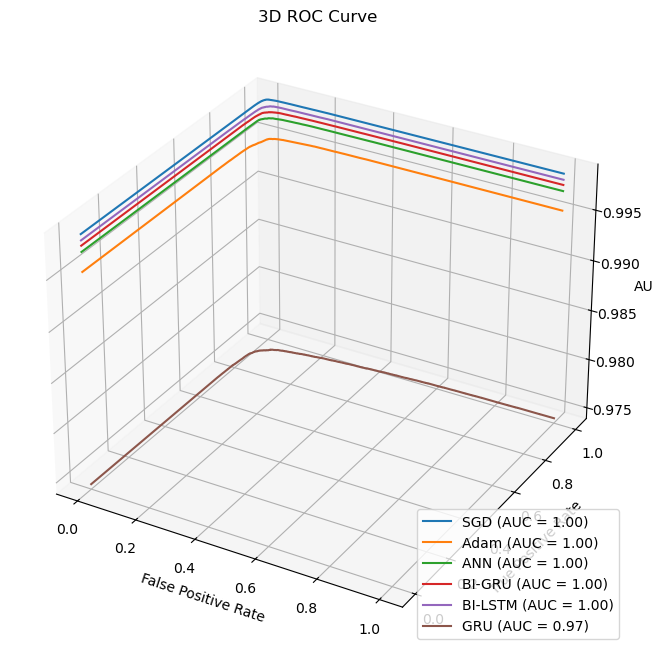

In [13]:
from sklearn.metrics import roc_curve, auc
from mpl_toolkits.mplot3d import Axes3D

# Function to train and evaluate models
def train_and_evaluate(model, model_name):
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    lr_scheduler = LearningRateScheduler(scheduler)

    with tf.device('/GPU:0'):
        start_time = time.time()
        history = model.fit([data_padded_train, html_padded_train], y_train, epochs=30, batch_size=128, validation_split=0.2, callbacks=[early_stopping, lr_scheduler])
        end_time = time.time()

    training_time = end_time - start_time
    test_start = time.time()
    y_pred_proba = model.predict([data_padded_test, html_padded_test])  # Predict probabilities
    test_end = time.time()
    testing_time = test_end - test_start

    overall_test_loss, overall_test_accuracy = model.evaluate([data_padded, html_padded], y_encoded)

    print(f"{model_name} Training Time: {training_time:.2f} seconds")
    print(f"{model_name} Overall Test Loss: {overall_test_loss:.4f}")
    print(f"{model_name} Overall Test Accuracy: {overall_test_accuracy:.4f}")

    return y_pred_proba

# Train and evaluate models
y_pred_proba_model1 = train_and_evaluate(model1, "SGD")
y_pred_proba_model2 = train_and_evaluate(model2, "Adam")
y_pred_proba_model3 = train_and_evaluate(model3, "ANN")
y_pred_proba_model4 = train_and_evaluate(model4, "BI-GRU")
y_pred_proba_model5 = train_and_evaluate(model5, "BI-LSTM")
y_pred_proba_model6 = train_and_evaluate(model6, "GRU")

model_names = ["SGD", "Adam", "ANN", "BI-GRU", "BI-LSTM", "GRU"]
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=len(encoder.classes_))
y_pred_proba_models = [y_pred_proba_model1, y_pred_proba_model2, y_pred_proba_model3, y_pred_proba_model4, y_pred_proba_model5, y_pred_proba_model6]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, model_name in enumerate(model_names):
    y_pred_proba = y_pred_proba_models[i]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for j in range(len(encoder.classes_)):
        fpr[j], tpr[j], _ = roc_curve(y_test_one_hot[:, j], y_pred_proba[:, j])
        roc_auc[j] = auc(fpr[j], tpr[j])
    ax.plot(fpr[1], tpr[1], roc_auc[1], label=f'{model_name} (AUC = {roc_auc[1]:.2f})')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_zlabel('AUC')
ax.set_title('3D ROC Curve')
ax.legend(loc='lower right')

plt.show()

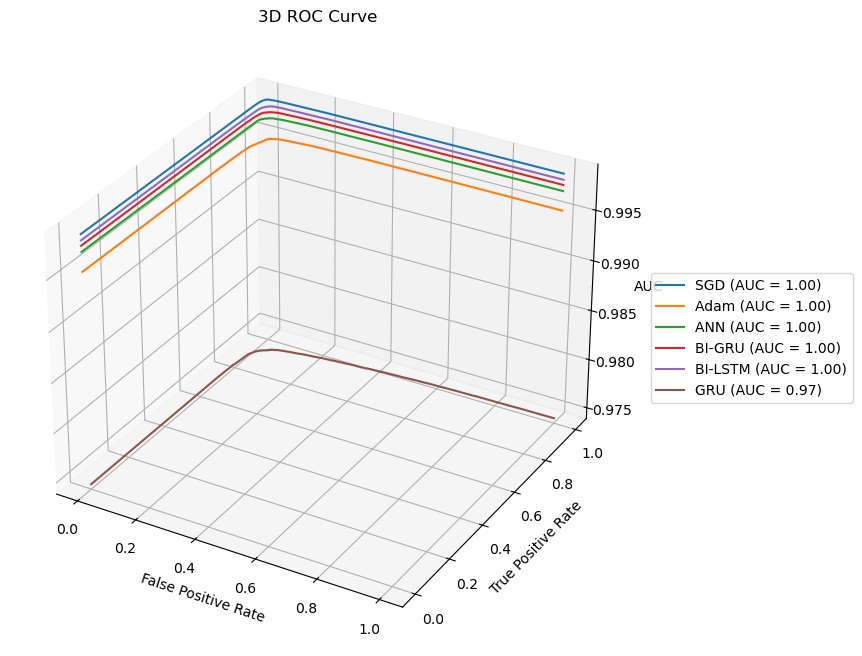

In [19]:
model_names = ["SGD", "Adam", "ANN", "BI-GRU", "BI-LSTM", "GRU"]
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=len(encoder.classes_))
y_pred_proba_models = [y_pred_proba_model1, y_pred_proba_model2, y_pred_proba_model3, y_pred_proba_model4, y_pred_proba_model5, y_pred_proba_model6]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, model_name in enumerate(model_names):
    y_pred_proba = y_pred_proba_models[i]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for j in range(len(encoder.classes_)):
        fpr[j], tpr[j], _ = roc_curve(y_test_one_hot[:, j], y_pred_proba[:, j])
        roc_auc[j] = auc(fpr[j], tpr[j])
    ax.plot(fpr[1], tpr[1], roc_auc[1], label=f'{model_name} (AUC = {roc_auc[1]:.2f})')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_zlabel('AUC')
ax.set_title('3D ROC Curve')
ax.legend(loc='center left', bbox_to_anchor=(1.04, 0.5), borderaxespad=0)

plt.show()

284/284 [==============================] - 3s 10ms/step


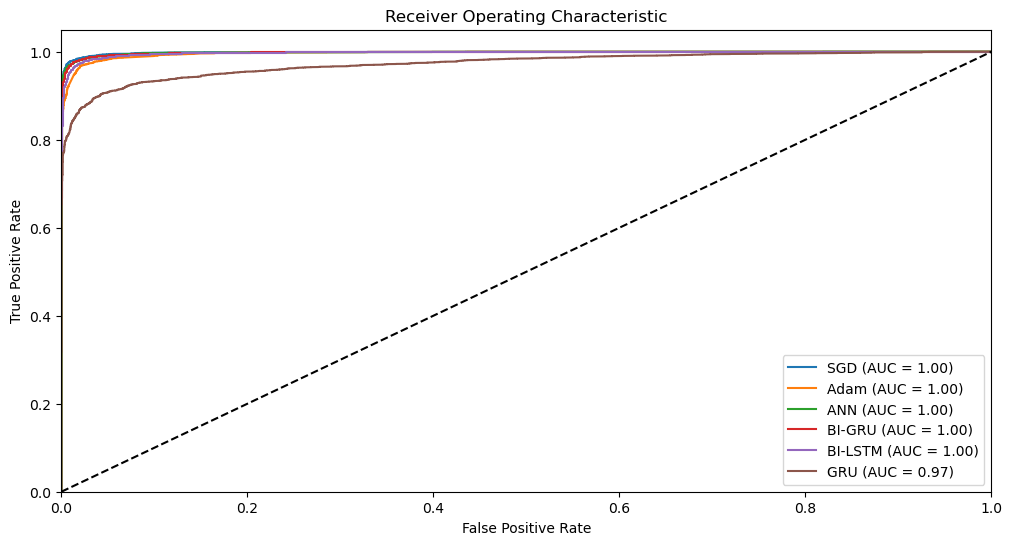

In [8]:
# Evaluate each model and store evaluation results
from mpl_toolkits.mplot3d import Axes3D
# Evaluate each model and store evaluation results
model_evaluations = []

def evaluate_model(model, model_name):
    y_pred = model.predict([data_padded_test, html_padded_test])
    y_pred_proba = y_pred[:, 1] if y_pred.shape[1] > 1 else y_pred  # Get probability predictions for positive class
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    model_evaluations.append({"model_name": model_name, "fpr": fpr, "tpr": tpr, "roc_auc": roc_auc})

# Evaluate models
evaluate_model(model1, "SGD")
evaluate_model(model2, "Adam")
evaluate_model(model3, "ANN")
evaluate_model(model4, "BI-GRU")
evaluate_model(model5, "BI-LSTM")
evaluate_model(model6, "GRU")

# Plot each model's ROC curve
plt.figure(figsize=(12, 6))
for evaluation in model_evaluations:
    plt.plot(evaluation["fpr"], evaluation["tpr"], label=f'{evaluation["model_name"]} (AUC = {evaluation["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


284/284 [==============================] - 3s 10ms/step


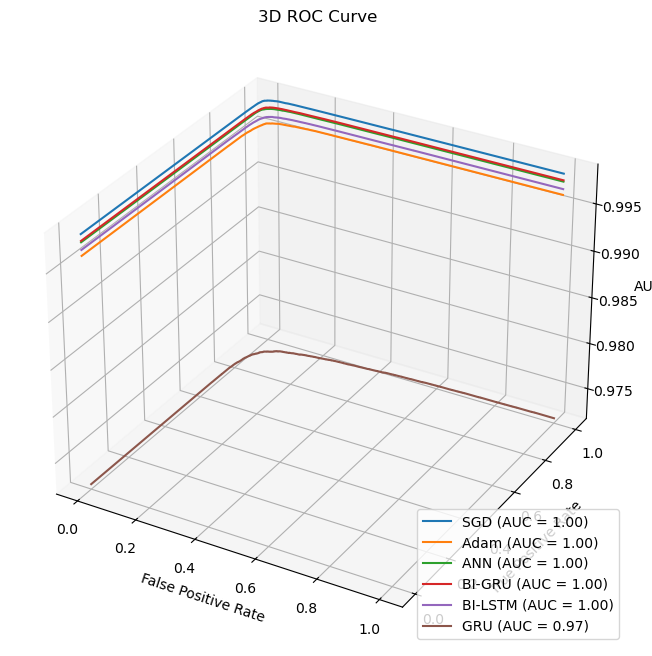

In [9]:
from mpl_toolkits.mplot3d import Axes3D

# Evaluate each model and store evaluation results
model_evaluations = []

def evaluate_model(model, model_name):
    y_pred = model.predict([data_padded_test, html_padded_test])
    y_pred_proba = y_pred[:, 1] if y_pred.shape[1] > 1 else y_pred  # Get probability predictions for positive class
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    model_evaluations.append({"model_name": model_name, "fpr": fpr, "tpr": tpr, "roc_auc": roc_auc})

# Evaluate models
evaluate_model(model1, "SGD")
evaluate_model(model2, "Adam")
evaluate_model(model3, "ANN")
evaluate_model(model4, "BI-GRU")
evaluate_model(model5, "BI-LSTM")
evaluate_model(model6, "GRU")

# Plot each model's ROC curve in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for evaluation in model_evaluations:
    ax.plot(evaluation["fpr"], evaluation["tpr"], evaluation["roc_auc"], label=f'{evaluation["model_name"]} (AUC = {evaluation["roc_auc"]:.2f})')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_zlabel('AUC')
ax.set_title('3D ROC Curve')
ax.legend(loc='lower right')

plt.show()


Num GPUs Available:  0


2024-05-27 00:17:24.844942: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-27 00:17:24.846753: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-27 00:17:24.847123: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-27 00:17:27.557689: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis' with dtype int32 and shape [1]
	 [[{{node gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis}}]]
2024-05-27 00:17:27.568888: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-27 00:17:27.569336: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message):

2024-05-27 00:17:31.695546: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-27 00:17:31.696129: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-27 00:17:31.696457: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Training SGD model...
Epoch 1/50


2024-05-27 00:17:39.684302: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


908/908 [==============================] - 32s 35ms/step - loss: 0.3926 - accuracy: 0.8161 - val_loss: 0.1565 - val_accuracy: 0.9406 - lr: 0.0010
Epoch 2/50
908/908 [==============================] - 14s 15ms/step - loss: 0.1692 - accuracy: 0.9342 - val_loss: 0.0917 - val_accuracy: 0.9664 - lr: 0.0011
Epoch 3/50
908/908 [==============================] - 15s 17ms/step - loss: 0.1131 - accuracy: 0.9577 - val_loss: 0.0693 - val_accuracy: 0.9745 - lr: 0.0013
Epoch 4/50
908/908 [==============================] - 34s 38ms/step - loss: 0.0835 - accuracy: 0.9702 - val_loss: 0.0572 - val_accuracy: 0.9784 - lr: 0.0014
Epoch 5/50
908/908 [==============================] - 36s 40ms/step - loss: 0.0681 - accuracy: 0.9765 - val_loss: 0.0511 - val_accuracy: 0.9813 - lr: 0.0016
Epoch 6/50
908/908 [==============================] - 32s 35ms/step - loss: 0.0523 - accuracy: 0.9822 - val_loss: 0.0450 - val_accuracy: 0.9842 - lr: 0.0018
Epoch 7/50
908/908 [==============================] - 27s 29ms/step -

2024-05-27 00:34:17.548377: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-27 00:34:17.551636: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-27 00:34:17.552603: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-27 00:34:18.303705: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis' with dtype int32 and shape [1]
	 [[{{node gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis}}]]
2024-05-27 00:34:18.326951: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-27 00:34:18.327587: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message):

2024-05-27 00:34:20.079126: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-27 00:34:20.079876: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-27 00:34:20.080487: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

908/908 [==============================] - ETA: 0s - loss: 0.3243 - accuracy: 0.8577

2024-05-27 00:36:32.890895: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-27 00:36:32.892445: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-27 00:36:32.894051: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-27 00:36:33.650717: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-27 00:36:33.651714: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-27 00:36:33.652512: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

908/908 [==============================] - 152s 161ms/step - loss: 0.3243 - accuracy: 0.8577 - val_loss: 0.1655 - val_accuracy: 0.9348 - lr: 0.0010
Epoch 2/50
908/908 [==============================] - 136s 149ms/step - loss: 0.1745 - accuracy: 0.9330 - val_loss: 0.1128 - val_accuracy: 0.9558 - lr: 0.0011
Epoch 3/50
908/908 [==============================] - 126s 139ms/step - loss: 0.1200 - accuracy: 0.9555 - val_loss: 0.0772 - val_accuracy: 0.9704 - lr: 0.0013
Epoch 4/50
908/908 [==============================] - 125s 137ms/step - loss: 0.0946 - accuracy: 0.9653 - val_loss: 0.0783 - val_accuracy: 0.9675 - lr: 0.0014
Epoch 5/50
908/908 [==============================] - 127s 140ms/step - loss: 0.0728 - accuracy: 0.9740 - val_loss: 0.0564 - val_accuracy: 0.9795 - lr: 0.0016
Epoch 6/50
908/908 [==============================] - 126s 138ms/step - loss: 0.0621 - accuracy: 0.9779 - val_loss: 0.2921 - val_accuracy: 0.9236 - lr: 0.0018
Epoch 7/50
908/908 [==============================] - 134

2024-05-27 01:16:31.792609: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-27 01:16:31.793630: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-27 01:16:31.794215: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-27 01:16:32.485382: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-27 01:16:32.486975: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-27 01:16:32.487587: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-27 01:16:34.112410: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-27 01:16:34.113082: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-27 01:16:34.113694: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

908/908 [==============================] - ETA: 0s - loss: 0.3624 - accuracy: 0.8417

2024-05-27 01:19:09.905334: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-27 01:19:09.908547: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-27 01:19:09.910872: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-27 01:19:10.823345: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-27 01:19:10.824472: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-27 01:19:10.825444: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

908/908 [==============================] - 188s 192ms/step - loss: 0.3624 - accuracy: 0.8417 - val_loss: 0.1452 - val_accuracy: 0.9413 - lr: 0.0010
Epoch 2/50
908/908 [==============================] - 155s 170ms/step - loss: 0.1570 - accuracy: 0.9432 - val_loss: 0.2027 - val_accuracy: 0.9320 - lr: 0.0011
Epoch 3/50
908/908 [==============================] - 143s 157ms/step - loss: 0.1064 - accuracy: 0.9625 - val_loss: 0.0782 - val_accuracy: 0.9707 - lr: 0.0013
Epoch 4/50
908/908 [==============================] - 116s 128ms/step - loss: 0.0779 - accuracy: 0.9727 - val_loss: 0.0794 - val_accuracy: 0.9705 - lr: 0.0014
Epoch 5/50
908/908 [==============================] - 148s 163ms/step - loss: 0.0660 - accuracy: 0.9774 - val_loss: 0.0574 - val_accuracy: 0.9807 - lr: 0.0016
Epoch 6/50
908/908 [==============================] - 155s 170ms/step - loss: 0.0509 - accuracy: 0.9832 - val_loss: 0.2505 - val_accuracy: 0.9328 - lr: 0.0018
Epoch 7/50
908/908 [==============================] - 159

2024-05-27 02:10:07.305473: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-27 02:10:07.307337: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-27 02:10:07.308525: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

908/908 [==============================] - ETA: 0s - loss: 0.4366 - accuracy: 0.8105

2024-05-27 02:12:15.254828: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-27 02:12:15.257223: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-27 02:12:15.265890: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

908/908 [==============================] - 145s 145ms/step - loss: 0.4366 - accuracy: 0.8105 - val_loss: 0.3398 - val_accuracy: 0.8610 - lr: 0.0010
Epoch 2/50
908/908 [==============================] - 126s 138ms/step - loss: 0.3374 - accuracy: 0.8725 - val_loss: 0.3005 - val_accuracy: 0.8858 - lr: 0.0011
Epoch 3/50
908/908 [==============================] - 119s 132ms/step - loss: 0.3078 - accuracy: 0.8890 - val_loss: 0.2868 - val_accuracy: 0.8920 - lr: 0.0013
Epoch 4/50
908/908 [==============================] - 121s 133ms/step - loss: 0.2753 - accuracy: 0.9007 - val_loss: 0.2616 - val_accuracy: 0.9019 - lr: 0.0014
Epoch 5/50
908/908 [==============================] - 120s 132ms/step - loss: 0.2436 - accuracy: 0.9117 - val_loss: 0.2399 - val_accuracy: 0.9088 - lr: 0.0016
Epoch 6/50
908/908 [==============================] - 120s 133ms/step - loss: 0.2236 - accuracy: 0.9190 - val_loss: 0.2300 - val_accuracy: 0.9083 - lr: 0.0018
Epoch 7/50
908/908 [==============================] - 122

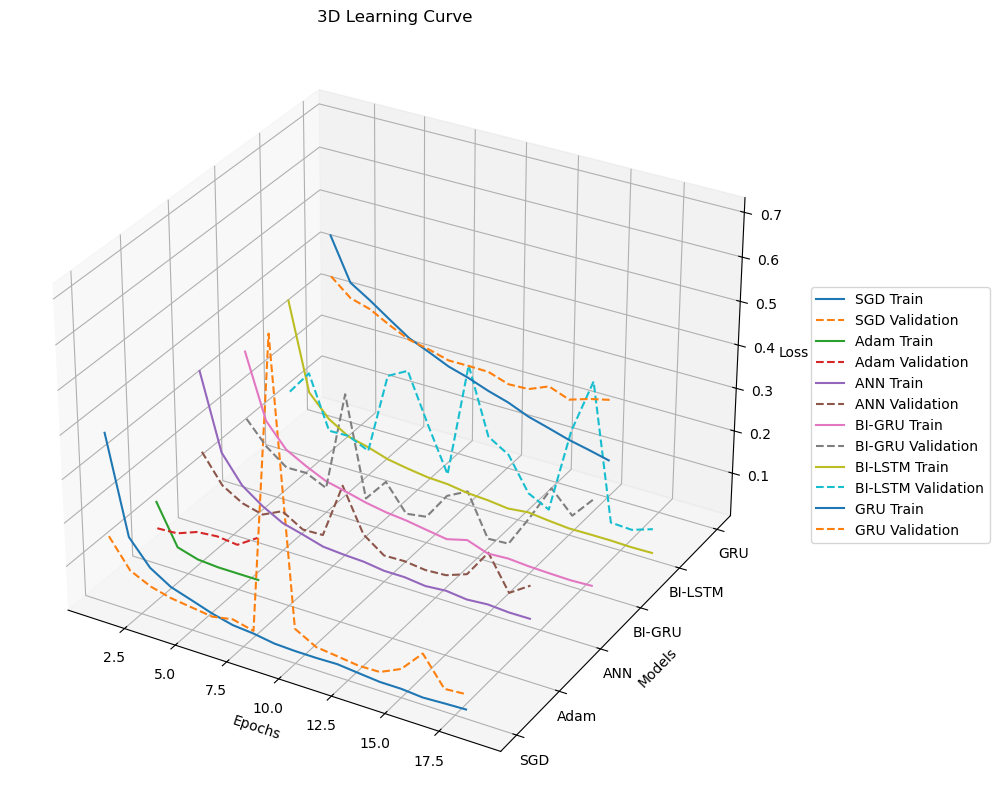

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Embedding, Flatten, Dense, BatchNormalization, Dropout, GlobalMaxPooling1D, Bidirectional, GRU, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Load data
url_df = pd.read_csv('url.csv')
html_df = pd.read_csv('html.csv')

# Feature Extraction
data_text = url_df['Data'].tolist()
html_text = html_df['Data'].tolist()
max_len = 100
embedding_dim = 128

y = url_df['Category']

# Label encoding for target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Separate preprocessing for data and html
data_tokenizer = Tokenizer(num_words=10000)
data_tokenizer.fit_on_texts(data_text)
data_sequences = data_tokenizer.texts_to_sequences(data_text)

html_tokenizer = Tokenizer(num_words=10000)
html_tokenizer.fit_on_texts(html_text)
html_sequences = html_tokenizer.texts_to_sequences(html_text)

data_padded = pad_sequences(data_sequences, maxlen=max_len, padding='post')
html_padded = pad_sequences(html_sequences, maxlen=max_len, padding='post')

# Split data into train and test sets
data_padded_train, data_padded_test, y_train, y_test = train_test_split(data_padded, y_encoded, test_size=0.2, random_state=42)
html_padded_train, html_padded_test, _, _ = train_test_split(html_padded, y_encoded, test_size=0.2, random_state=42)

# Learning rate scheduler function
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Define first model
def build_model_1():
    data_in = Input(shape=(max_len,))
    data_embedding = Embedding(len(data_tokenizer.word_index) + 1, embedding_dim)(data_in)
    data_bn = BatchNormalization()(data_embedding)
    data_conv1 = Conv1D(64, kernel_size=3, activation='relu')(data_bn)
    data_pool1 = MaxPooling1D(pool_size=2)(data_conv1)
    data_conv2 = Conv1D(128, kernel_size=3, activation='relu')(data_pool1)
    data_pool2 = GlobalMaxPooling1D()(data_conv2)
    data_flat = Flatten()(data_pool2)
    data_drop = Dropout(0.5)(data_flat)

    html_in = Input(shape=(max_len,))
    html_embedding = Embedding(len(html_tokenizer.word_index) + 1, embedding_dim)(html_in)
    html_bn = BatchNormalization()(html_embedding)
    html_conv1 = Conv1D(64, kernel_size=3, activation='relu')(html_bn)
    html_pool1 = MaxPooling1D(pool_size=2)(html_conv1)
    html_conv2 = Conv1D(128, kernel_size=3, activation='relu')(html_pool1)
    html_pool2 = GlobalMaxPooling1D()(html_conv2)
    html_flat = Flatten()(html_pool2)
    html_drop = Dropout(0.5)(html_flat)

    merged = tf.keras.layers.concatenate([data_drop, html_drop])

    dense1 = Dense(256, activation='relu')(merged)
    drop1 = Dropout(0.5)(dense1)
    dense2 = Dense(128, activation='relu')(drop1)
    drop2 = Dropout(0.5)(dense2)

    final_output = Dense(len(encoder.classes_), activation='softmax')(drop2)

    model = Model(inputs=[data_in, html_in], outputs=final_output)
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define second model
def build_model_2():
    data_in = Input(shape=(max_len,))
    data_embedding = Embedding(len(data_tokenizer.word_index) + 1, embedding_dim)(data_in)
    data_conv = Conv1D(32, kernel_size=3, activation='relu')(data_embedding)
    data_pool = MaxPooling1D(pool_size=2)(data_conv)
    data_flat = Flatten()(data_pool)

    html_in = Input(shape=(max_len,))
    html_embedding = Embedding(len(html_tokenizer.word_index) + 1, embedding_dim)(html_in)
    html_conv = Conv1D(32, kernel_size=3, activation='relu')(html_embedding)
    html_pool = MaxPooling1D(pool_size=2)(data_conv)
    html_flat = Flatten()(html_pool)

    merged = tf.keras.layers.concatenate([data_flat, html_flat])

    dense1 = Dense(128, activation='relu')(merged)
    dense2 = Dense(64, activation='relu')(dense1)

    final_output = Dense(len(encoder.classes_), activation='softmax')(dense2)

    model = Model(inputs=[data_in, html_in], outputs=final_output)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define third model
def build_model_3():
    data_in = Input(shape=(max_len,))
    data_embedding = Embedding(len(data_tokenizer.word_index) + 1, embedding_dim)(data_in)
    data_bn = BatchNormalization()(data_embedding)
    data_flat = Flatten()(data_bn)
    data_dense1 = Dense(128, activation='relu')(data_flat)
    data_drop1 = Dropout(0.5)(data_dense1)
    data_dense2 = Dense(64, activation='relu')(data_drop1)
    data_drop2 = Dropout(0.5)(data_dense2)

    html_in = Input(shape=(max_len,))
    html_embedding = Embedding(len(html_tokenizer.word_index) + 1, embedding_dim)(html_in)
    html_bn = BatchNormalization()(html_embedding)
    html_flat = Flatten()(html_bn)
    html_dense1 = Dense(128, activation='relu')(html_flat)
    html_drop1 = Dropout(0.5)(html_dense1)
    html_dense2 = Dense(64, activation='relu')(html_drop1)
    html_drop2 = Dropout(0.5)(html_dense2)

    merged = tf.keras.layers.concatenate([data_drop2, html_drop2])

    dense1 = Dense(256, activation='relu')(merged)
    drop1 = Dropout(0.5)(dense1)
    dense2 = Dense(128, activation='relu')(drop1)
    drop2 = Dropout(0.5)(dense2)

    final_output = Dense(len(encoder.classes_), activation='softmax')(drop2)

    model = Model(inputs=[data_in, html_in], outputs=final_output)
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define fourth model with Bidirectional GRU
def build_model_4():
    data_in = Input(shape=(max_len,))
    data_embedding = Embedding(len(data_tokenizer.word_index) + 1, embedding_dim)(data_in)
    data_bn = BatchNormalization()(data_embedding)
    data_gru = Bidirectional(GRU(64, return_sequences=True))(data_bn)
    data_gru_flat = Bidirectional(GRU(32))(data_gru)
    data_drop = Dropout(0.5)(data_gru_flat)

    html_in = Input(shape=(max_len,))
    html_embedding = Embedding(len(html_tokenizer.word_index) + 1, embedding_dim)(html_in)
    html_bn = BatchNormalization()(html_embedding)
    html_gru = Bidirectional(GRU(64, return_sequences=True))(html_bn)
    html_gru_flat = Bidirectional(GRU(32))(html_gru)
    html_drop = Dropout(0.5)(html_gru_flat)

    merged = tf.keras.layers.concatenate([data_drop, html_drop])

    dense1 = Dense(256, activation='relu')(merged)
    drop1 = Dropout(0.5)(dense1)
    dense2 = Dense(128, activation='relu')(drop1)
    drop2 = Dropout(0.5)(dense2)

    final_output = Dense(len(encoder.classes_), activation='softmax')(drop2)

    model = Model(inputs=[data_in, html_in], outputs=final_output)
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define fifth model with Bidirectional LSTM
def build_model_5():
    data_in = Input(shape=(max_len,))
    data_embedding = Embedding(len(data_tokenizer.word_index) + 1, embedding_dim)(data_in)
    data_bn = BatchNormalization()(data_embedding)
    data_lstm = Bidirectional(LSTM(64, return_sequences=True))(data_bn)
    data_lstm_flat = Bidirectional(LSTM(32))(data_lstm)
    data_drop = Dropout(0.5)(data_lstm_flat)

    html_in = Input(shape=(max_len,))
    html_embedding = Embedding(len(html_tokenizer.word_index) + 1, embedding_dim)(html_in)
    html_bn = BatchNormalization()(html_embedding)
    html_lstm = Bidirectional(LSTM(64, return_sequences=True))(html_bn)
    html_lstm_flat = Bidirectional(LSTM(32))(html_lstm)
    html_drop = Dropout(0.5)(html_lstm_flat)

    merged = tf.keras.layers.concatenate([data_drop, html_drop])

    dense1 = Dense(256, activation='relu')(merged)
    drop1 = Dropout(0.5)(dense1)
    dense2 = Dense(128, activation='relu')(drop1)
    drop2 = Dropout(0.5)(dense2)

    final_output = Dense(len(encoder.classes_), activation='softmax')(drop2)

    model = Model(inputs=[data_in, html_in], outputs=final_output)
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define sixth model with GRU
def build_model_6():
    data_in = Input(shape=(max_len,))
    data_embedding = Embedding(len(data_tokenizer.word_index) + 1, embedding_dim)(data_in)
    data_bn = BatchNormalization()(data_embedding)
    data_gru = GRU(64, return_sequences=True)(data_bn)
    data_gru_flat = GRU(32)(data_gru)
    data_drop = Dropout(0.5)(data_gru_flat)

    html_in = Input(shape=(max_len,))
    html_embedding = Embedding(len(html_tokenizer.word_index) + 1, embedding_dim)(html_in)
    html_bn = BatchNormalization()(html_embedding)
    html_gru = GRU(64, return_sequences=True)(html_bn)
    html_gru_flat = GRU(32)(html_gru)
    html_drop = Dropout(0.5)(html_gru_flat)

    merged = tf.keras.layers.concatenate([data_drop, html_drop])

    dense1 = Dense(256, activation='relu')(merged)
    drop1 = Dropout(0.5)(dense1)
    dense2 = Dense(128, activation='relu')(drop1)
    drop2 = Dropout(0.5)(dense2)

    final_output = Dense(len(encoder.classes_), activation='softmax')(drop2)

    model = Model(inputs=[data_in, html_in], outputs=final_output)
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Train models
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Assume build_model_1(), build_model_2(), ... build_model_6() are defined elsewhere
# Assume data_padded_train, html_padded_train, y_train are prepared

# Train models and store the history
histories = []
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch / 20))

models = [build_model_1(), build_model_2(), build_model_3(), build_model_4(), build_model_5(), build_model_6()]
model_names = ["SGD", "Adam", "ANN", "BI-GRU", "BI-LSTM", "GRU"]

for model, name in zip(models, model_names):
    print(f"Training {name} model...")
    start_time = time.time()
    history = model.fit([data_padded_train, html_padded_train], y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping, lr_scheduler])
    end_time = time.time()
    print(f"{name} model training took {(end_time - start_time) / 60:.2f} minutes")
    histories.append(history)

# Plot 3D learning curve
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for idx, (history, name) in enumerate(zip(histories, model_names)):
    epochs = range(1, len(history.history['loss']) + 1)
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Training loss curve
    ax.plot(epochs, [idx]*len(epochs), train_loss, label=f'{name} Train')
    # Validation loss curve
    ax.plot(epochs, [idx]*len(epochs), val_loss, linestyle='dashed', label=f'{name} Validation')

ax.set_xlabel('Epochs')
ax.set_zlabel('Loss')
ax.set_ylabel('Models')
ax.set_yticks(list(range(len(model_names))))
ax.set_yticklabels(model_names)
ax.set_title('3D Learning Curve')
ax.legend(loc='center left', bbox_to_anchor=(1.04, 0.5), borderaxespad=0)
plt.show()



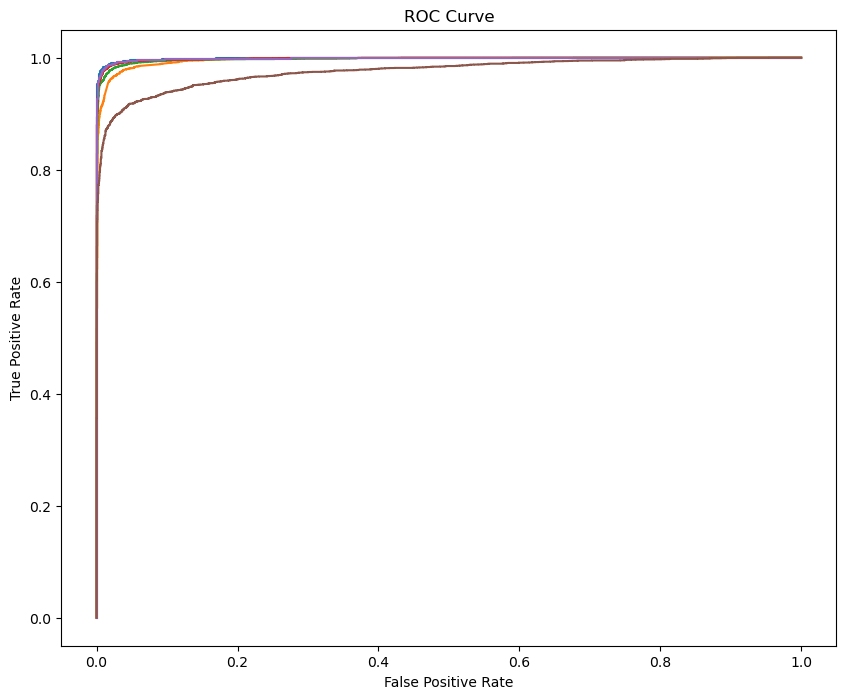

In [3]:
# Compute ROC curve and AUC for each model
model_names = ["SGD", "Adam", "ANN", "BI-GRU", "BI-LSTM", "GRU"]
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=len(encoder.classes_))
y_pred_proba_models = [y_pred_proba_model1, y_pred_proba_model2, y_pred_proba_model3, y_pred_proba_model4, y_pred_proba_model5, y_pred_proba_model6]

plt.figure(figsize=(10, 8))

for i, model_name in enumerate(model_names):
    y_pred_proba = y_pred_proba_models[i]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for j in range(len(encoder.classes_)):
        fpr[j], tpr[j], _ = roc_curve(y_test_one_hot[:, j], y_pred_proba[:, j])
        roc_auc[j] = auc(fpr[j], tpr[j])
    # Plot the ROC curve for the first class as an example
    plt.plot(fpr[1], tpr[1], label=f'{model_name} (AUC = {roc_auc[1]:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
ax.legend(loc='center left', bbox_to_anchor=(1.04, 0.5), borderaxespad=0)
plt.show()


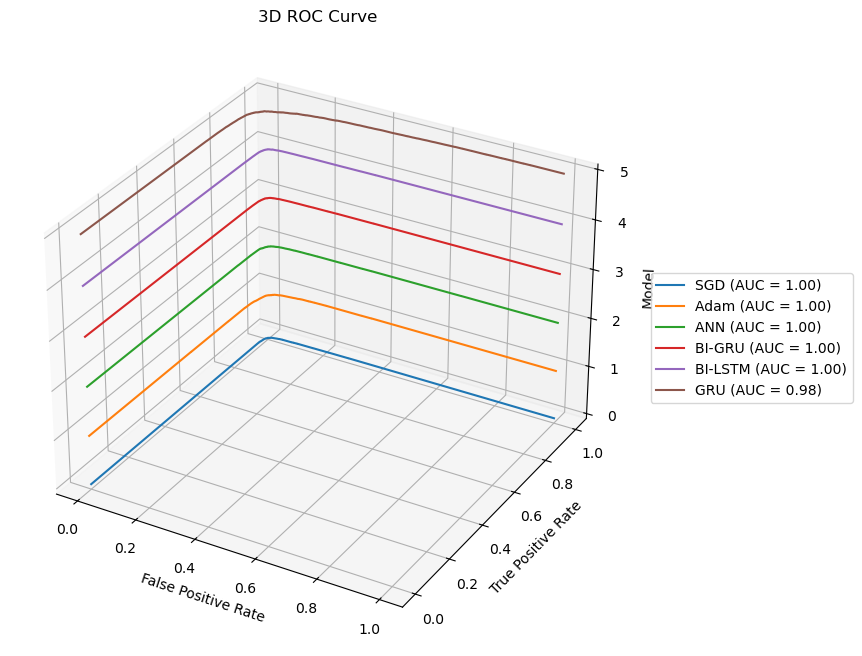

In [4]:
from mpl_toolkits.mplot3d import Axes3D

# Compute ROC curve and AUC for each model
model_names = ["SGD", "Adam", "ANN", "BI-GRU", "BI-LSTM", "GRU"]
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=len(encoder.classes_))
y_pred_proba_models = [y_pred_proba_model1, y_pred_proba_model2, y_pred_proba_model3, y_pred_proba_model4, y_pred_proba_model5, y_pred_proba_model6]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, model_name in enumerate(model_names):
    y_pred_proba = y_pred_proba_models[i]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for j in range(len(encoder.classes_)):
        fpr[j], tpr[j], _ = roc_curve(y_test_one_hot[:, j], y_pred_proba[:, j])
        roc_auc[j] = auc(fpr[j], tpr[j])
    
    # Plot the ROC curve for the first class as an example
    ax.plot(fpr[1], tpr[1], zs=i, label=f'{model_name} (AUC = {roc_auc[1]:.2f})')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_zlabel('Model')
ax.set_title('3D ROC Curve')
ax.legend(loc='center left', bbox_to_anchor=(1.04, 0.5), borderaxespad=0)
plt.show()


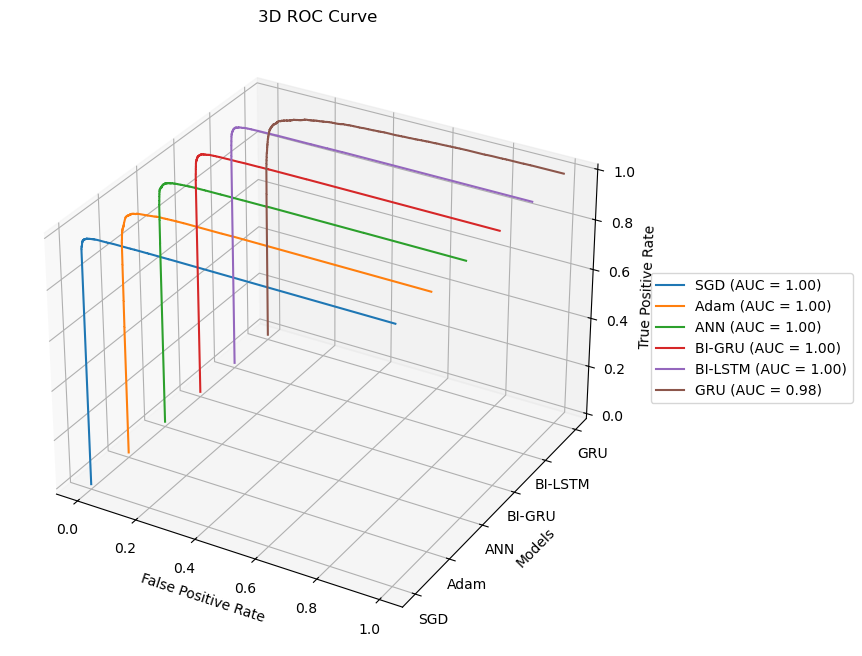

In [5]:
from mpl_toolkits.mplot3d import Axes3D

# Compute ROC curve and AUC for each model
model_names = ["SGD", "Adam", "ANN", "BI-GRU", "BI-LSTM", "GRU"]
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=len(encoder.classes_))
y_pred_proba_models = [y_pred_proba_model1, y_pred_proba_model2, y_pred_proba_model3, y_pred_proba_model4, y_pred_proba_model5, y_pred_proba_model6]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Differentiate each model by z-level
z_levels = list(range(len(model_names)))

for z, model_name in zip(z_levels, model_names):
    y_pred_proba = y_pred_proba_models[z]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for j in range(len(encoder.classes_)):
        fpr[j], tpr[j], _ = roc_curve(y_test_one_hot[:, j], y_pred_proba[:, j])
        roc_auc[j] = auc(fpr[j], tpr[j])
    
    # Plot the ROC curve for the first class as an example
    ax.plot(fpr[1], tpr[1], zs=z, zdir='y', label=f'{model_name} (AUC = {roc_auc[1]:.2f})')

ax.set_xlabel('False Positive Rate')
ax.set_zlabel('True Positive Rate')
ax.set_ylabel('Models')
ax.set_yticks(z_levels)
ax.set_yticklabels(model_names)
ax.set_title('3D ROC Curve')
ax.legend(loc='center left', bbox_to_anchor=(1.04, 0.5), borderaxespad=0)
plt.show()


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Train models and store the history
histories = []
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)

models = [build_model_1(), build_model_2(), build_model_3(), build_model_4(), build_model_5(), build_model_6()]
model_names = ["SGD", "Adam", "ANN", "BI-GRU", "BI-LSTM", "GRU"]

for model, name in zip(models, model_names):
    print(f"Training {name} model...")
    start_time = time.time()
    history = model.fit([data_padded_train, html_padded_train], y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping, lr_scheduler])
    end_time = time.time()
    print(f"{name} model training took {(end_time - start_time) / 60:.2f} minutes")
    histories.append(history)

# Plot 3D learning curve
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for idx, (history, name) in enumerate(zip(histories, model_names)):
    epochs = range(1, len(history.history['loss']) + 1)
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    ax.plot(epochs, [idx]*len(epochs), train_loss, label=f'{name} Train')
    ax.plot(epochs, [idx]*len(epochs), val_loss, label=f'{name} Validation', linestyle='dashed')

ax.set_xlabel('Epochs')
ax.set_zlabel('Loss')
ax.set_ylabel('Models')
ax.set_yticks(list(range(len(model_names))))
ax.set_yticklabels(model_names)
ax.set_title('3D Learning Curve')
ax.legend(loc='center left', bbox_to_anchor=(1.04, 0.5), borderaxespad=0)
plt.show()


2024-05-26 22:30:01.505919: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-26 22:30:01.506787: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-26 22:30:01.509271: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-26 22:30:04.959714: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-26 22:30:04.960373: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-26 22:30:04.960867: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-26 22:30:10.651643: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-26 22:30:10.654034: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-26 22:30:10.654690: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-26 22:30:12.710772: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-26 22:30:12.711986: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-26 22:30:12.712425: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Training SGD model...
Epoch 1/50
907/908 [============================>.] - ETA: 0s - loss: 0.2230 - accuracy: 0.9072

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Assume build_model_1(), build_model_2(), ... build_model_6() are defined elsewhere
# Assume data_padded_train, html_padded_train, y_train are prepared

# Train models and store the history
histories = []
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch / 20))

models = [build_model_1(), build_model_2(), build_model_3(), build_model_4(), build_model_5(), build_model_6()]
model_names = ["SGD", "Adam", "ANN", "BI-GRU", "BI-LSTM", "GRU"]

for model, name in zip(models, model_names):
    print(f"Training {name} model...")
    start_time = time.time()
    history = model.fit([data_padded_train, html_padded_train], y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping, lr_scheduler])
    end_time = time.time()
    print(f"{name} model training took {(end_time - start_time) / 60:.2f} minutes")
    histories.append(history)

# Plot 3D learning curve
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for idx, (history, name) in enumerate(zip(histories, model_names)):
    epochs = range(1, len(history.history['loss']) + 1)
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Training loss curve
    ax.plot(epochs, [idx]*len(epochs), train_loss, label=f'{name} Train')
    # Validation loss curve
    ax.plot(epochs, [idx]*len(epochs), val_loss, linestyle='dashed', label=f'{name} Validation')

ax.set_xlabel('Epochs')
ax.set_zlabel('Loss')
ax.set_ylabel('Models')
ax.set_yticks(list(range(len(model_names))))
ax.set_yticklabels(model_names)
ax.set_title('3D Learning Curve')
ax.legend(loc='center left', bbox_to_anchor=(1.04, 0.5), borderaxespad=0)
plt.show()


NameError: name 'build_model_1' is not defined